### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

### Different visualisation functions definition

##### Boxplot

In [2]:
def plot_boxplot_bfi(df,modelname):
    df_long = pd.melt(
        df,
        id_vars=['Name', 'category'],  # Columns to keep
        value_vars=['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'],  # Columns to melt
        var_name='Trait',  # Name for the categorical variable
        value_name='Value'  # Name for the values
    )


    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_long, x='Trait', y='Value', palette="Set2",hue="category")


    plt.title(f'Boxplot of {modelname} BFI Traits', fontsize=16)
    plt.xlabel('Personality Traits', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.savefig(f'./plot_output/{modelname}_bfi_bp.png')
    plt.show()

In [3]:
def plot_boxplot_sd3(df,modelname):
    df_long = pd.melt(
        df,
        id_vars=['Name', 'category'],  # Columns to keep
        value_vars=['Machiavellianism',	'Narcissism', 'Psychopathy'],  # Columns to melt
        var_name='Trait',  # Name for the categorical variable
        value_name='Value'  # Name for the values
    )


    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_long, x='Trait', y='Value', palette="Set2",hue="category")


    plt.title(f'Boxplot of {modelname} SD3 Traits', fontsize=16)
    plt.xlabel('Personality Traits', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.savefig(f'./plot_output/{modelname}_sd3_bp.png')
    plt.show()

##### Violin plot

In [4]:
def plot_violin_sd3(df,modelname):
    df_long = pd.melt(
        df,
        id_vars=['Name', 'category'],
        value_vars=['Machiavellianism', 'Narcissism', 'Psychopathy'],  # Columns to melt
        var_name='Trait',  # Name for the categorical variable
        value_name='Value'  # Name for the values
    )


    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df_long, x='Trait', y='Value', palette="Set2",hue="category")


    plt.title(f'Violinplot of {modelname} SD3 Traits', fontsize=16)
    plt.xlabel('Personality Traits', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.savefig(f'./plot_output/{modelname}_sd3_vp.png')
    plt.show()

In [5]:
def plot_violin_bfi(df,modelname):
    df_long = pd.melt(
        df,
        id_vars=['Name', 'category'],  # Columns to keep
        value_vars=['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'],  # Columns to melt
        var_name='Trait',  # Name for the categorical variable
        value_name='Value'  # Name for the values
    )


    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df_long, x='Trait', y='Value', palette="Set2",hue="category")


    plt.title(f'Violinplot of {modelname}: BFI Traits', fontsize=16)
    plt.xlabel('Personality Traits', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.savefig(f'./plot_output/{modelname}_bfi_vp.png')
    plt.show()

##### Barcharts

In [6]:
def stacked_bar_chart(df,model_name,category):
    # Group by source and calculate the mean (or sum) for each trait
    df_grouped = df.groupby('source')[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']].mean()

    # Prepare the data for plotting
    x = df_grouped.index  # Sources
    traits = df_grouped.columns  # Personality traits
    values = df_grouped.values  # Values for each trait

    # Create a stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 6))

    # Stacking each trait
    bottom = np.zeros(len(x))  # Initialize the bottom for stacking
    for i, trait in enumerate(traits):
        ax.bar(x, df_grouped[trait], label=trait, bottom=bottom)
        bottom += df_grouped[trait]  # Update the bottom for stacking

    # Add labels and legend
    ax.set_title(f'{model_name}: Personality Traits by Source for {category} category.', fontsize=16)
    ax.set_xlabel('Source', fontsize=12)
    ax.set_ylabel('Average Trait Value', fontsize=12)
    ax.legend(title='Traits', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [7]:
def side_by_side_bar_chart(df, model_name, category):
    # Group by source and calculate the mean for each trait
    df_grouped = df.groupby('source')[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']].mean()

    # Prepare the data for plotting
    x = np.arange(len(df_grouped.index))  # Numeric positions for the sources
    traits = df_grouped.columns  # Personality traits
    width = 0.15  # Width of each bar
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot each trait as a separate bar
    for i, trait in enumerate(traits):
        ax.bar(
            x + i * width,  # Adjust position for each trait
            df_grouped[trait],
            width=width,
            label=trait
        )

    # Add labels, title, and legend
    ax.set_title(f'{model_name}: Personality Traits by Source for {category} Category', fontsize=16)
    ax.set_xlabel('Source', fontsize=12)
    ax.set_ylabel('Average Trait Value', fontsize=12)
    ax.set_xticks(x + width * (len(traits) - 1) / 2)  # Adjust x-axis tick positions
    ax.set_xticklabels(df_grouped.index, rotation=45)
    ax.legend(title='Traits', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
# side_by_side_bar_chart(your_dataframe, "Claude 3.5", "good")


In [8]:
def plot_traits_by_source(dfr,sublist,modelname):# Calculate mean values for each trait by category
    traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
    mean_by_category = dfr.groupby('source')[traits].mean()
    #print(mean_by_category)
    # Plot grouped bar chart
    categories = mean_by_category.index
    x = np.arange(len(traits))  # Label locations
    width = 0.1  # Width of bars

    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot bars for each category
    for i, category in enumerate(categories):
        ax.bar(x + i * width, mean_by_category.loc[category], width, label=f'Category {category}')

    # Add labels, title, and legend
    ax.set_xlabel('Traits', fontsize=12)
    ax.set_ylabel('Mean Score', fontsize=12)
    ax.set_title(f'Mean Values of BFI by Category for {sublist} list - {modelname}', fontsize=14)
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(traits, fontsize=12, rotation=45)
    #ax.legend(title='Category')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f'./plot_output/{modelname}_bfi_{sublist}.png',bbox_inches="tight")
    plt.show()

In [9]:

def plot_traits_by_source_sd3(dfr,sublist,modelname):# Calculate mean values for each trait by category
    traits =['Machiavellianism', 'Narcissism', 'Psychopathy']
    mean_by_category = dfr.groupby('source')[traits].mean()
    #print(mean_by_category)
    # Plot grouped bar chart
    categories = mean_by_category.index
    x = np.arange(len(traits))  # Label locations
    width = 0.1  # Width of bars

    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot bars for each category
    for i, category in enumerate(categories):
        ax.bar(x + i * width, mean_by_category.loc[category], width, label=f'Category {category}')

    # Add labels, title, and legend
    ax.set_xlabel('Traits', fontsize=12)
    ax.set_ylabel('Mean Score', fontsize=12)
    ax.set_title(f'Mean Values of SD3 by Category for {sublist} list - {modelname}', fontsize=14)
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(traits, fontsize=12, rotation=45)
    #ax.legend(title='Category')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f'./plot_output/{modelname}_sd3_{sublist}.png',bbox_inches="tight")
    plt.show()

In [10]:
def trait_grouped_bar_chart(df, model_name, category):
    # Filter the data for the selected category
    df_filtered = df[df['category'] == category]

    # Group by source and pivot the table to make traits the x-axis
    df_grouped = df_filtered.groupby('source')[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']].mean()
    df_pivot = df_grouped.T  # Transpose the DataFrame so traits become the index

    # Prepare the data for plotting
    x = np.arange(len(df_pivot.index))  # Positions for traits
    width = 0.2  # Bar width
    sources = df_pivot.columns  # The sources

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot bars for each source
    for i, source in enumerate(sources):
        ax.bar(
            x + i * width,  # Offset for each source
            df_pivot[source],  # Values for the source
            width=width,
            label=source
        )

    # Add labels, title, and legend
    ax.set_title(f'{model_name}: Personality Traits by Source for {category} Category', fontsize=16)
    ax.set_xlabel('Traits', fontsize=12)
    ax.set_ylabel('Average Value', fontsize=12)
    ax.set_xticks(x + width * (len(sources) - 1) / 2)  # Center x-ticks for traits
    ax.set_xticklabels(df_pivot.index, rotation=45)  # Use traits as x-tick labels
    ax.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# trait_grouped_bar_chart(your_dataframe, "Claude 3.5", "good")


##### KDE plot

In [11]:
def plot_kde_bfi(df, modelname):
    traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
    
    categories = df['category'].unique()  # Get unique categories
    plt.figure(figsize=(15, 10))  # Increase figure size for better visualization

    for i, trait in enumerate(traits, 1):  # Enumerate through traits for subplotting
        plt.subplot(3, 2, i)  # Create a subplot (3 rows, 2 columns, position i)
        
        for category in categories:
            # Plot KDE for each category
            sns.kdeplot(
                data=df[df['category'] == category],
                x=trait,
                label=category,
                fill=True,  # Optional, to fill the density
                alpha=0.5   # Adjust transparency
            )
        
        plt.title(f'Distribution of {trait}', fontsize=14)
        plt.xlabel(trait, fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend(title='Category', fontsize=10)

    plt.suptitle(f'KDE Plot of {modelname} Traits by Category', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.savefig(f'./plot_output/{modelname}_bfi_kde.png')
    plt.show()




In [12]:
def plot_kde_sd3(df, modelname):
    traits =['Machiavellianism', 'Narcissism', 'Psychopathy']
    
    categories = df['category'].unique()  # Get unique categories
    plt.figure(figsize=(15, 10))  # Increase figure size for better visualization

    for i, trait in enumerate(traits, 1):  # Enumerate through traits for subplotting
        plt.subplot(3, 2, i)  # Create a subplot (3 rows, 2 columns, position i)
        
        for category in categories:
            # Plot KDE for each category
            sns.kdeplot(
                data=df[df['category'] == category],
                x=trait,
                label=category,
                fill=True,  # Optional, to fill the density
                alpha=0.5   # Adjust transparency
            )
        
        plt.title(f'Distribution of {trait}', fontsize=14)
        plt.xlabel(trait, fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend(title='Category', fontsize=10)

    plt.suptitle(f'KDE Plot of {modelname} Traits by Category', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.savefig(f'./plot_output/{modelname}_sd3_kde.png')
    plt.show()



##### Radar plot

In [13]:

def radar_chart(df,modelname,test):
  # Convert to numeric in case of issues
  if(test==1):
    traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
  else:
    traits =['Machiavellianism', 'Narcissism', 'Psychopathy']
  
  df[traits] = df[traits].apply(pd.to_numeric, errors='coerce')

  # Calculate mean values by source
  grouped_means = df.groupby('category')[traits].mean()

  # Radar chart with Plotly
  fig = go.Figure()

  # Add traces for each source
  for source in grouped_means.index:
      fig.add_trace(go.Scatterpolar(
          r=grouped_means.loc[source].tolist(),  # Trait values
          theta=traits,  # Trait names
          fill='toself',
          name=source  # Source name
      ))

  # Update layout
  fig.update_layout(
      polar=dict(
          radialaxis=dict(
              visible=True,
              range=[0, grouped_means.values.max()]  # Dynamic range
          )
      ),
      title="Radar Chart Grouped by Category",
      showlegend=True
  )
  #fig.write_image(f'plot_output/{modelname}_{test}_radar.png')
  fig.show()

##### Parallel Coordinates Plot

In [14]:
def pcp(cdf,modelname,test):
    
    # Identify the unique DataFrames and Columns
    dataframes = cdf['DataFrame'].unique()
    columns = cdf['Attribute'].unique()

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot each DataFrame
    for df_name in dataframes:
        df_data = cdf[cdf['DataFrame'] == df_name]
        ax.plot(df_data['Attribute'], df_data['Mean'], marker='o', label=df_name)

    # Customize the plot
    ax.set_xticks(range(len(columns)))
    ax.set_xticklabels(columns)
    ax.set_ylabel('Mean Value')
    ax.set_title(f'Parallel Coordinates Plot for {modelname} : {test}')
    ax.legend(title='DataFrame', loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.set_facecolor('lightgrey') 
    # error bars for standard deviation
    for df_name in dataframes:
        df_data = cdf[cdf['DataFrame'] == df_name]
        ax.errorbar(df_data['Attribute'], df_data['Mean'], yerr=df_data['Std'], 
                    fmt='none', capsize=5, alpha=0.5)

    plt.tight_layout()
    plt.savefig(f'./plot_output/{modelname}_{test}_pcp.png')
    plt.show()

### Visualisations for Claude 3.5

In [29]:
df1=pd.read_csv('./test_scores/BFI/result_cs35_bfi_g.csv')
df2=pd.read_csv('./test_scores/BFI/result_cs35_bfi_b.csv')
df3=pd.read_csv('./test_scores/BFI/result_cs35_bfi_n.csv')


In [2]:
df4=pd.read_csv('./test_scores/SD3/result_cs35_sd3_g.csv')
df5=pd.read_csv('./test_scores/SD3/result_cs35_sd3_b.csv')
df6=pd.read_csv('./test_scores/SD3/result_cs35_sd3_n.csv')

In [30]:
df1['category']="good"
df2['category']="bad"
df3['category']="neutral"

In [8]:
df4['category']="good"
df5['category']="bad"
df6['category']="neutral"

In [31]:
df_list_bfi=[df1,df2,df3]
df_bfi=pd.concat(df_list_bfi, ignore_index=True)

In [9]:
df_list_sd3=[df4,df5,df6]
df_sd3=pd.concat(df_list_sd3, ignore_index=True)

In [59]:
radar_chart(df_bfi,1)

In [60]:
radar_chart(df_sd3,2)

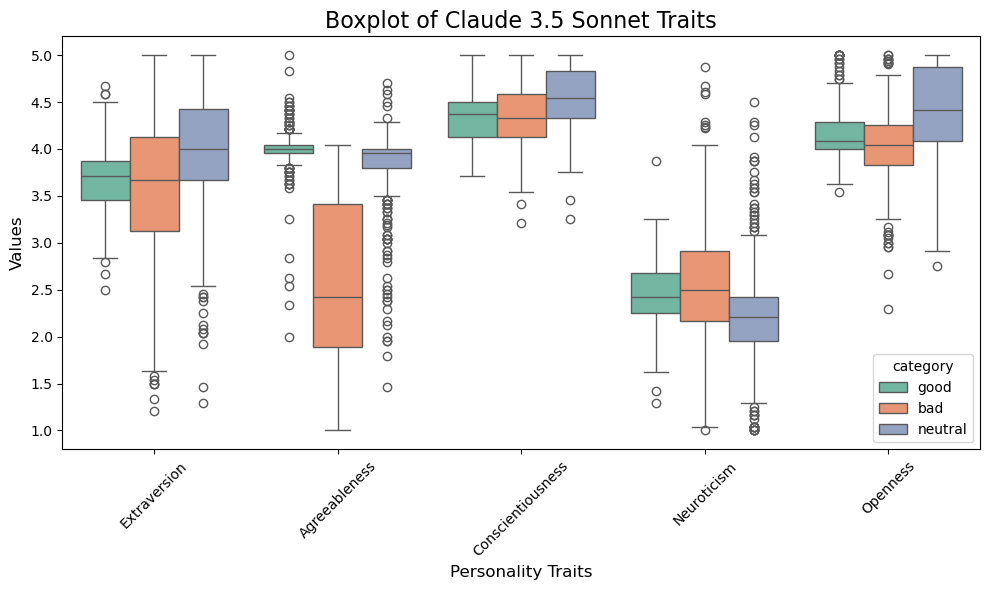

In [55]:
plot_boxplot_bfi(df_bfi,"Claude 3.5 Sonnet")

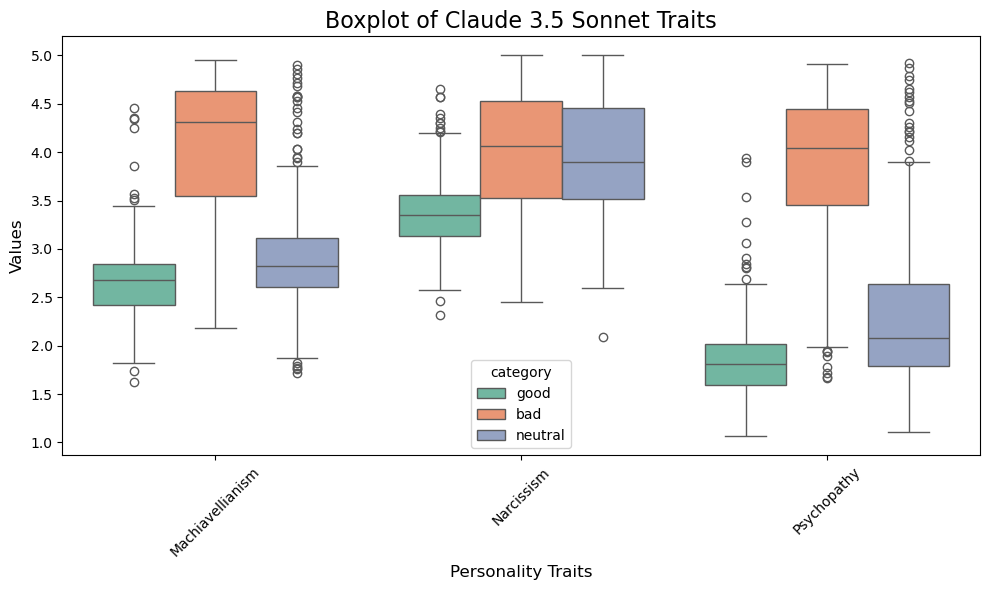

In [61]:
plot_boxplot_sd3(df_sd3,"Claude 3.5 Sonnet")

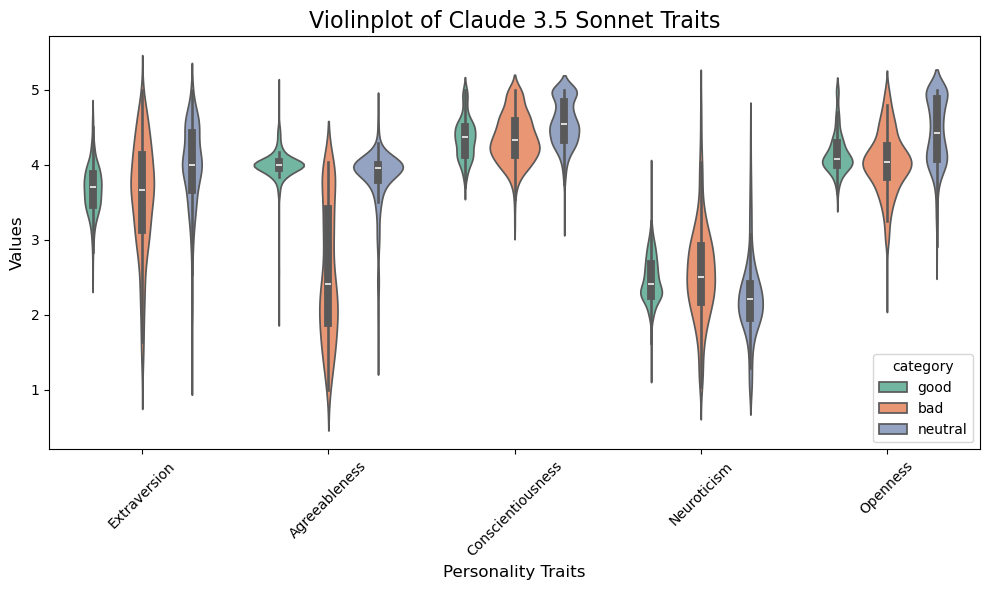

In [62]:
plot_violin_bfi(df_bfi,"Claude 3.5 Sonnet")

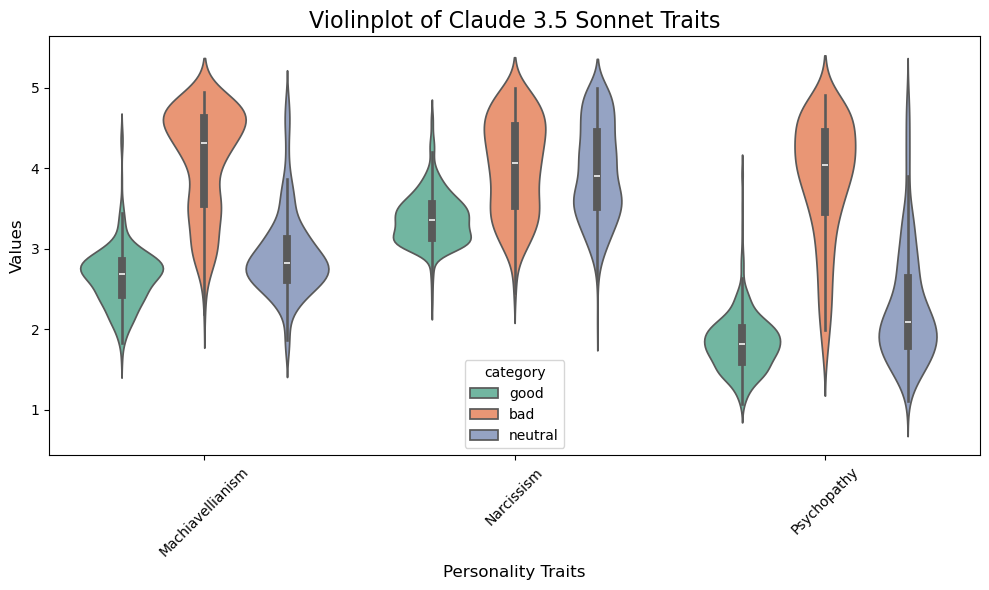

In [63]:
plot_violin_sd3(df_sd3,"Claude 3.5 Sonnet")

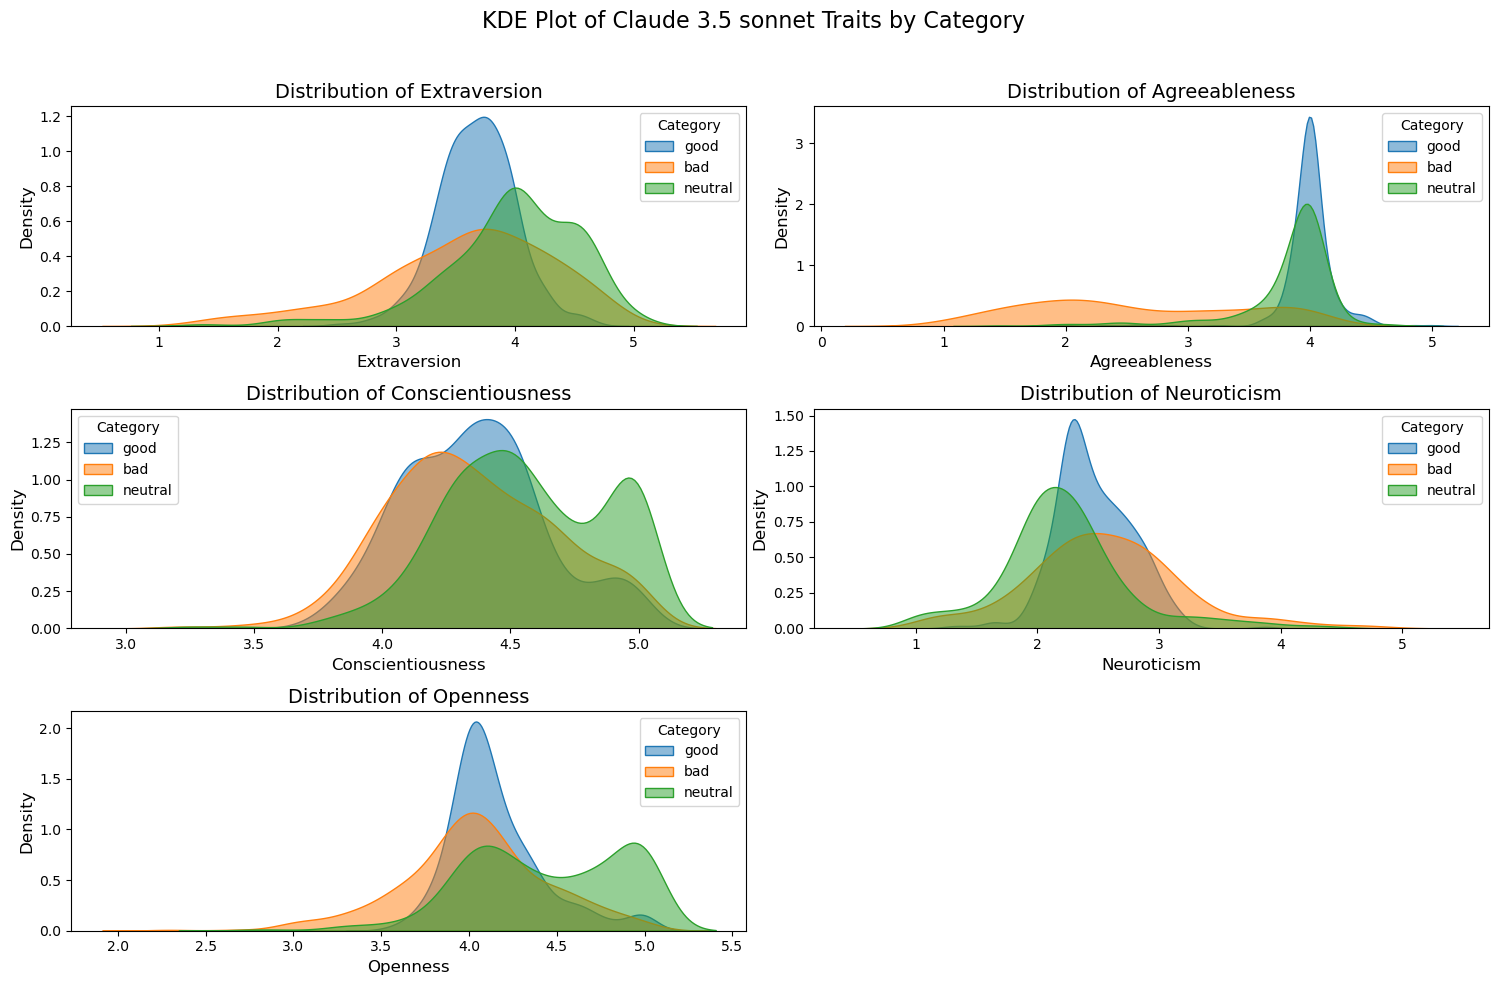

In [64]:
plot_kde_bfi(df_bfi,"Claude 3.5 sonnet")

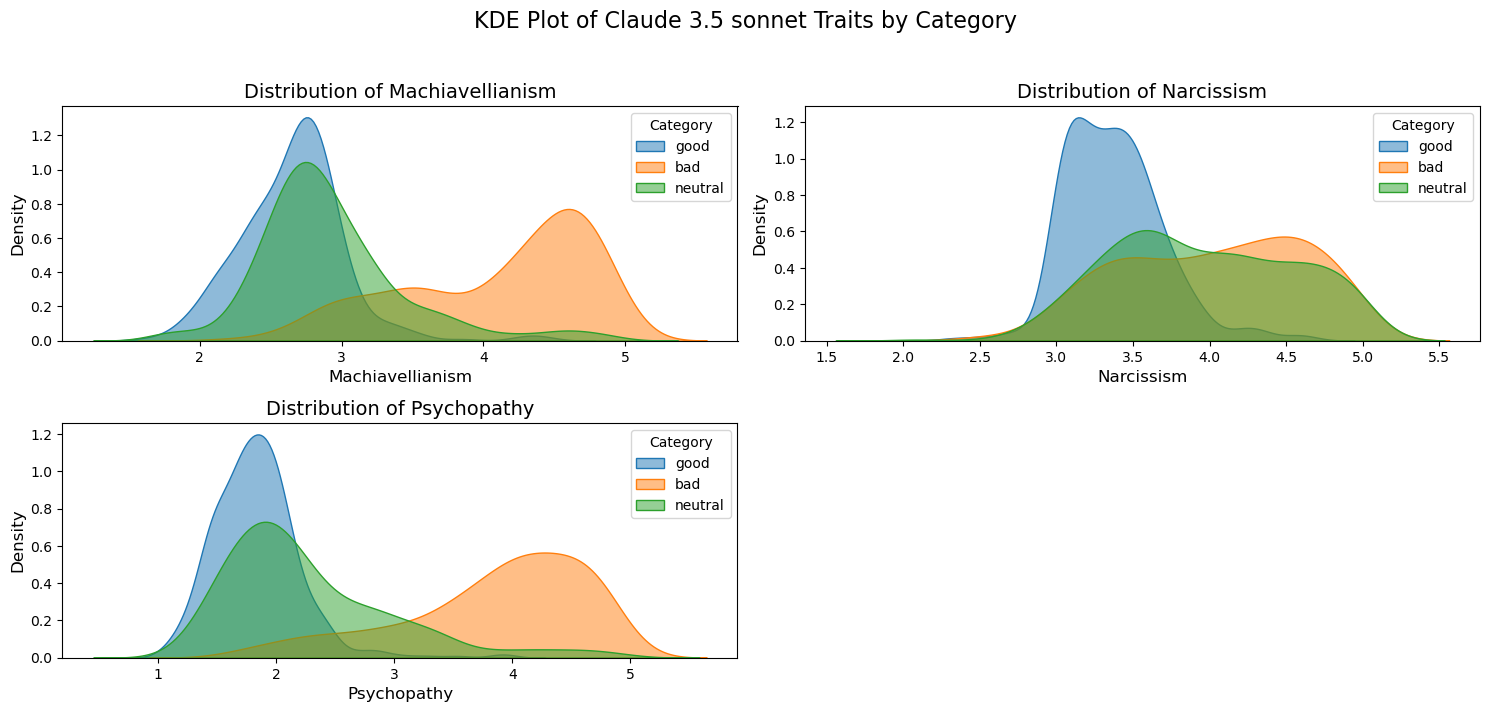

In [67]:
plot_kde_sd3(df_sd3,"Claude 3.5 sonnet")

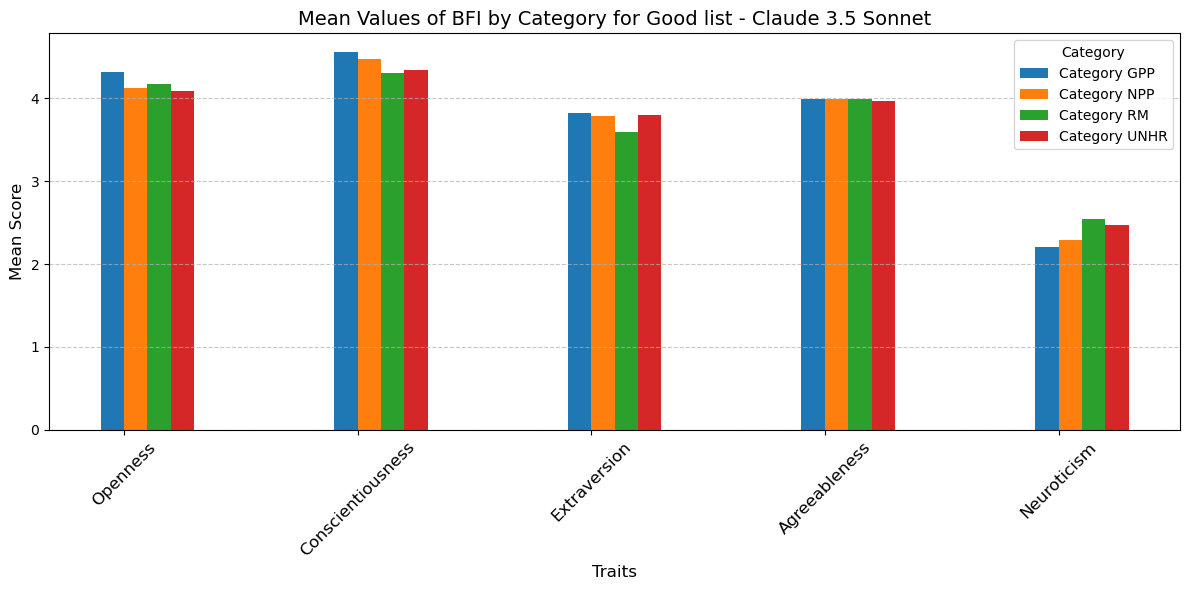

In [70]:
plot_traits_by_source(df1,"Good","Claude 3.5 Sonnet")

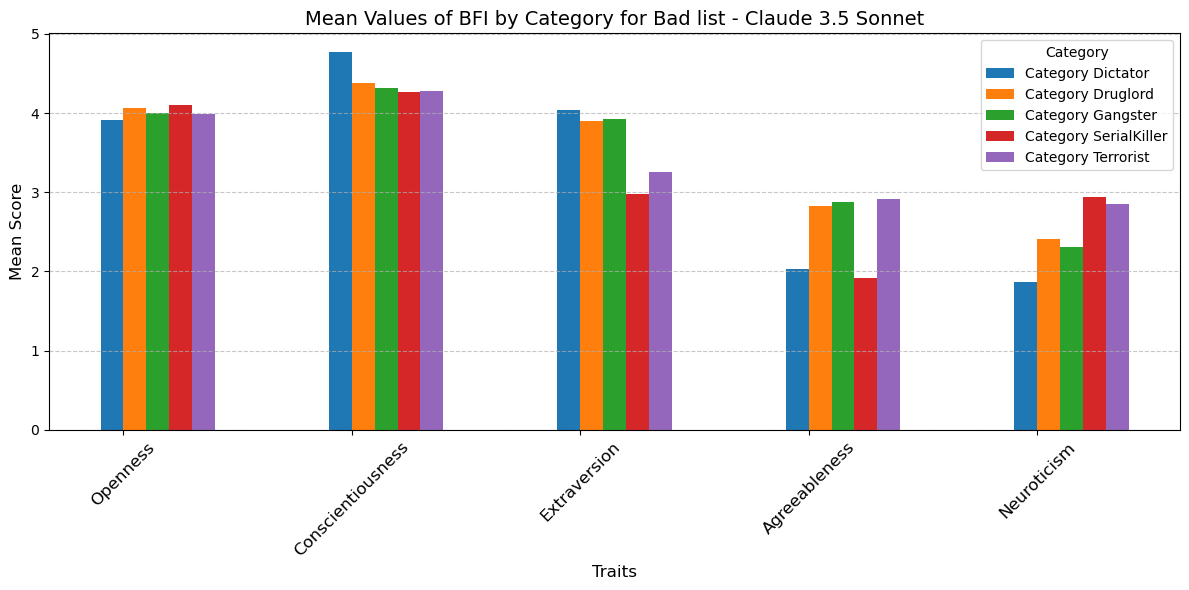

In [71]:
plot_traits_by_source(df2,"Bad","Claude 3.5 Sonnet")

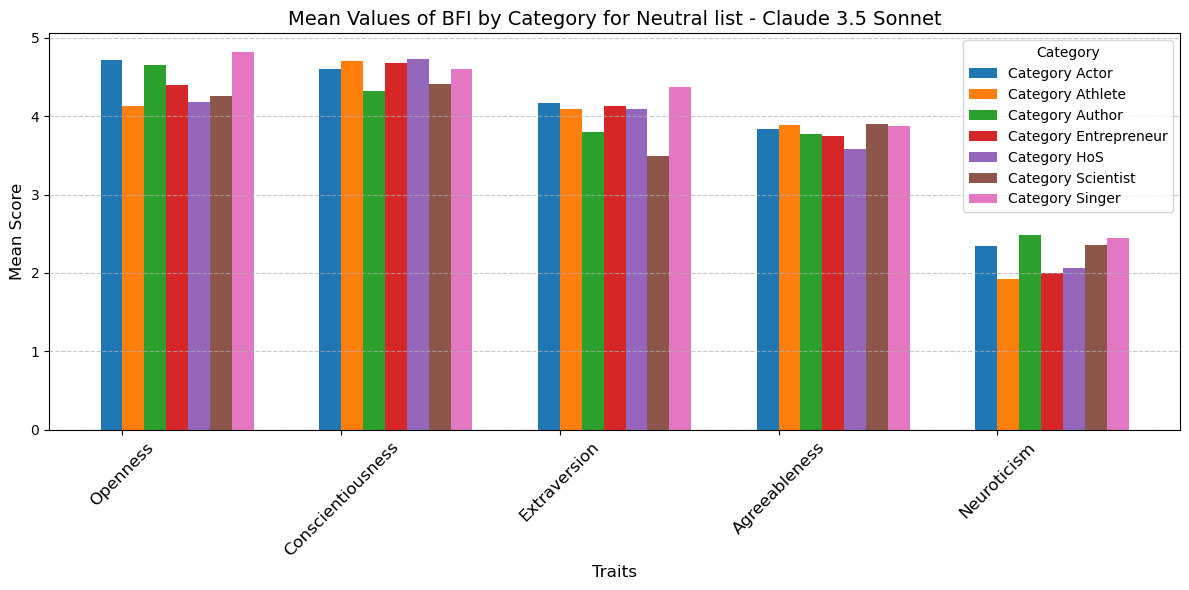

In [72]:
plot_traits_by_source(df3,"Neutral","Claude 3.5 Sonnet")

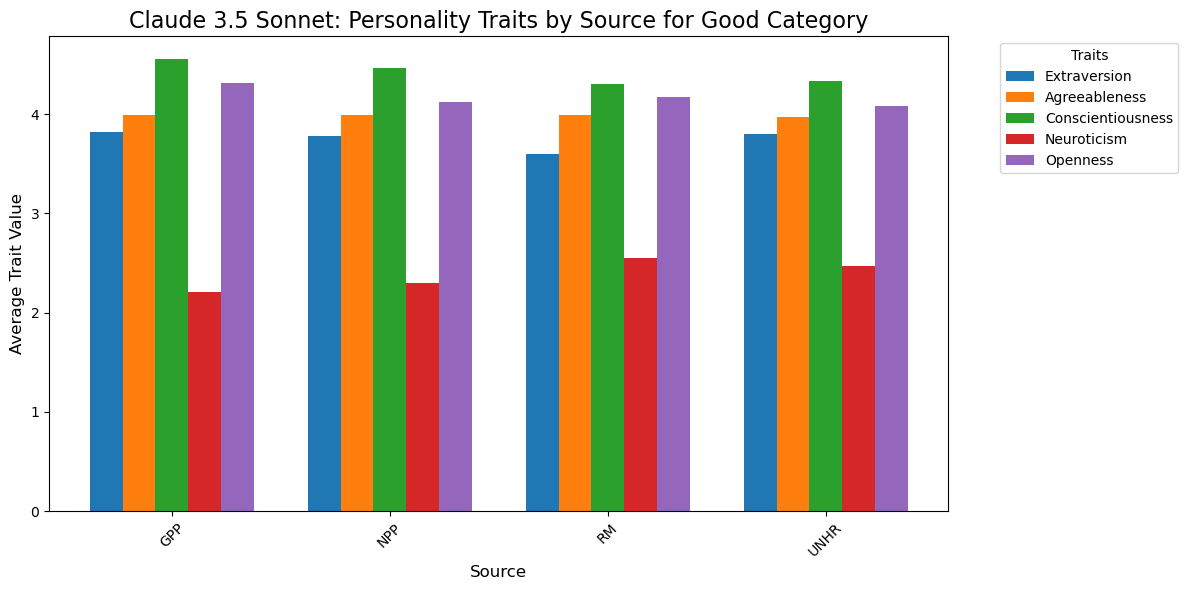

In [8]:
side_by_side_bar_chart(df1,"Claude 3.5 Sonnet", "Good")

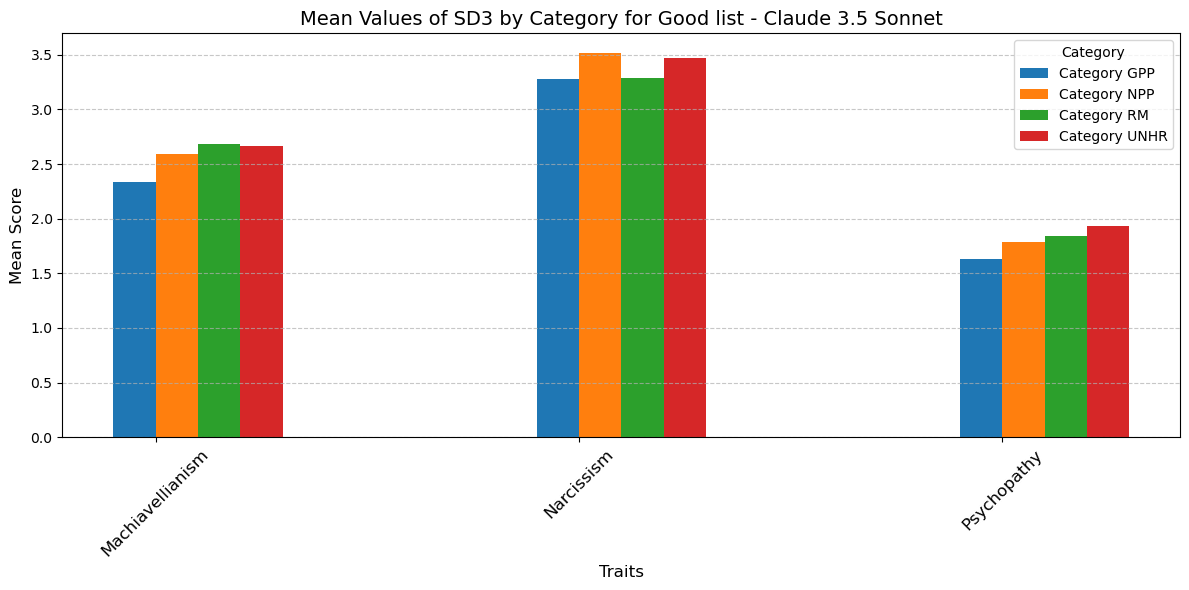

In [74]:
plot_traits_by_source_sd3(df4,"Good","Claude 3.5 Sonnet")

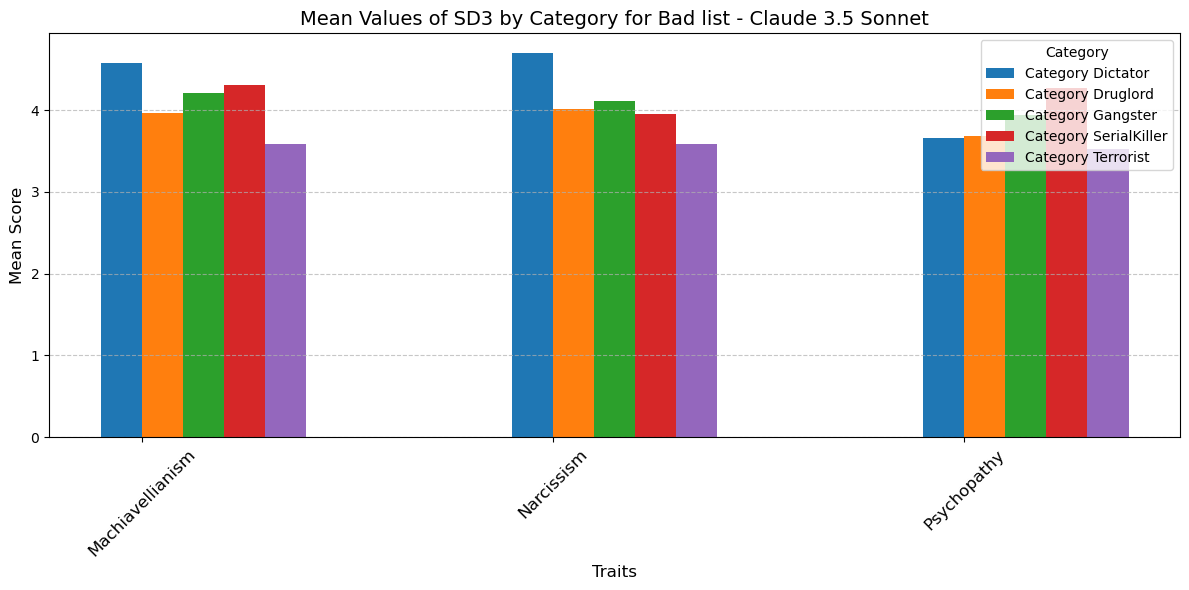

In [75]:
plot_traits_by_source_sd3(df5,"Bad","Claude 3.5 Sonnet")

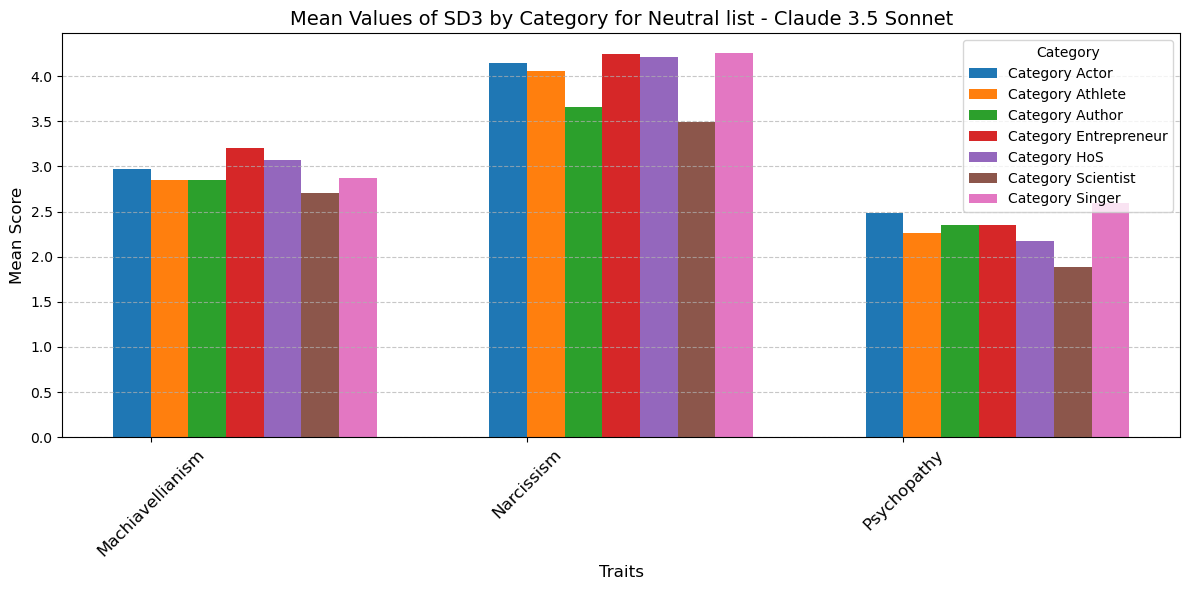

In [76]:
plot_traits_by_source_sd3(df6,"Neutral","Claude 3.5 Sonnet")

In [77]:
df_list=[df1,df2,df3]

In [78]:
columns_list = ['Extraversion',	'Agreeableness', 'Conscientiousness', 'Neuroticism',	'Openness']
custom_names = ['Bad','Good','Neutral']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)

print(cdf)


   DataFrame          Attribute      Mean       Std
0        Bad       Extraversion  3.674977  0.323274
1        Bad      Agreeableness  3.989482  0.233873
2        Bad  Conscientiousness  4.357915  0.277128
3        Bad        Neuroticism  2.465940  0.312136
4        Bad           Openness  4.150750  0.269201
5       Good       Extraversion  3.570799  0.754007
6       Good      Agreeableness  2.578196  0.883121
7       Good  Conscientiousness  4.349887  0.326925
8       Good        Neuroticism  2.554635  0.638957
9       Good           Openness  4.029166  0.416137
10   Neutral       Extraversion  3.970132  0.591270
11   Neutral      Agreeableness  3.816833  0.421009
12   Neutral  Conscientiousness  4.559787  0.316069
13   Neutral        Neuroticism  2.221468  0.544537
14   Neutral           Openness  4.436045  0.447002


In [81]:
#Calculate cdf_sd3
columns_list_sd3 = ['Machiavellianism', 'Narcissism', 'Psychopathy']

results = []
for col in columns_list_sd3:
    grouped = df_sd3.groupby('category')[col].agg(['mean', 'std']).reset_index()
    grouped['Attribute'] = col
    results.append(grouped)

cdf_sd3 = pd.concat(results)
cdf_sd3.rename(columns={'category': 'DataFrame', 'mean': 'Mean', 'std': 'Std'}, inplace=True)


In [82]:
cdf_sd3

DataFrame      Mean       Std         Attribute
0       bad  4.099648  0.657217  Machiavellianism
1      good  2.651793  0.369586  Machiavellianism
2   neutral  2.922905  0.524539  Machiavellianism
0       bad  4.022416  0.595079        Narcissism
1      good  3.372733  0.320625        Narcissism
2   neutral  3.956810  0.590676        Narcissism
0       bad  3.849410  0.778785       Psychopathy
1      good  1.833562  0.369675       Psychopathy
2   neutral  2.279218  0.728953       Psychopathy

In [10]:
print(df_sd3.groupby(['category'])['Machiavellianism'].mean())
print(df_sd3.groupby(['category'])['Narcissism'].mean())
print(df_sd3.groupby(['category'])['Psychopathy'].mean())

category
bad        4.099648
good       2.651793
neutral    2.922905
Name: Machiavellianism, dtype: float64
category
bad        4.022416
good       3.372733
neutral    3.956810
Name: Narcissism, dtype: float64
category
bad        3.849410
good       1.833562
neutral    2.279218
Name: Psychopathy, dtype: float64


In [34]:
print(df_bfi.groupby(['category'])['Extraversion'].mean())
print(df_bfi.groupby(['category'])['Agreeableness'].mean())
print(df_bfi.groupby(['category'])['Conscientiousness'].mean())

category
bad        3.570799
good       3.674977
neutral    3.970132
Name: Extraversion, dtype: float64
category
bad        2.578196
good       3.989482
neutral    3.816832
Name: Agreeableness, dtype: float64
category
bad        4.349887
good       4.357915
neutral    4.559787
Name: Conscientiousness, dtype: float64


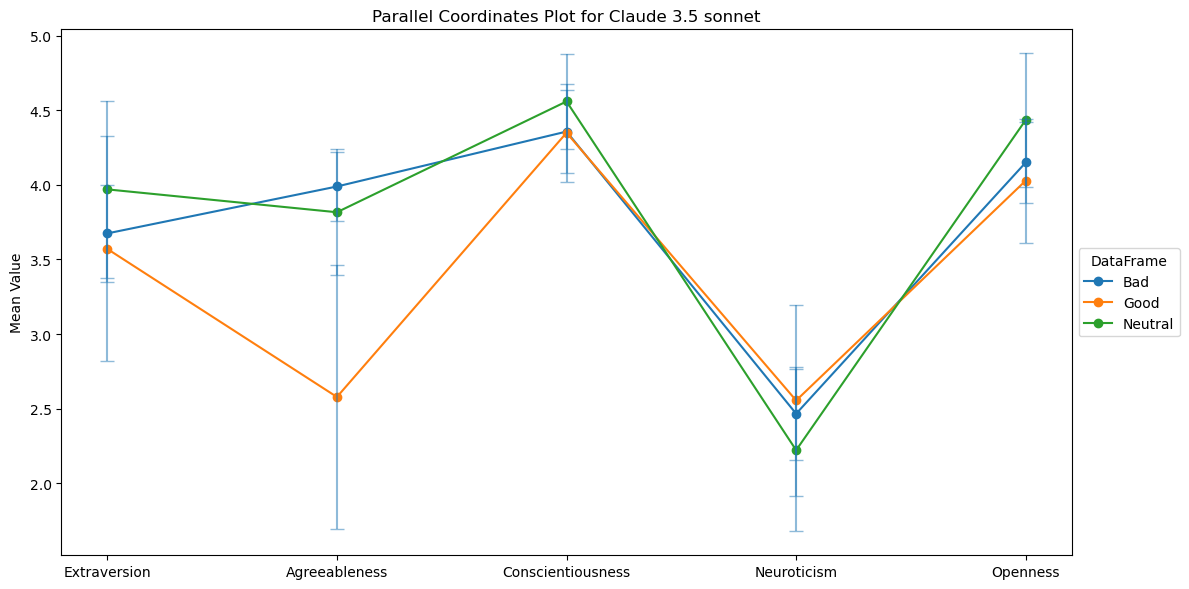

In [80]:
pcp(cdf)

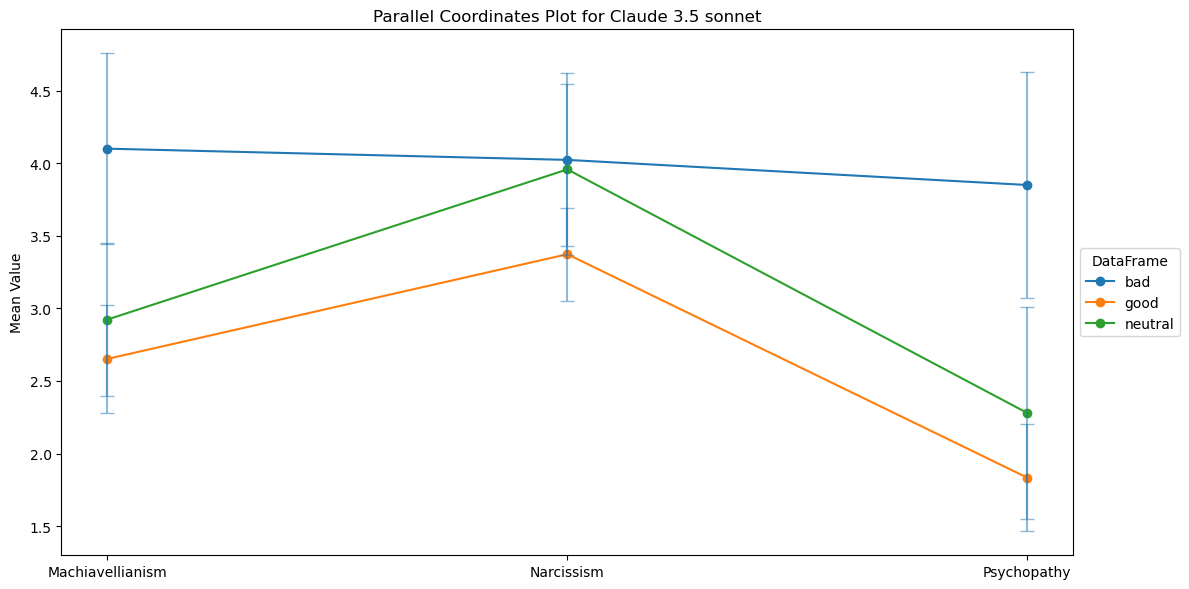

In [83]:
pcp(cdf_sd3)

### Visuals for GPT 4o

In [3]:
df1=pd.read_csv('./test_scores/BFI/result_gpt4_bfi_g.csv')
df2=pd.read_csv('./test_scores/BFI/result_gpt4_bfi_b.csv')
df3=pd.read_csv('./test_scores/BFI/result_gpt4_bfi_n.csv')


In [4]:
df4=pd.read_csv('./test_scores/SD3/result_gpt4_sd3_g.csv')
df5=pd.read_csv('./test_scores/SD3/result_gpt4_sd3_b.csv')
df6=pd.read_csv('./test_scores/SD3/result_gpt4_sd3_n.csv')

In [5]:
df1['category']="good"
df2['category']="bad"
df3['category']="neutral"

In [6]:
df4['category']="good"
df5['category']="bad"
df6['category']="neutral"

In [7]:
df_list_bfi=[df1,df2,df3]
df_bfi=pd.concat(df_list_bfi, ignore_index=True)

In [8]:
df_list_sd3=[df4,df5,df6]
df_sd3=pd.concat(df_list_sd3, ignore_index=True)

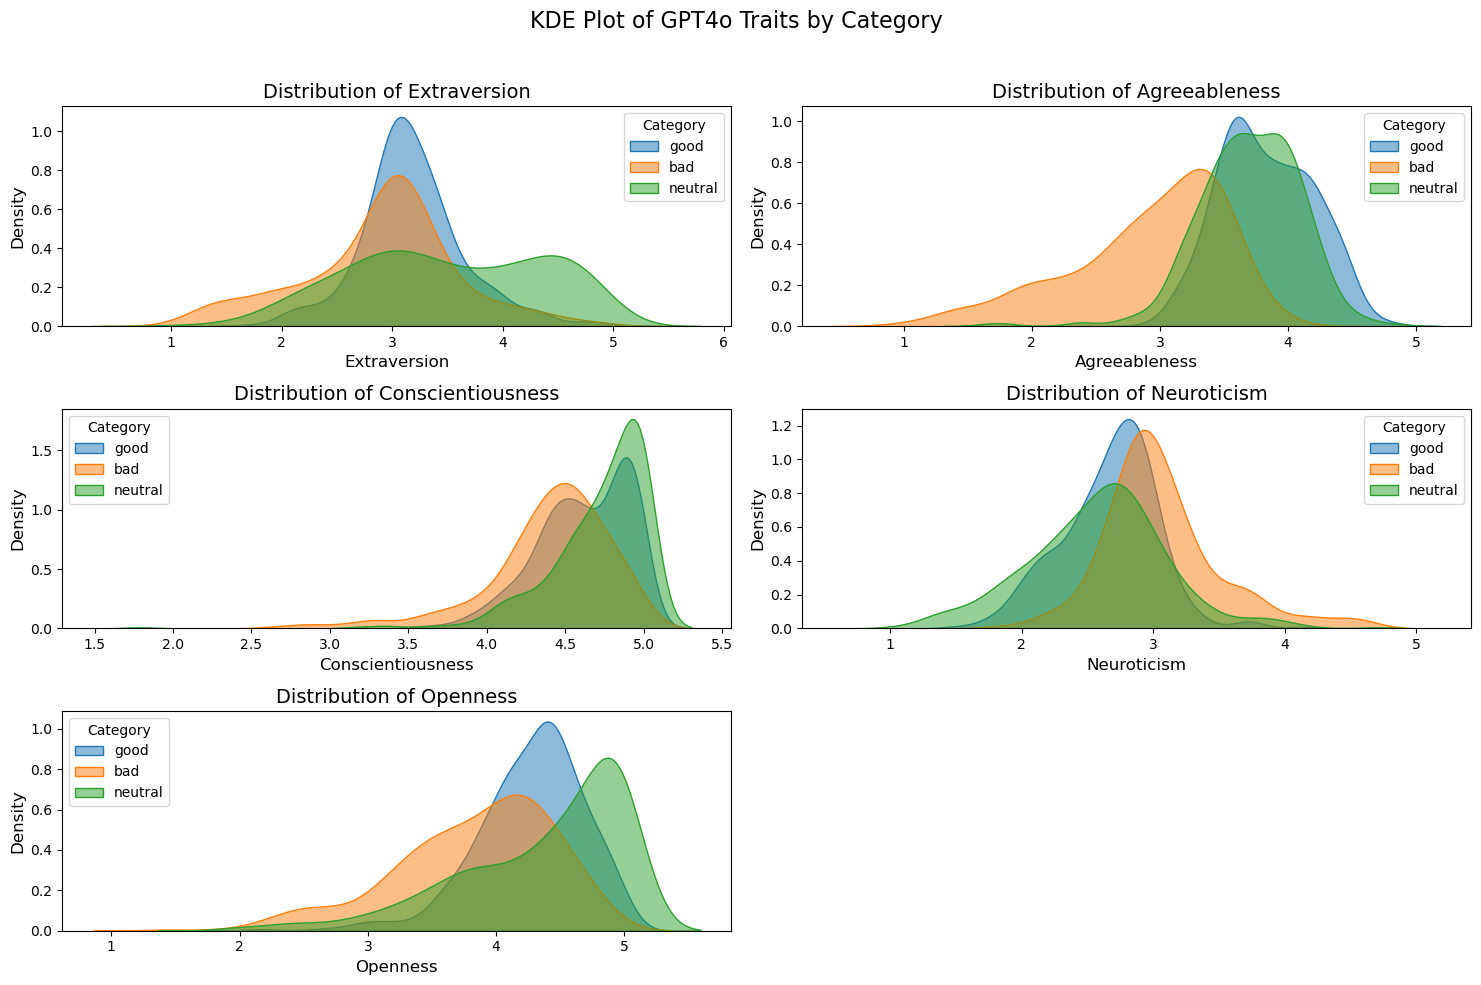

In [18]:
plot_kde_bfi(df_bfi,"GPT4o")

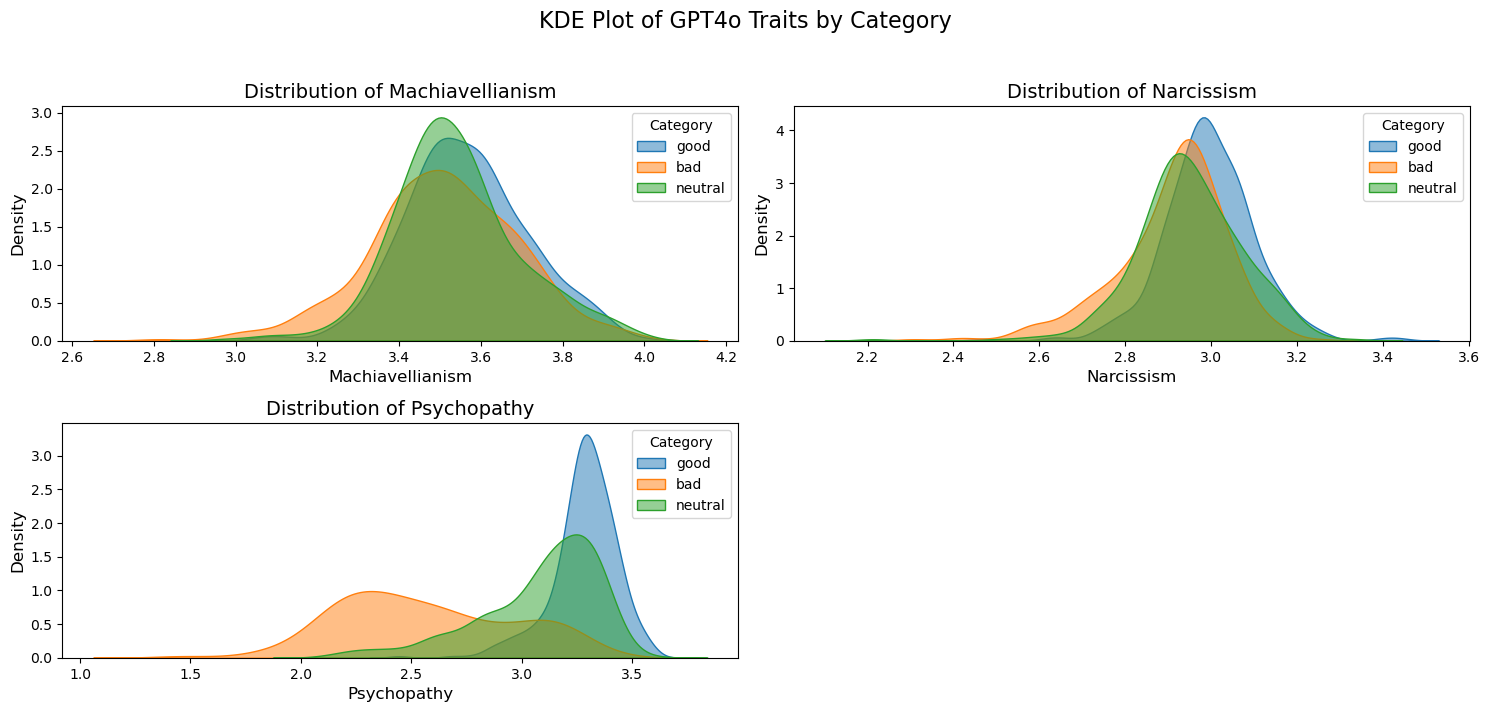

In [21]:
plot_kde_sd3(df_sd3,"GPT4o")

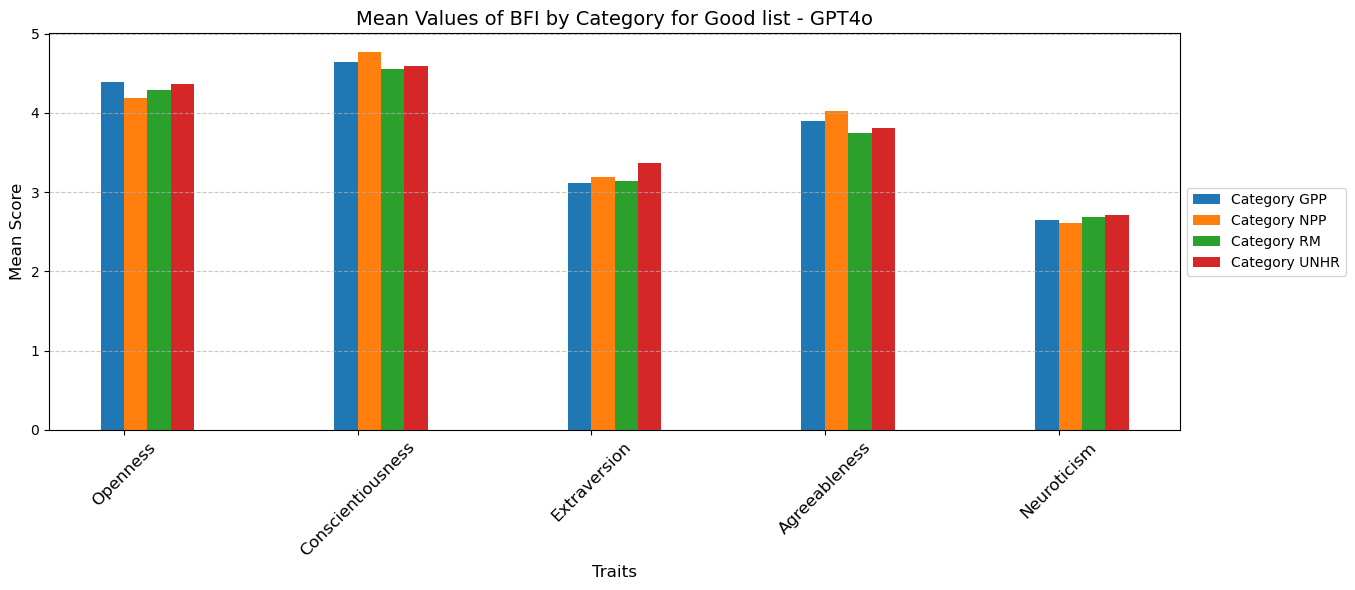

In [57]:
plot_traits_by_source(df1,"Good","GPT4o")

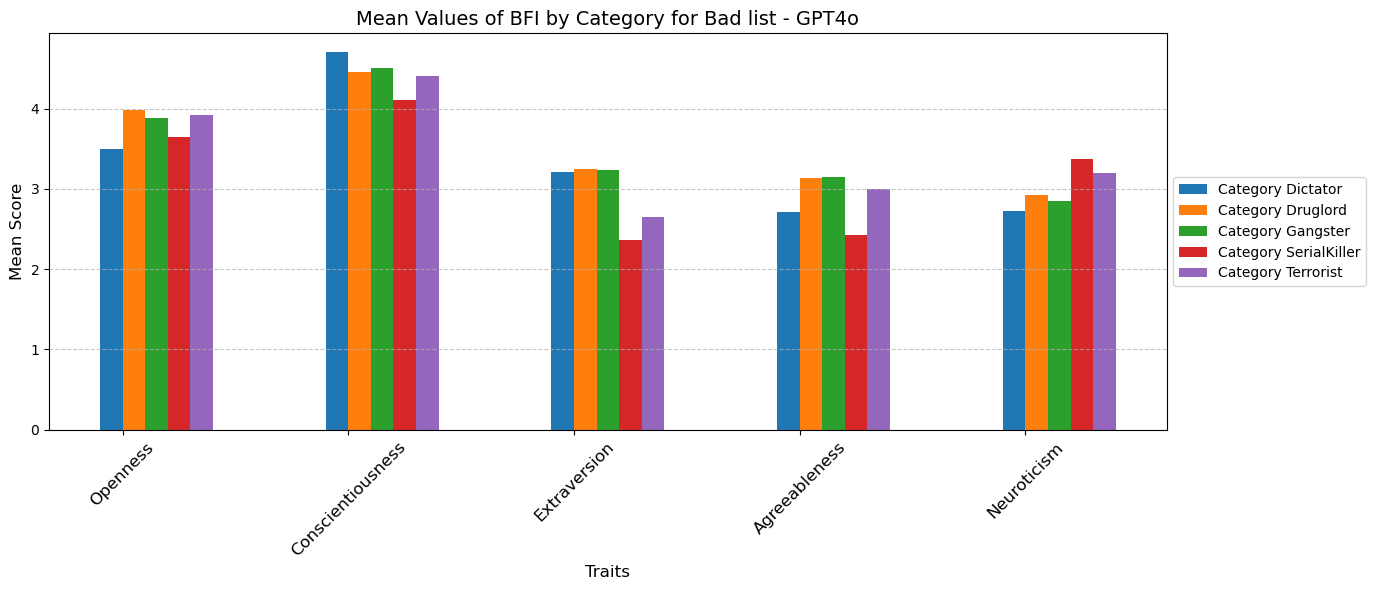

In [58]:
plot_traits_by_source(df2,"Bad","GPT4o")

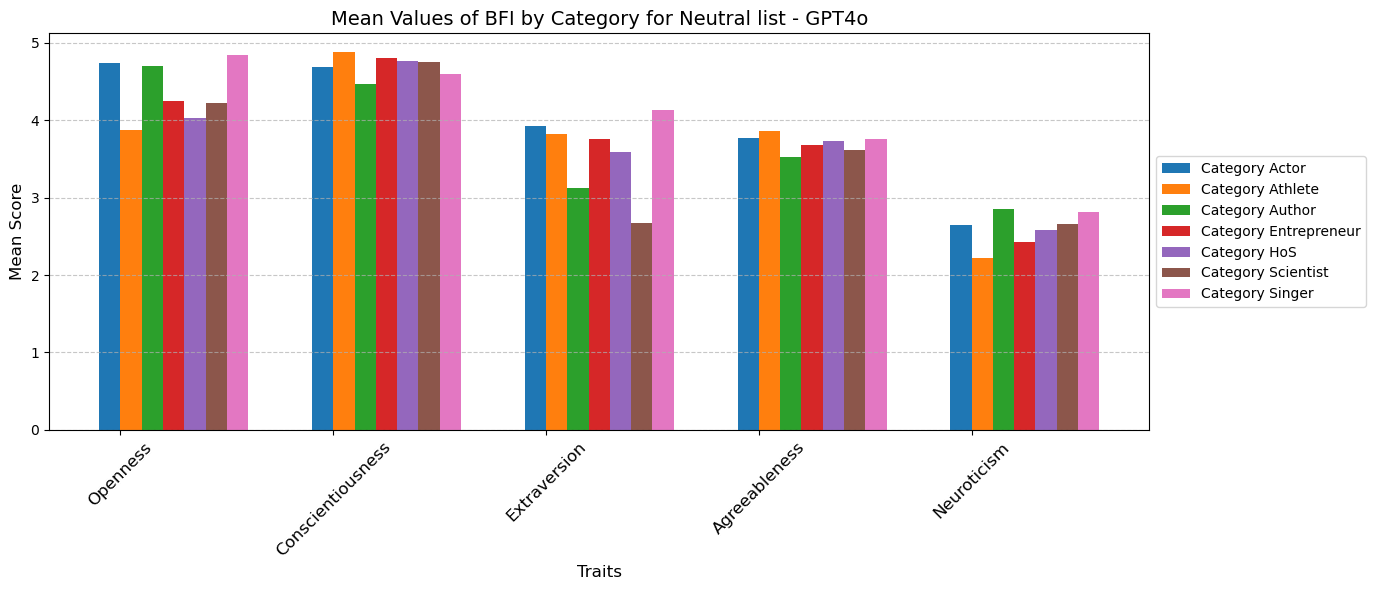

In [59]:
plot_traits_by_source(df3,"Neutral","GPT4o")

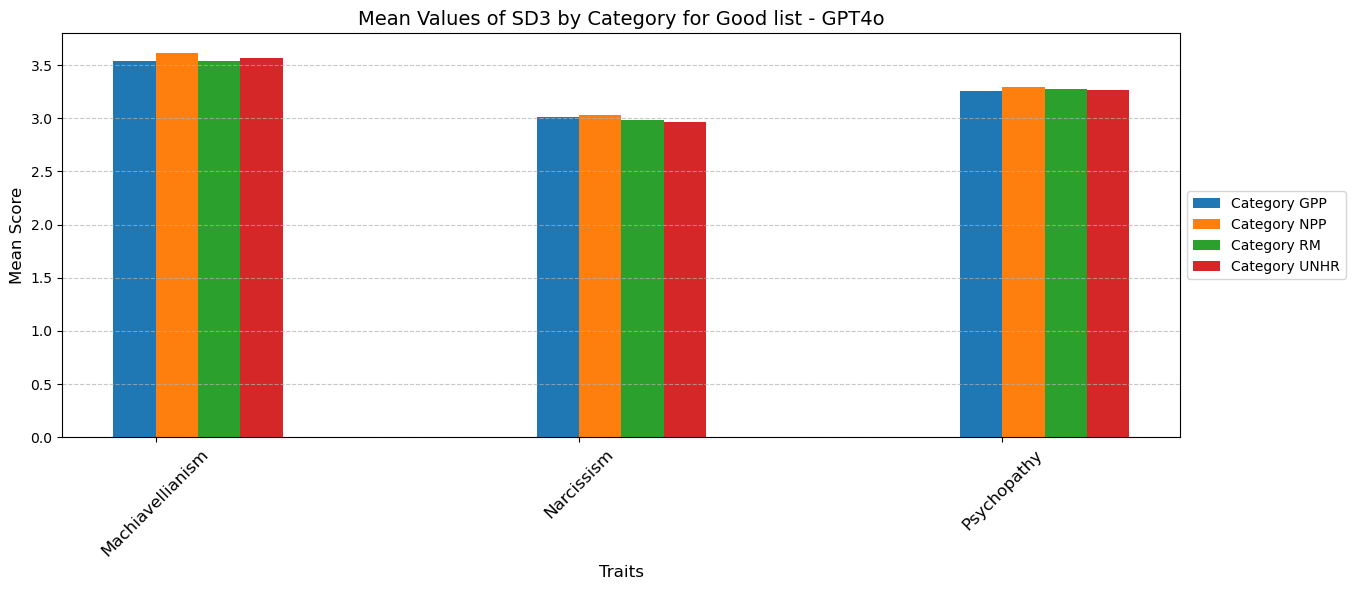

In [60]:
plot_traits_by_source_sd3(df4,"Good","GPT4o")

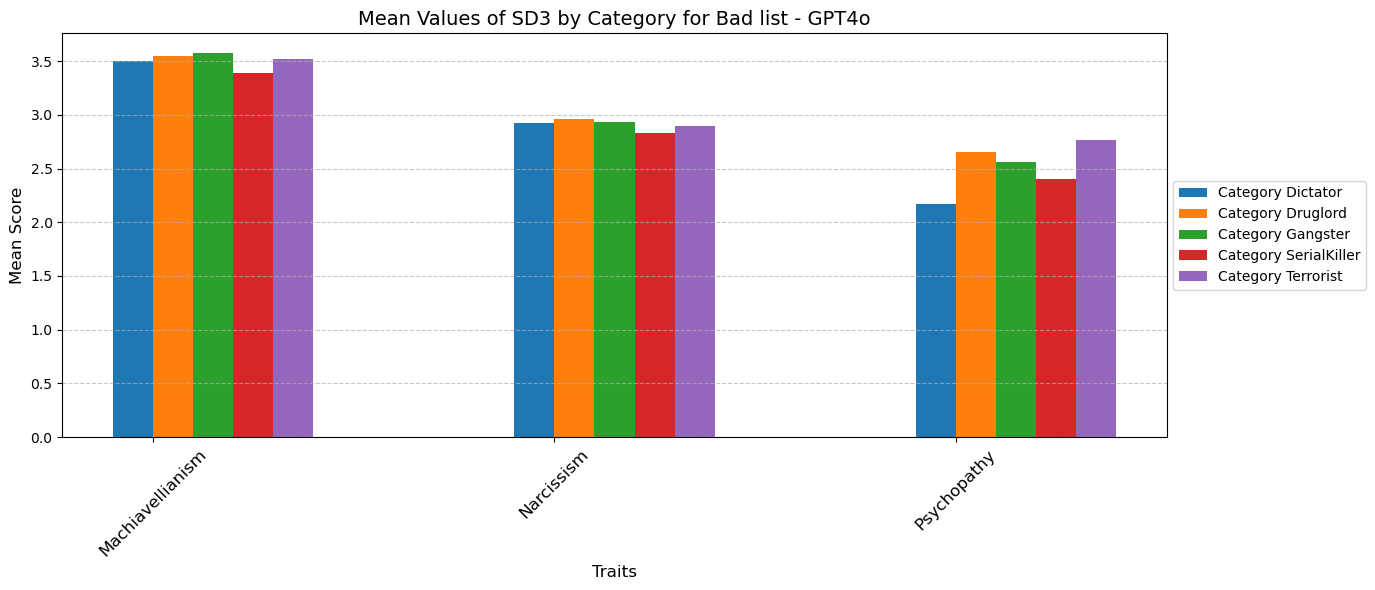

In [61]:
plot_traits_by_source_sd3(df5,"Bad","GPT4o")

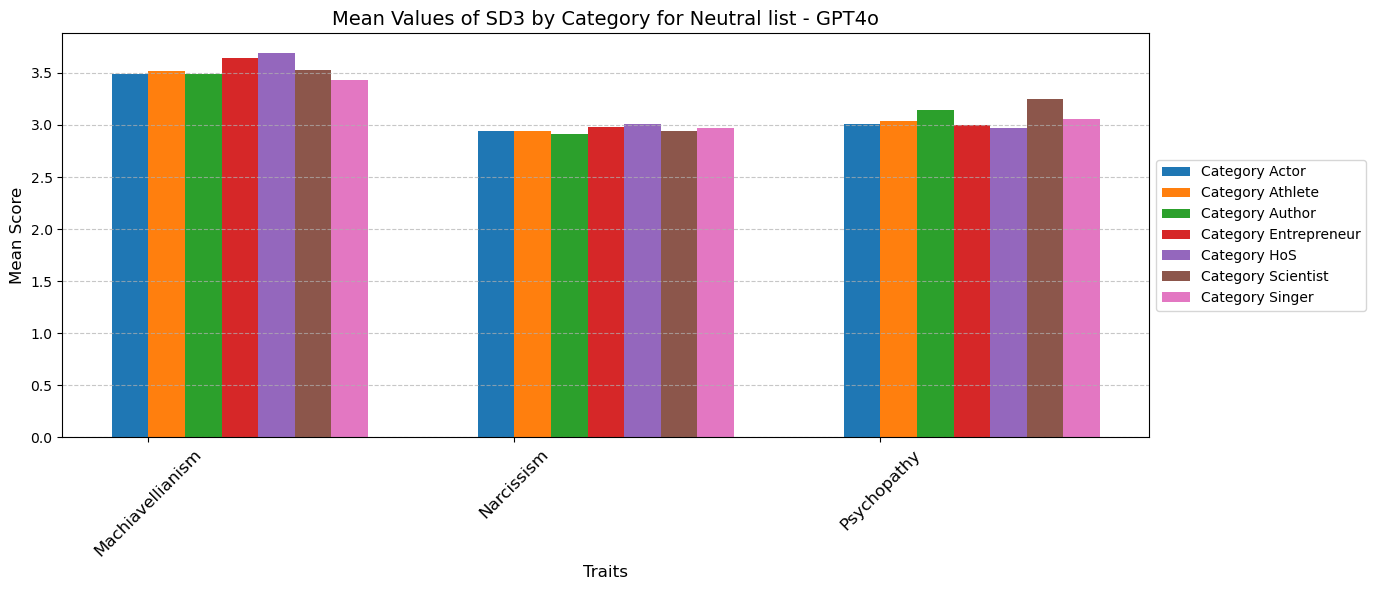

In [62]:
plot_traits_by_source_sd3(df6,"Neutral","GPT4o")

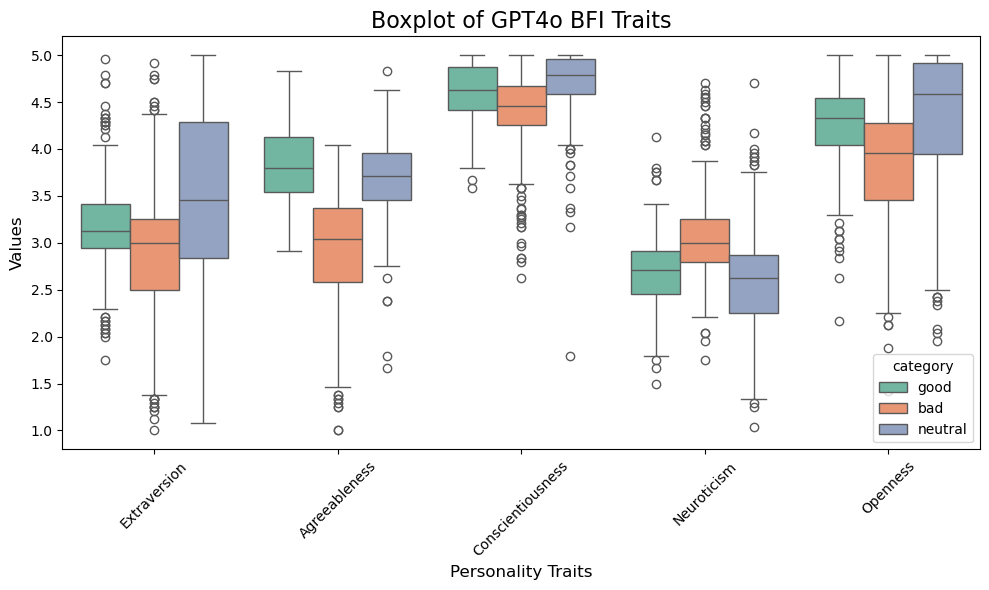

In [67]:
plot_boxplot_bfi(df_bfi,"GPT4o")

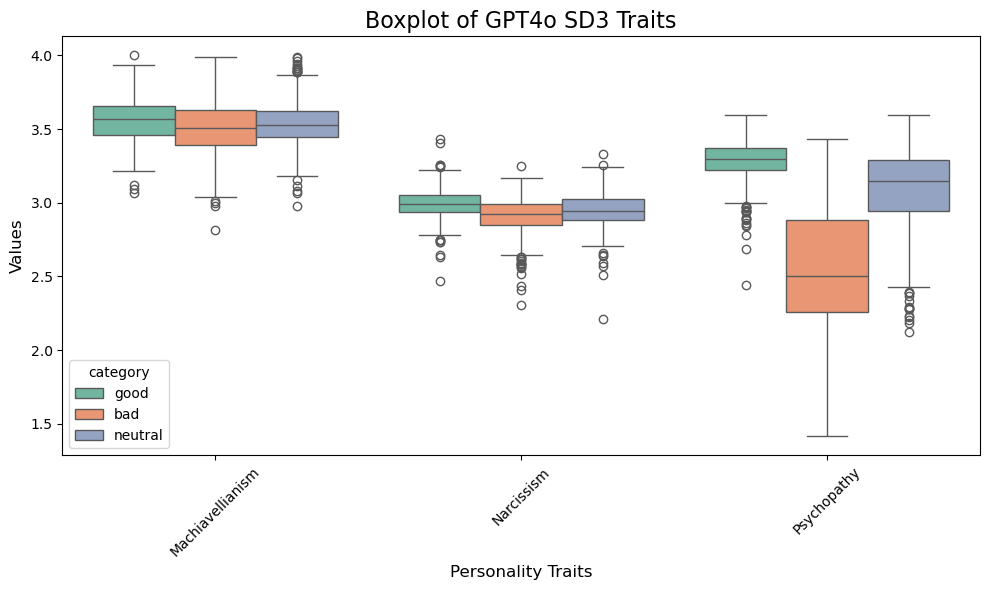

In [68]:
plot_boxplot_sd3(df_sd3,"GPT4o")

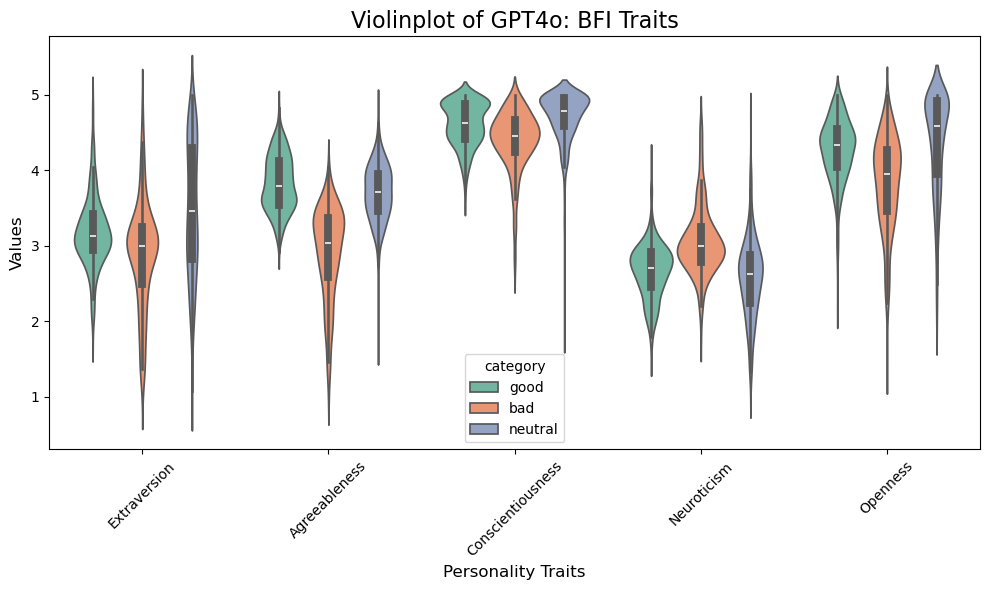

In [69]:
plot_violin_bfi(df_bfi,"GPT4o")

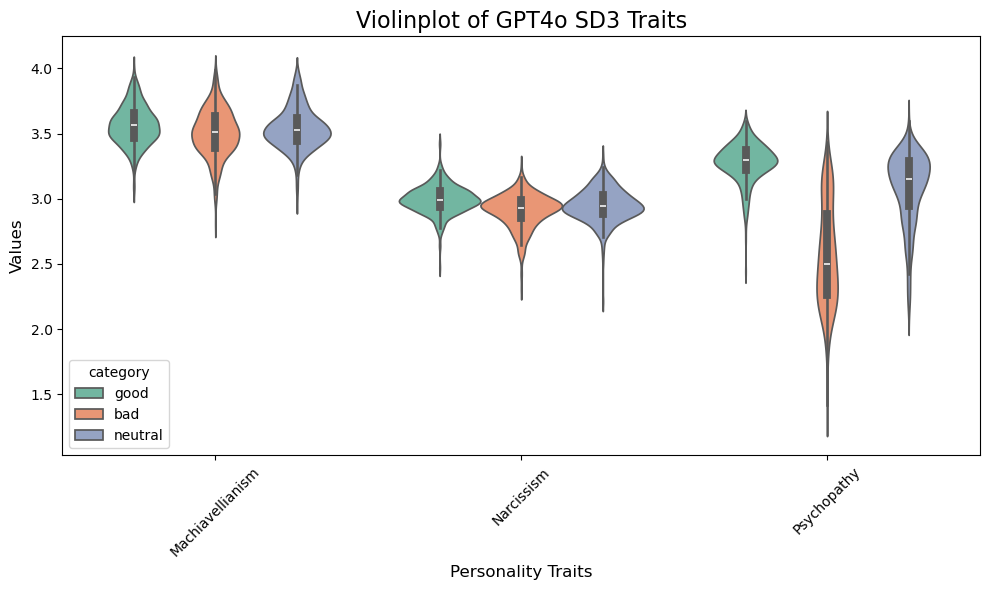

In [70]:
plot_violin_sd3(df_sd3,"GPT4o")

In [ ]:
radar_chart(df_bfi,"GPT4o",1)

In [ ]:
radar_chart(df_sd3,"GPT4o",2)

In [9]:
df_list=[df1,df2,df3]

In [10]:
columns_list = ['Extraversion',	'Agreeableness', 'Conscientiousness', 'Neuroticism',	'Openness']
custom_names = ['Bad','Good','Neutral']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)

print(cdf)


   DataFrame          Attribute      Mean       Std
0        Bad       Extraversion  3.179253  0.466815
1        Bad      Agreeableness  3.830420  0.363491
2        Bad  Conscientiousness  4.617110  0.291473
3        Bad        Neuroticism  2.666600  0.365010
4        Bad           Openness  4.269810  0.419617
5       Good       Extraversion  2.890422  0.705357
6       Good      Agreeableness  2.909098  0.609944
7       Good  Conscientiousness  4.392360  0.403073
8       Good        Neuroticism  3.063720  0.457257
9       Good           Openness  3.828093  0.620427
10   Neutral       Extraversion  3.502128  0.873348
11   Neutral      Agreeableness  3.697287  0.394583
12   Neutral  Conscientiousness  4.714485  0.335475
13   Neutral        Neuroticism  2.575630  0.526596
14   Neutral           Openness  4.363188  0.657345


In [11]:
#Calculate cdf_sd3
columns_list_sd3 = ['Machiavellianism', 'Narcissism', 'Psychopathy']

results = []
for col in columns_list_sd3:
    grouped = df_sd3.groupby('category')[col].agg(['mean', 'std']).reset_index()
    grouped['Attribute'] = col
    results.append(grouped)

cdf_sd3 = pd.concat(results)
cdf_sd3.rename(columns={'category': 'DataFrame', 'mean': 'Mean', 'std': 'Std'}, inplace=True)


In [12]:
cdf_sd3

DataFrame      Mean       Std         Attribute
0       bad  3.506748  0.180581  Machiavellianism
1      good  3.565710  0.149041  Machiavellianism
2   neutral  3.540055  0.155686  Machiavellianism
0       bad  2.907840  0.129767        Narcissism
1      good  2.994463  0.106074        Narcissism
2   neutral  2.949340  0.124633        Narcissism
0       bad  2.563943  0.395274       Psychopathy
1      good  3.281787  0.146895       Psychopathy
2   neutral  3.080440  0.273127       Psychopathy

In [13]:
print(df_sd3.groupby(['category'])['Machiavellianism'].mean())
print(df_sd3.groupby(['category'])['Narcissism'].mean())
print(df_sd3.groupby(['category'])['Psychopathy'].mean())

category
bad        3.506748
good       3.565710
neutral    3.540055
Name: Machiavellianism, dtype: float64
category
bad        2.907840
good       2.994463
neutral    2.949340
Name: Narcissism, dtype: float64
category
bad        2.563943
good       3.281787
neutral    3.080440
Name: Psychopathy, dtype: float64


In [ ]:
print(df_bfi.groupby(['category'])['Extraversion'].mean())
print(df_bfi.groupby(['category'])['Agreeableness'].mean())
print(df_bfi.groupby(['category'])['Conscientiousness'].mean())

category
bad        3.570799
good       3.674977
neutral    3.970132
Name: Extraversion, dtype: float64
category
bad        2.578196
good       3.989482
neutral    3.816832
Name: Agreeableness, dtype: float64
category
bad        4.349887
good       4.357915
neutral    4.559787
Name: Conscientiousness, dtype: float64


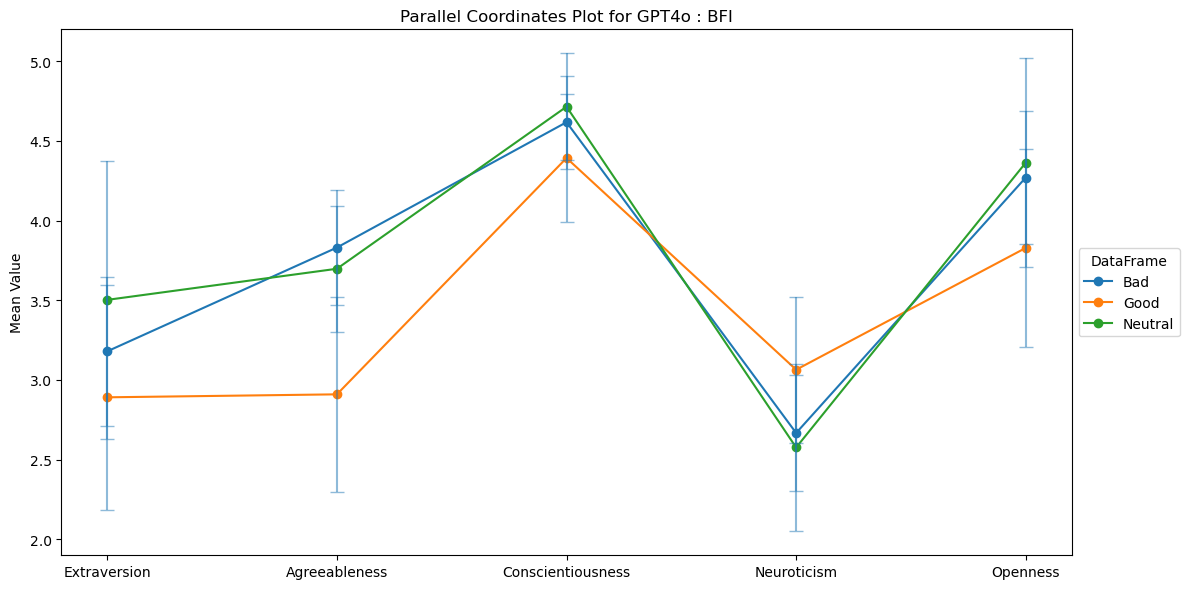

In [17]:
pcp(cdf,"GPT4o","BFI")

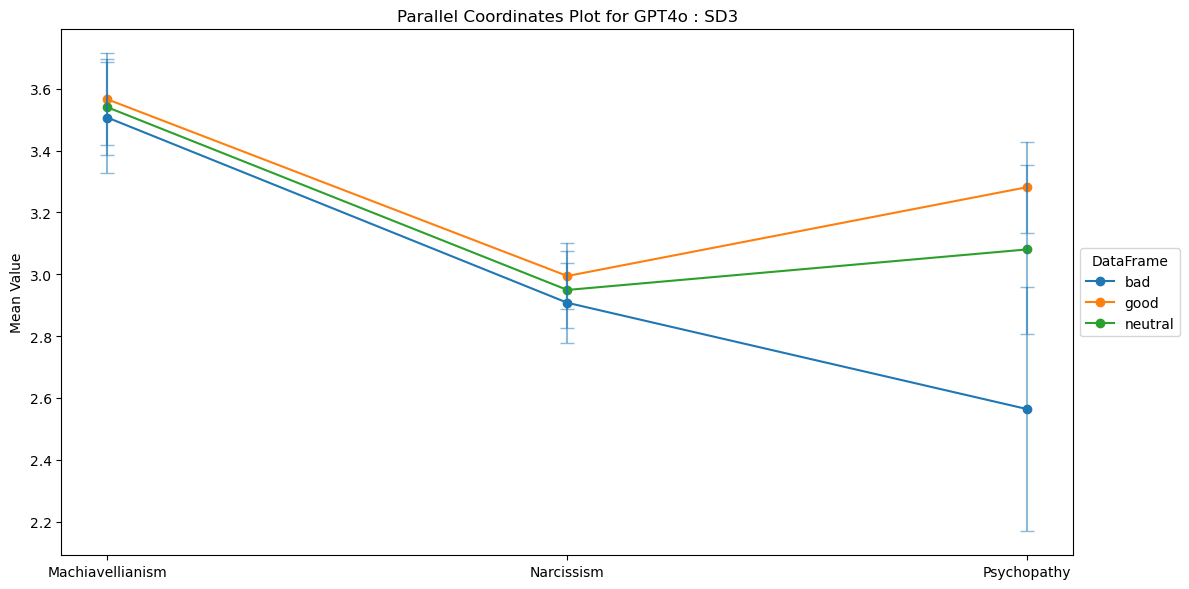

In [18]:
pcp(cdf_sd3,"GPT4o","SD3")

### Visuals for LLama 70B

In [4]:
df1=pd.read_csv('./test_scores/BFI/result_l70b_bfi_g.csv')
df2=pd.read_csv('./test_scores/BFI/result_l70b_bfi_b.csv')
df3=pd.read_csv('./test_scores/BFI/result_l70b_bfi_n.csv')


In [5]:
df4=pd.read_csv('./test_scores/SD3/result_l70b_sd3_g.csv')
df5=pd.read_csv('./test_scores/SD3/result_l70b_sd3_b.csv')
df6=pd.read_csv('./test_scores/SD3/result_l70b_sd3_n.csv')

In [6]:
df1['category']="good"
df2['category']="bad"
df3['category']="neutral"

In [7]:
df4['category']="good"
df5['category']="bad"
df6['category']="neutral"

In [8]:
df_list_bfi=[df1,df2,df3]
df_bfi=pd.concat(df_list_bfi, ignore_index=True)

In [9]:
df_list_sd3=[df4,df5,df6]
df_sd3=pd.concat(df_list_sd3, ignore_index=True)

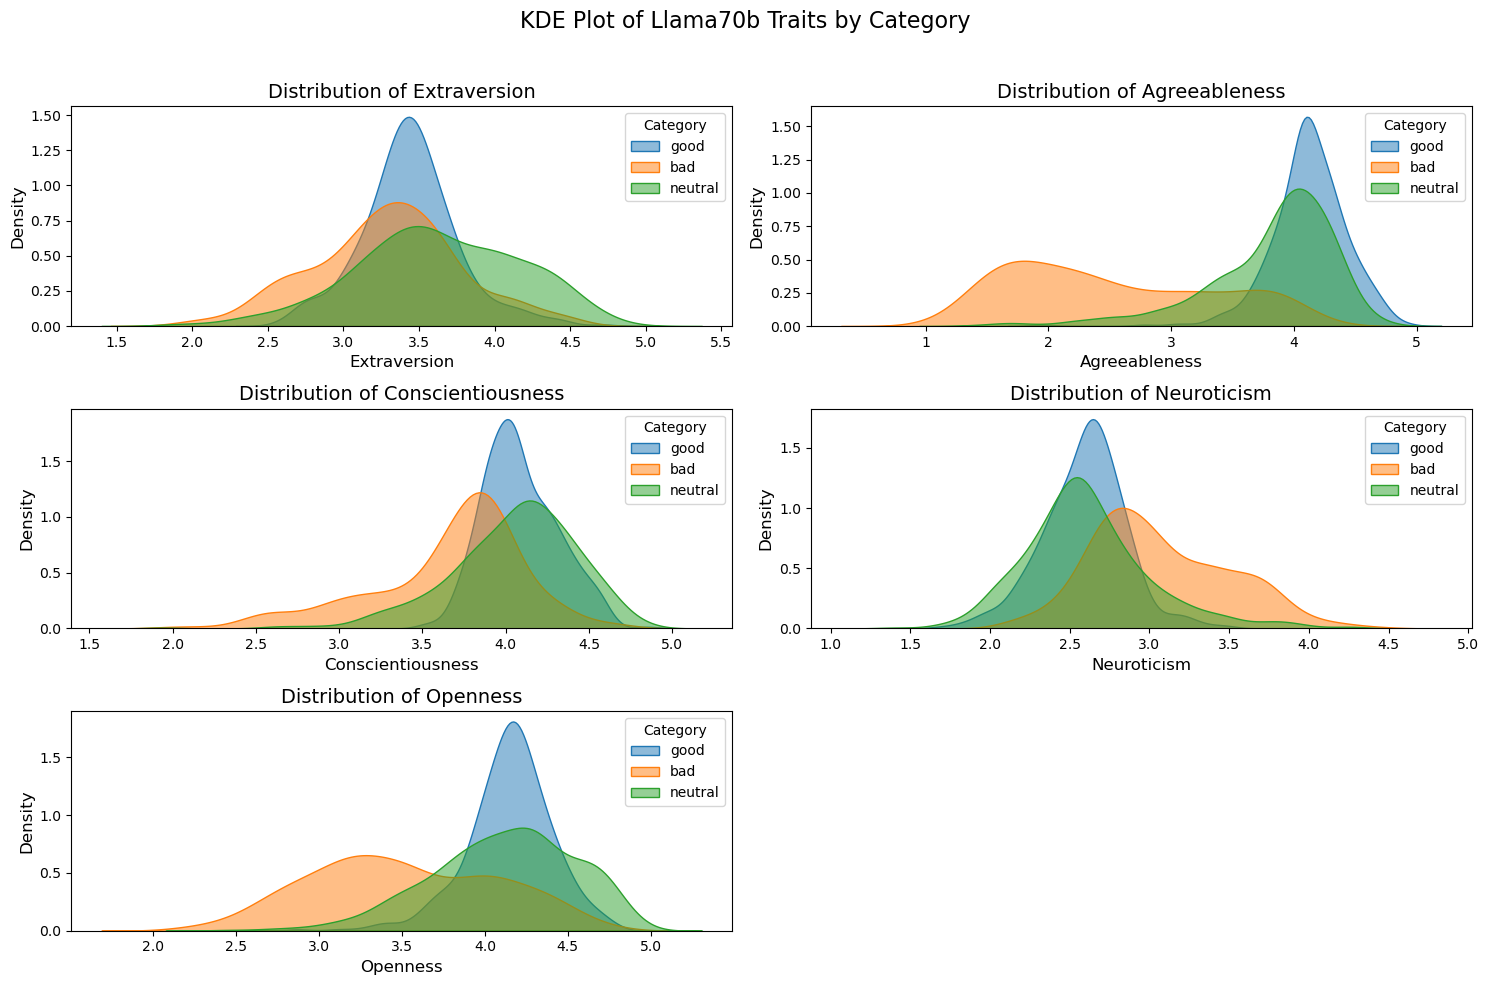

In [23]:
plot_kde_bfi(df_bfi,"Llama70b")

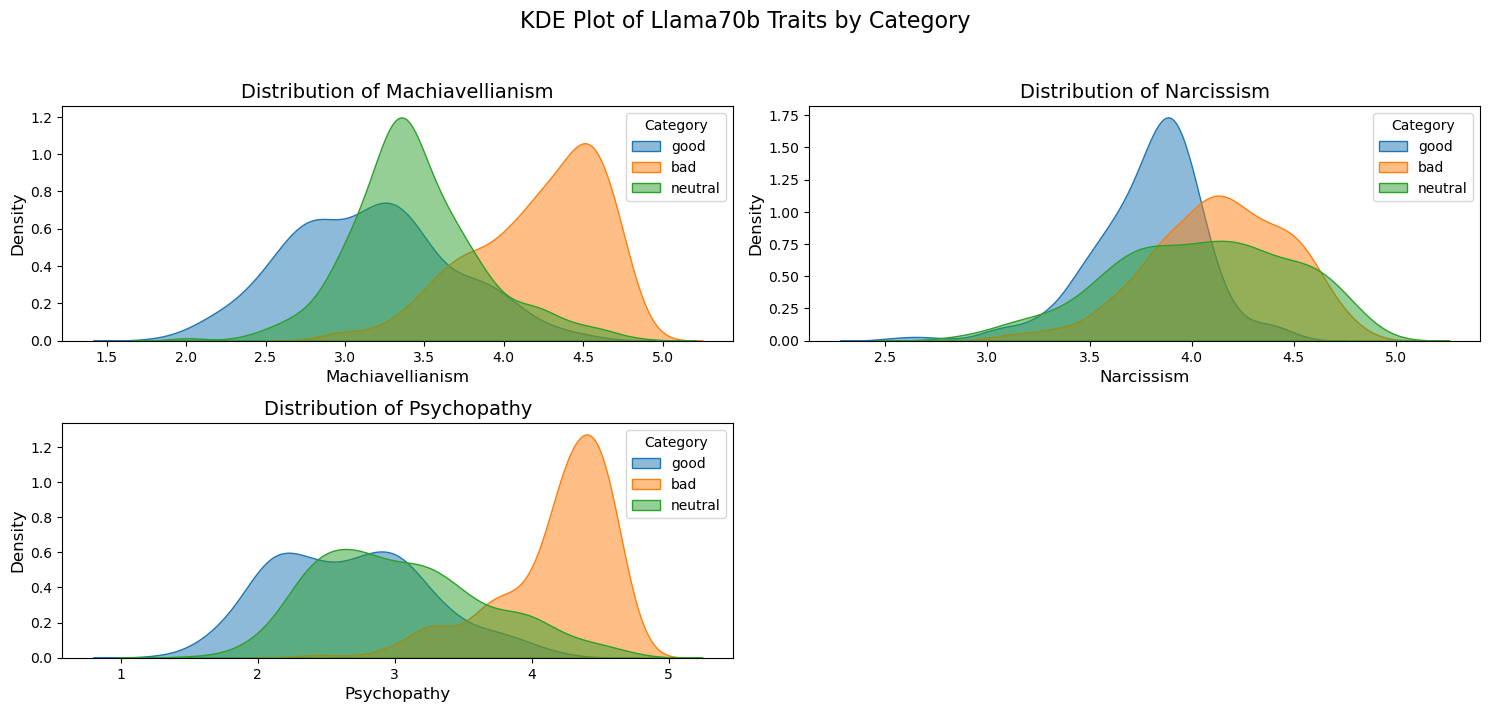

In [24]:
plot_kde_sd3(df_sd3,"Llama70b")

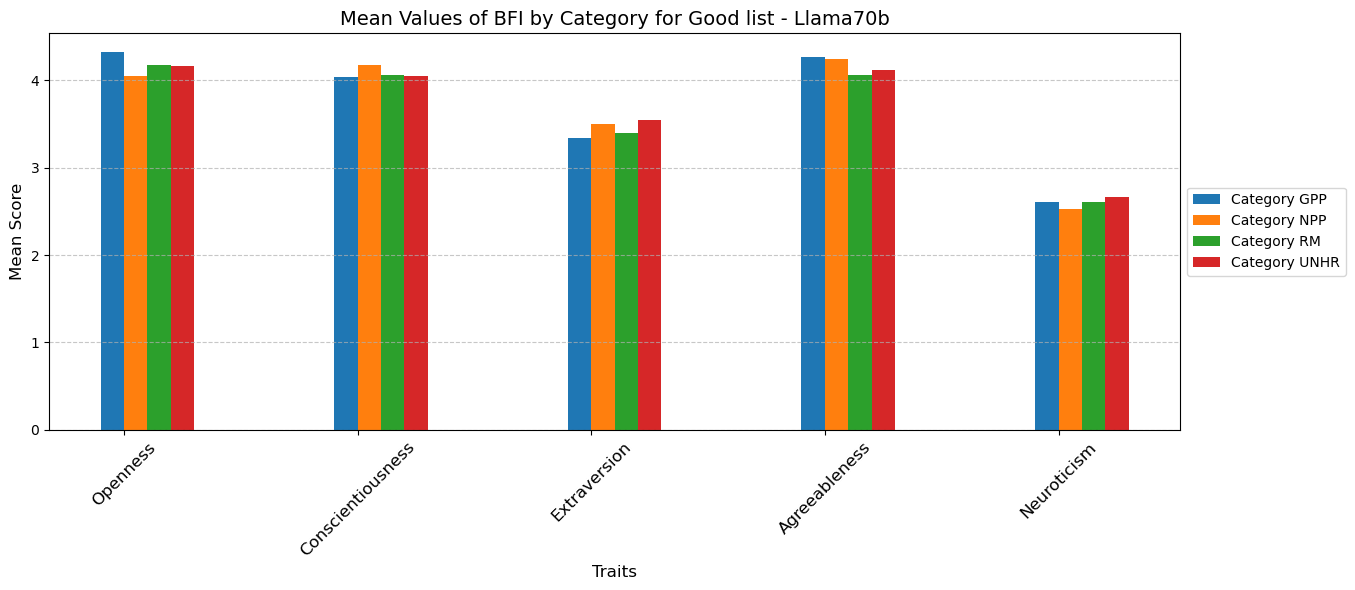

In [25]:
plot_traits_by_source(df1,"Good","Llama70b")

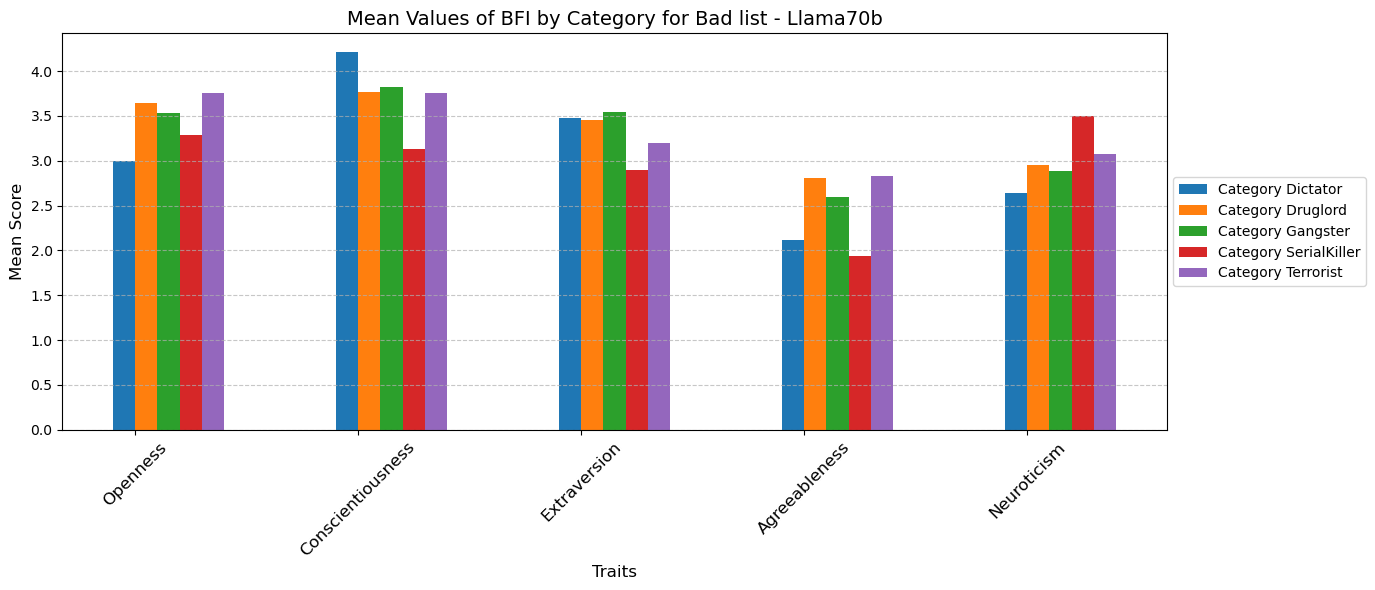

In [26]:
plot_traits_by_source(df2,"Bad","Llama70b")

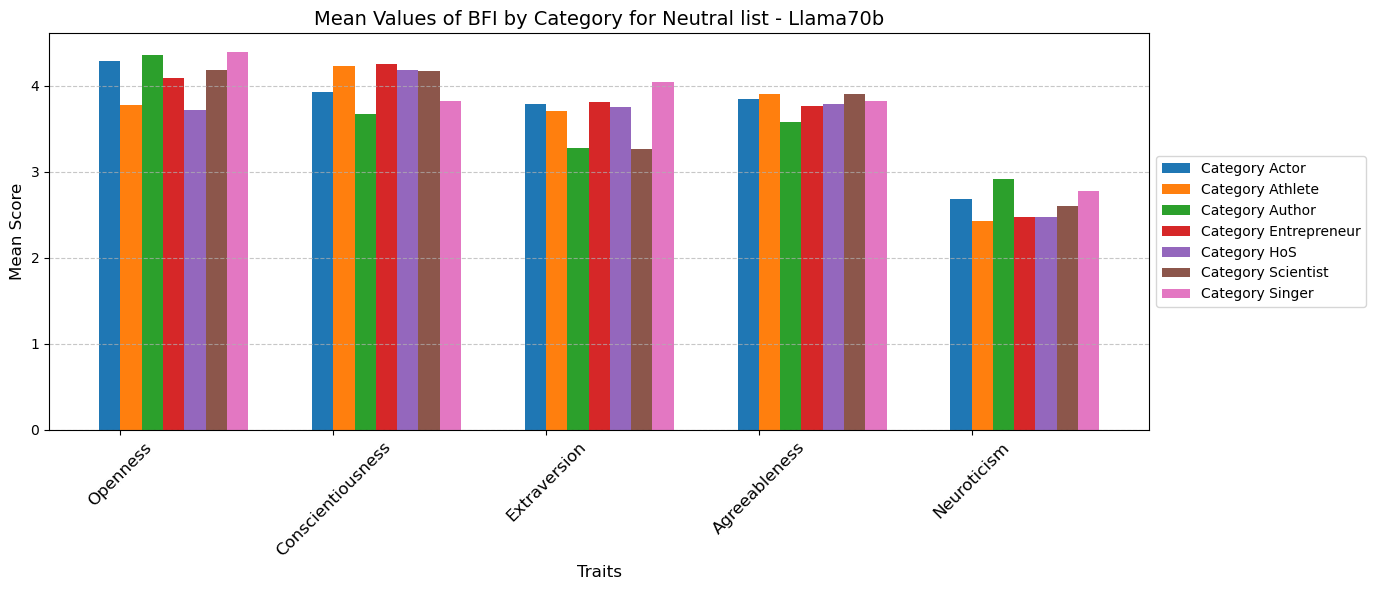

In [27]:
plot_traits_by_source(df3,"Neutral","Llama70b")

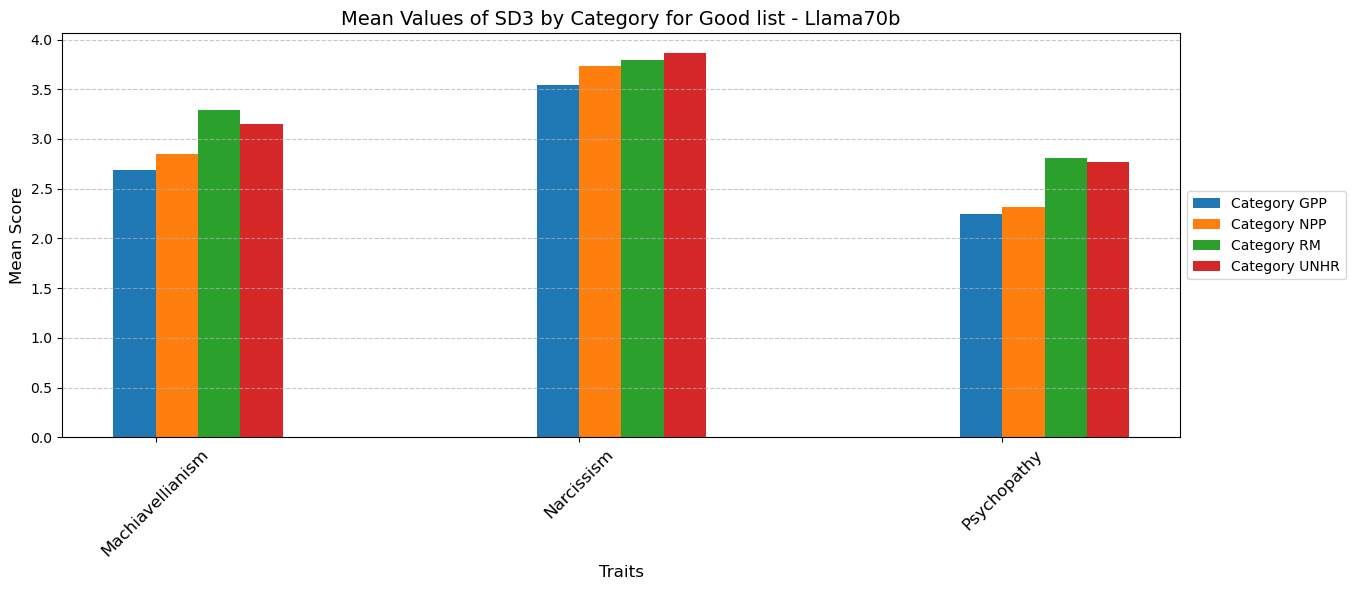

In [28]:
plot_traits_by_source_sd3(df4,"Good","Llama70b")

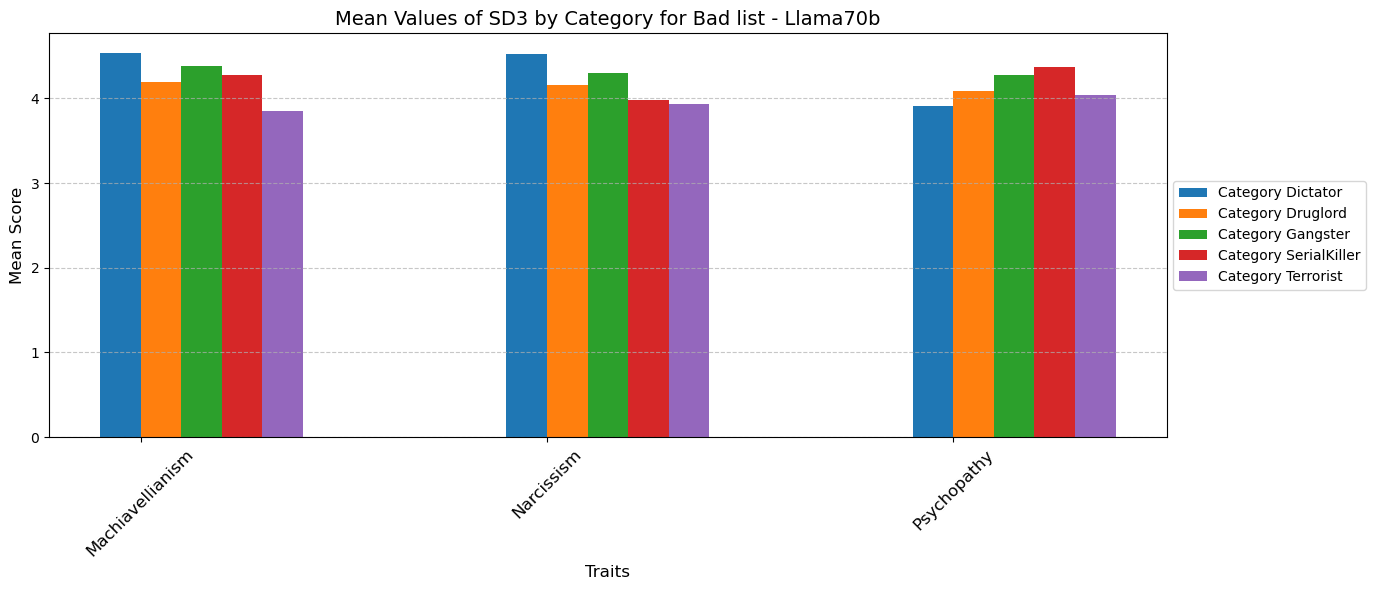

In [29]:
plot_traits_by_source_sd3(df5,"Bad","Llama70b")

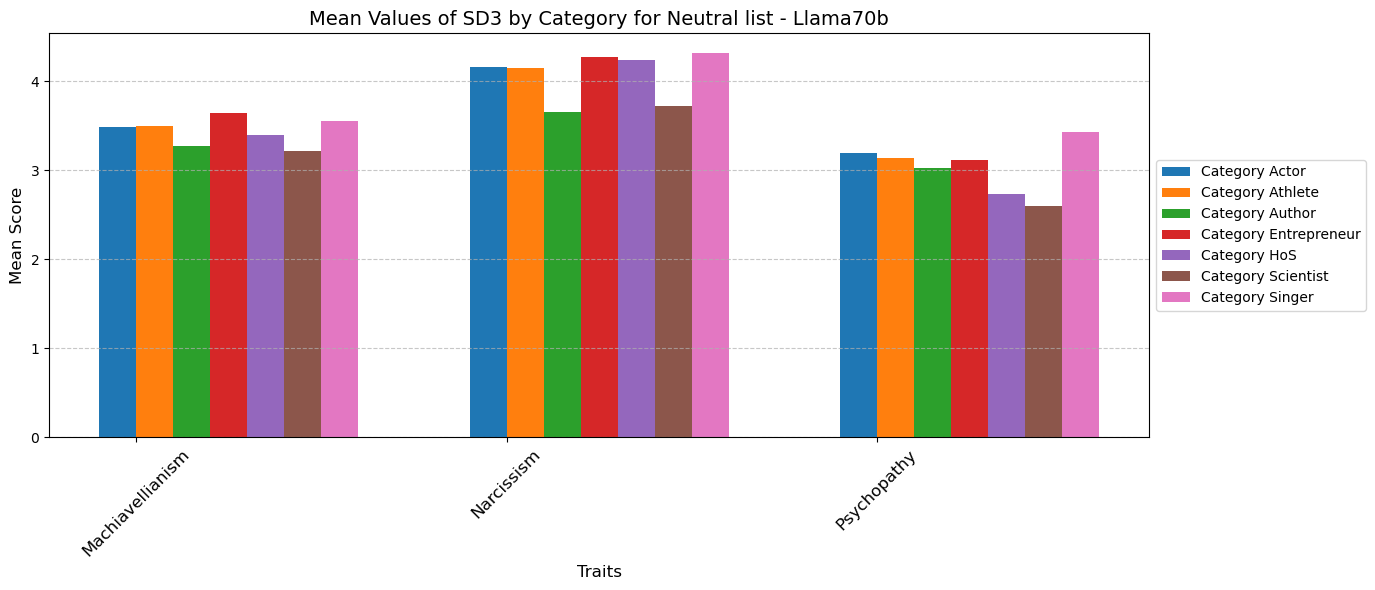

In [30]:
plot_traits_by_source_sd3(df6,"Neutral","Llama70b")

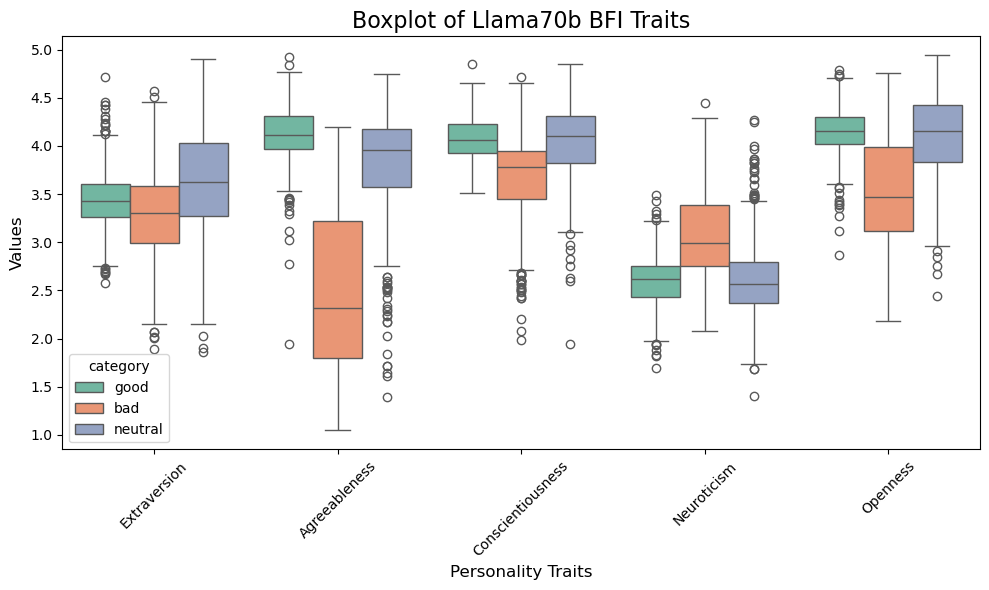

In [31]:
plot_boxplot_bfi(df_bfi,"Llama70b")

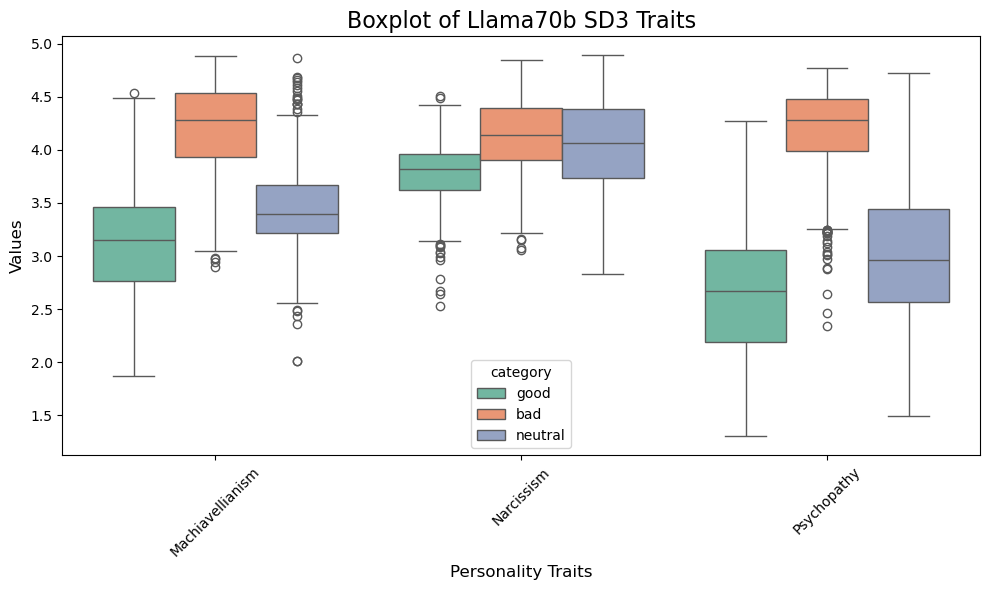

In [32]:
plot_boxplot_sd3(df_sd3,"Llama70b")

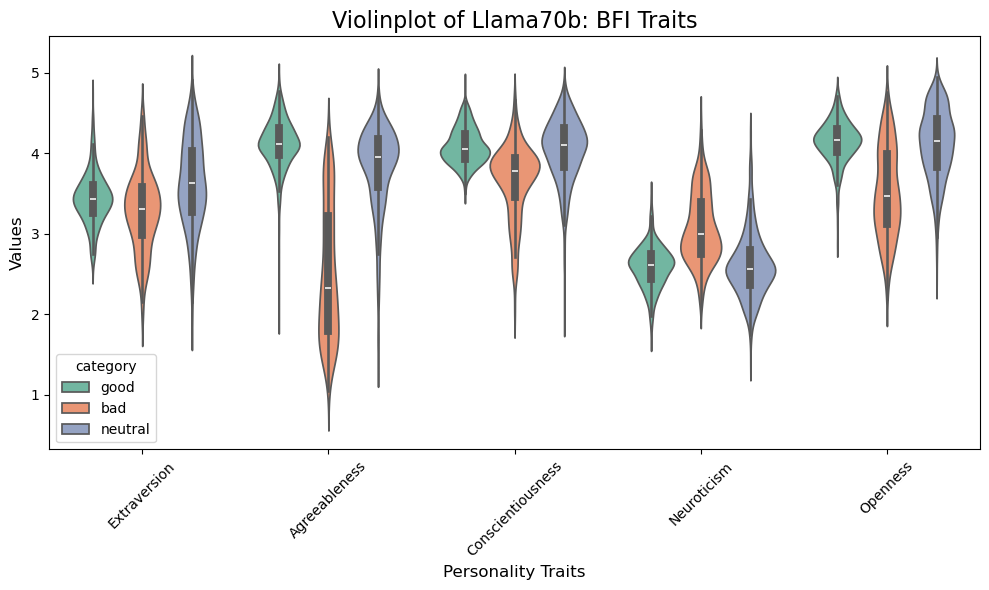

In [33]:
plot_violin_bfi(df_bfi,"Llama70b")

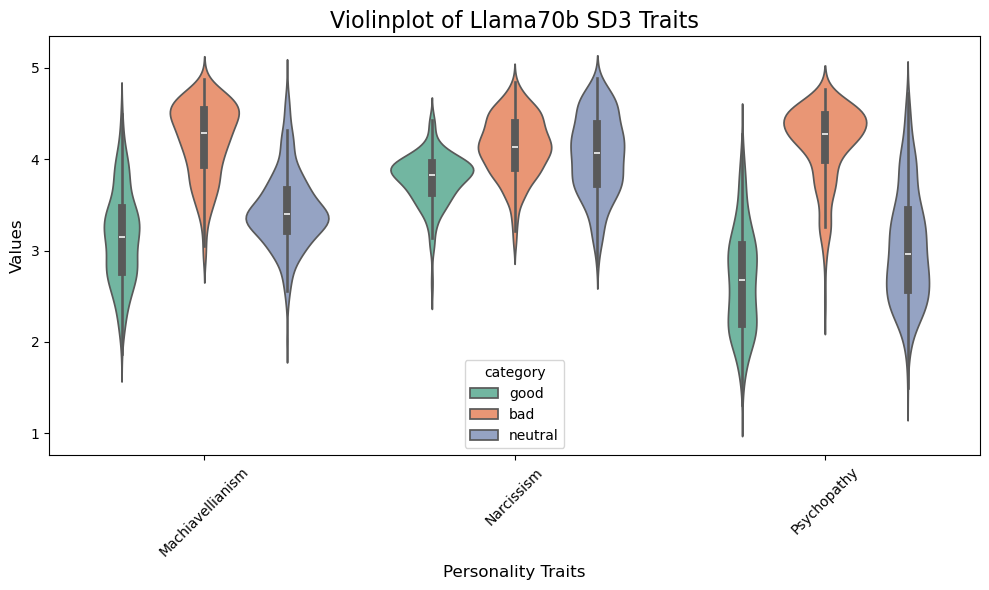

In [34]:
plot_violin_sd3(df_sd3,"Llama70b")

In [21]:
radar_chart(df_bfi,"Llama70b",1)

In [22]:
radar_chart(df_sd3,"Llama70b",2)

In [11]:
df_list=[df1,df2,df3]

In [12]:
columns_list = ['Extraversion',	'Agreeableness', 'Conscientiousness', 'Neuroticism',	'Openness']
custom_names = ['Bad','Good','Neutral']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)

print(cdf)


   DataFrame          Attribute      Mean       Std
0        Bad       Extraversion  3.438091  0.320062
1        Bad      Agreeableness  4.119199  0.309373
2        Bad  Conscientiousness  4.086489  0.222151
3        Bad        Neuroticism  2.590232  0.259679
4        Bad           Openness  4.146614  0.258138
5       Good       Extraversion  3.284326  0.491199
6       Good      Agreeableness  2.510018  0.826965
7       Good  Conscientiousness  3.655333  0.459822
8       Good        Neuroticism  3.071362  0.433134
9       Good           Openness  3.513851  0.557538
10   Neutral       Extraversion  3.627506  0.547652
11   Neutral      Agreeableness  3.810769  0.529351
12   Neutral  Conscientiousness  4.046596  0.383979
13   Neutral        Neuroticism  2.607503  0.400887
14   Neutral           Openness  4.110662  0.431922


In [13]:
#Calculate cdf_sd3
columns_list_sd3 = ['Machiavellianism', 'Narcissism', 'Psychopathy']

results = []
for col in columns_list_sd3:
    grouped = df_sd3.groupby('category')[col].agg(['mean', 'std']).reset_index()
    grouped['Attribute'] = col
    results.append(grouped)

cdf_sd3 = pd.concat(results)
cdf_sd3.rename(columns={'category': 'DataFrame', 'mean': 'Mean', 'std': 'Std'}, inplace=True)


In [14]:
cdf_sd3

DataFrame      Mean       Std         Attribute
0       bad  4.208990  0.411784  Machiavellianism
1      good  3.152227  0.511385  Machiavellianism
2   neutral  3.441084  0.413390  Machiavellianism
0       bad  4.134785  0.337639        Narcissism
1      good  3.784012  0.281220        Narcissism
2   neutral  4.042644  0.439463        Narcissism
0       bad  4.169391  0.429040       Psychopathy
1      good  2.671773  0.569235       Psychopathy
2   neutral  3.044240  0.617617       Psychopathy

In [15]:
print(df_sd3.groupby(['category'])['Machiavellianism'].mean())
print(df_sd3.groupby(['category'])['Narcissism'].mean())
print(df_sd3.groupby(['category'])['Psychopathy'].mean())

category
bad        4.208990
good       3.152227
neutral    3.441084
Name: Machiavellianism, dtype: float64
category
bad        4.134785
good       3.784012
neutral    4.042644
Name: Narcissism, dtype: float64
category
bad        4.169391
good       2.671773
neutral    3.044240
Name: Psychopathy, dtype: float64


In [16]:
print(df_bfi.groupby(['category'])['Extraversion'].mean())
print(df_bfi.groupby(['category'])['Agreeableness'].mean())
print(df_bfi.groupby(['category'])['Conscientiousness'].mean())

category
bad        3.284326
good       3.438091
neutral    3.627506
Name: Extraversion, dtype: float64
category
bad        2.510018
good       4.119199
neutral    3.810769
Name: Agreeableness, dtype: float64
category
bad        3.655333
good       4.086489
neutral    4.046596
Name: Conscientiousness, dtype: float64


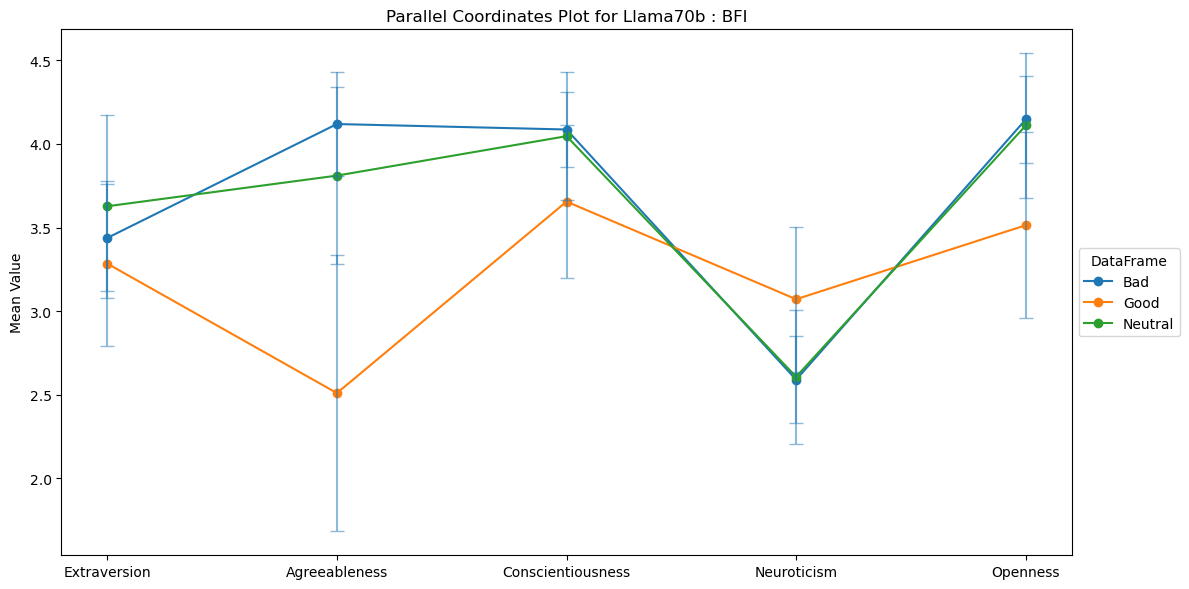

In [18]:
pcp(cdf,"Llama70b","BFI")

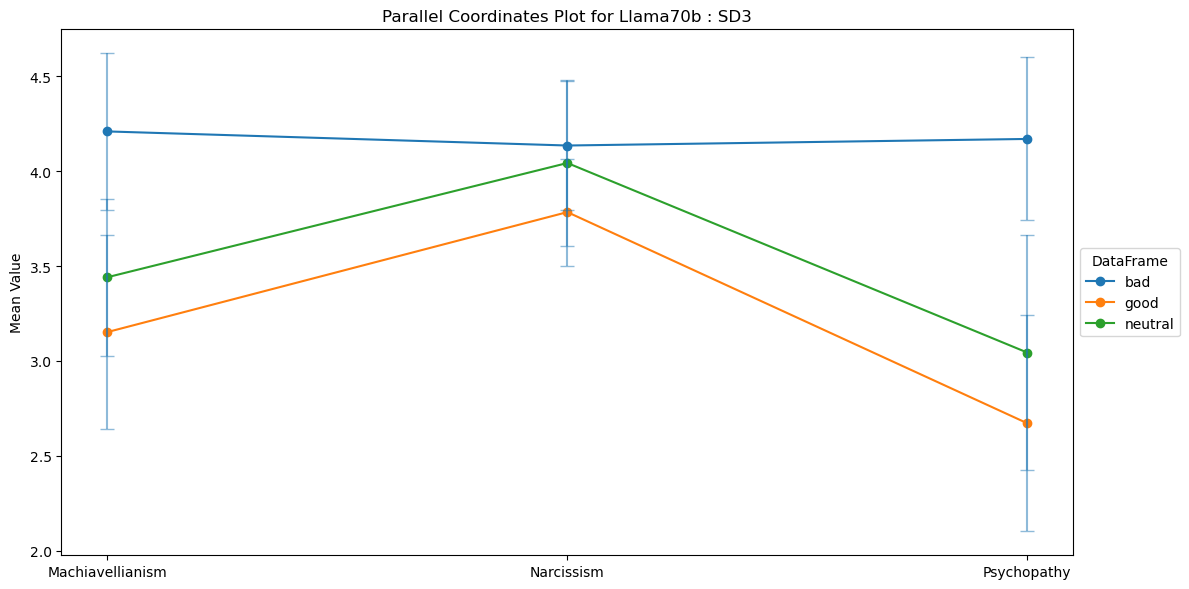

In [19]:
pcp(cdf_sd3,"Llama70b","SD3")

### Visuals for Llama 8b 

In [15]:
df1=pd.read_csv('./test_scores/BFI/result_l8b_bfi_g.csv')
df2=pd.read_csv('./test_scores/BFI/result_l8b_bfi_b.csv')
df3=pd.read_csv('./test_scores/BFI/result_l8b_bfi_n.csv')


In [16]:
df4=pd.read_csv('./test_scores/SD3/result_l8b_sd3_g.csv')
df5=pd.read_csv('./test_scores/SD3/result_l8b_sd3_b.csv')
df6=pd.read_csv('./test_scores/SD3/result_l8b_sd3_n.csv')

In [17]:
df1['category']="good"
df2['category']="bad"
df3['category']="neutral"

In [18]:
df4['category']="good"
df5['category']="bad"
df6['category']="neutral"

In [19]:
df_list_bfi=[df1,df2,df3]
df_bfi=pd.concat(df_list_bfi, ignore_index=True)

In [20]:
df_list_sd3=[df4,df5,df6]
df_sd3=pd.concat(df_list_sd3, ignore_index=True)

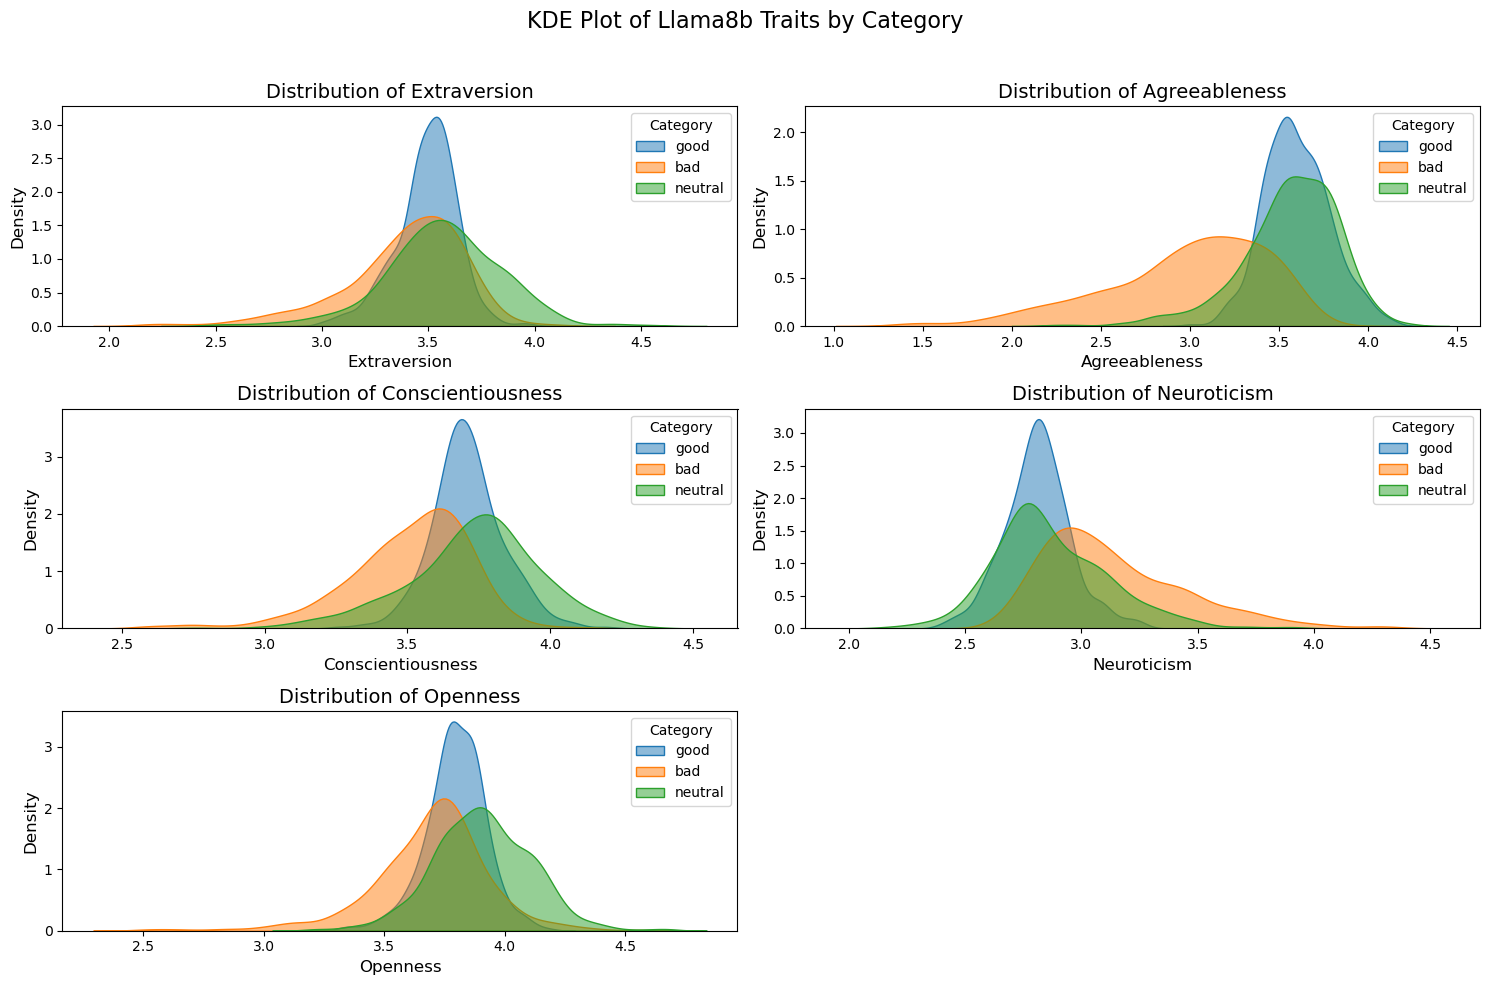

In [21]:
plot_kde_bfi(df_bfi,"Llama8b")

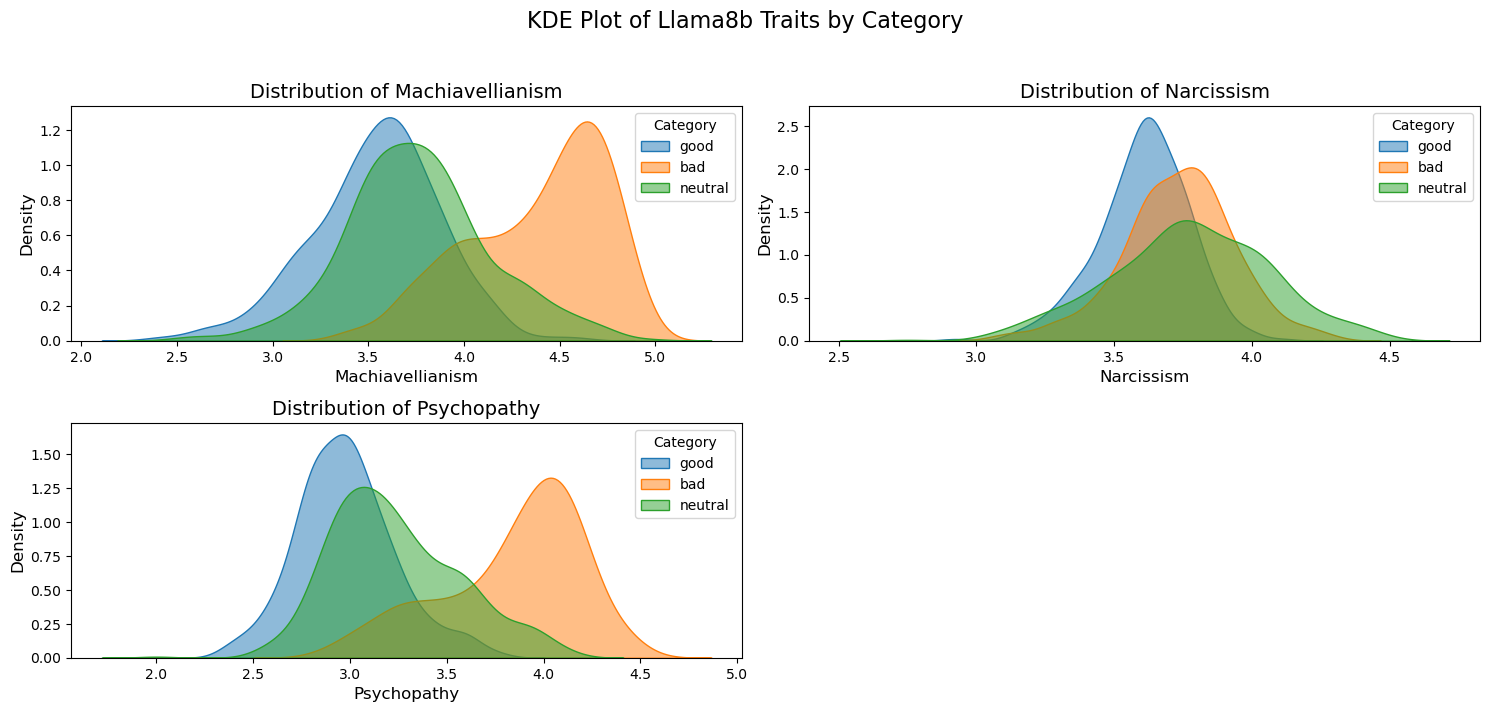

In [22]:
plot_kde_sd3(df_sd3,"Llama8b")

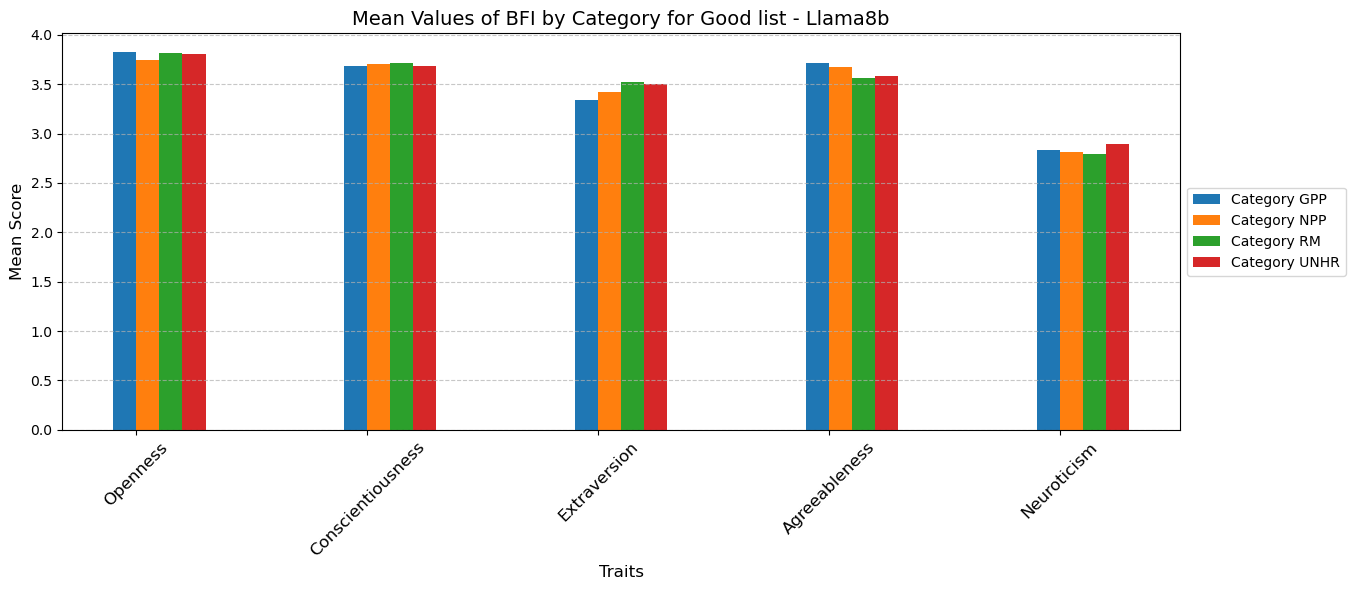

In [23]:
plot_traits_by_source(df1,"Good","Llama8b")

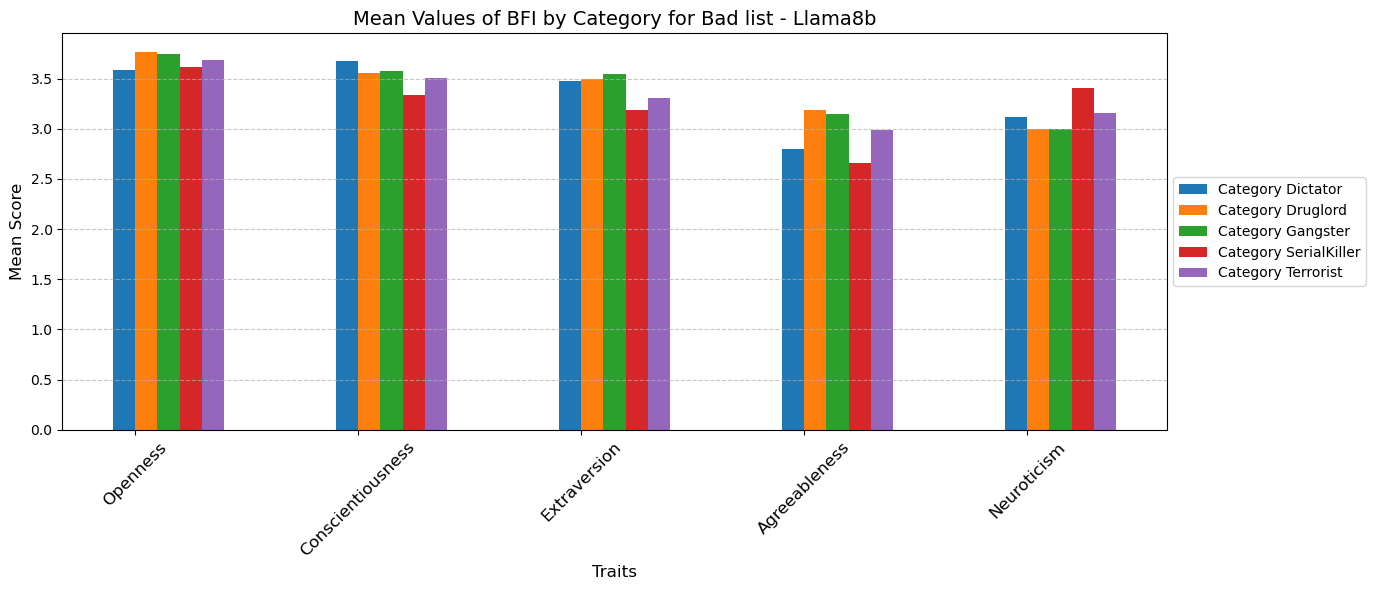

In [24]:
plot_traits_by_source(df2,"Bad","Llama8b")

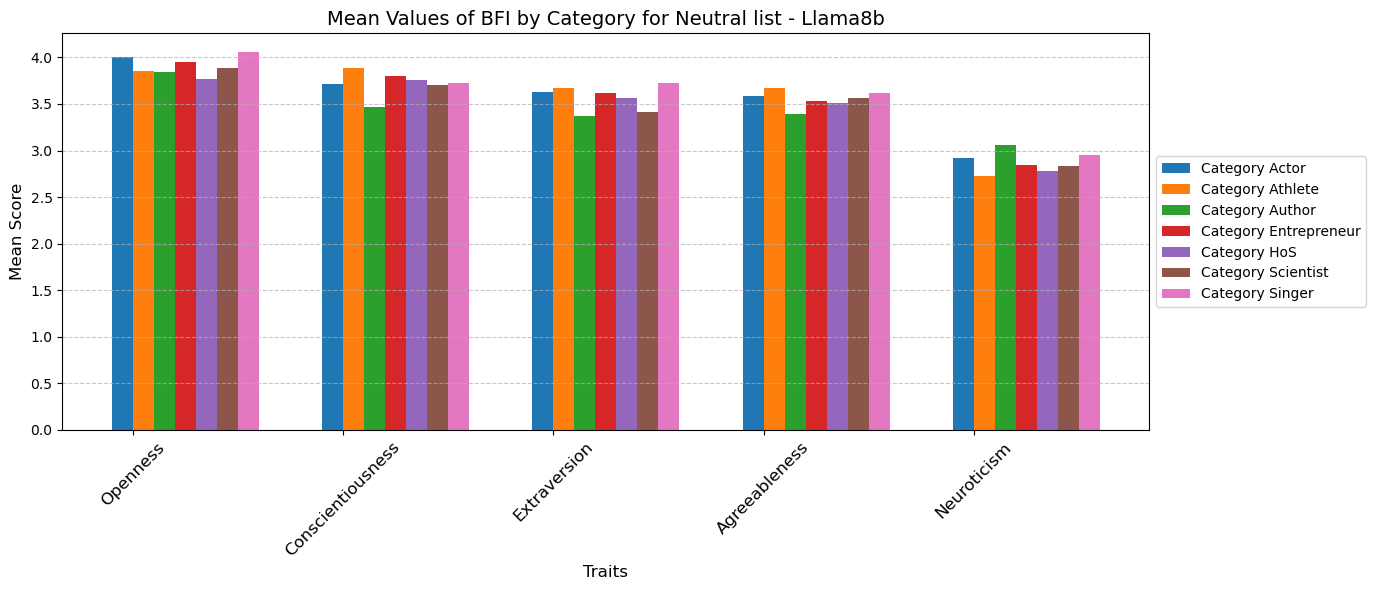

In [25]:
plot_traits_by_source(df3,"Neutral","Llama8b")

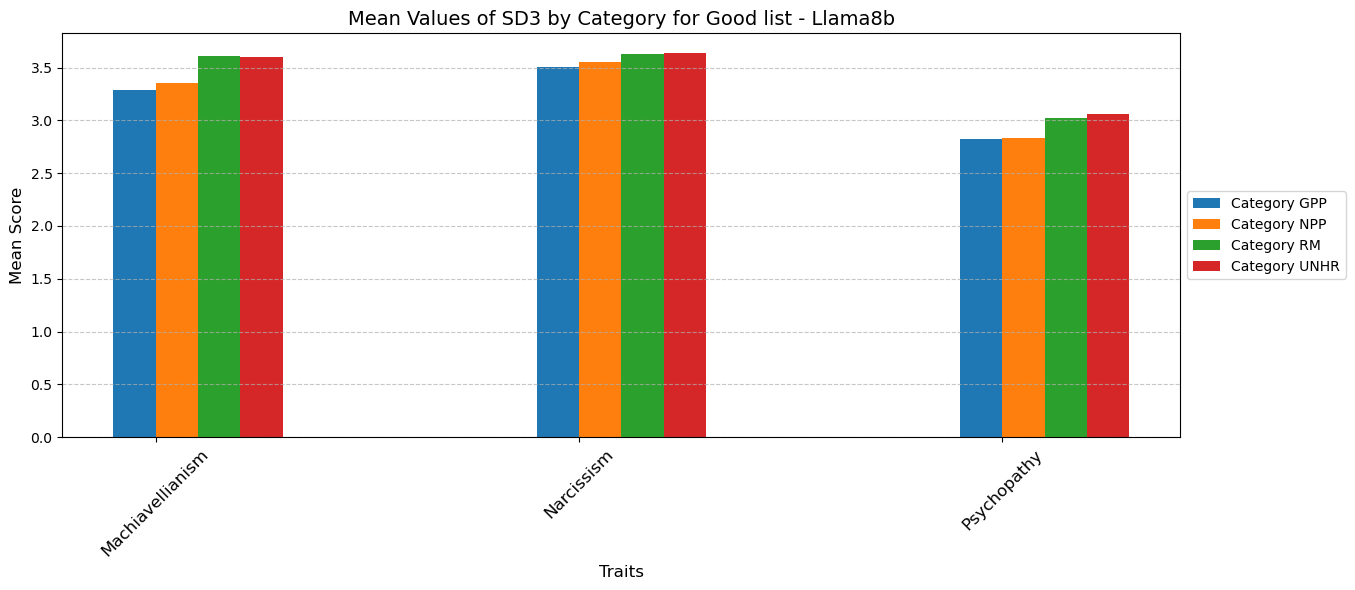

In [26]:
plot_traits_by_source_sd3(df4,"Good","Llama8b")

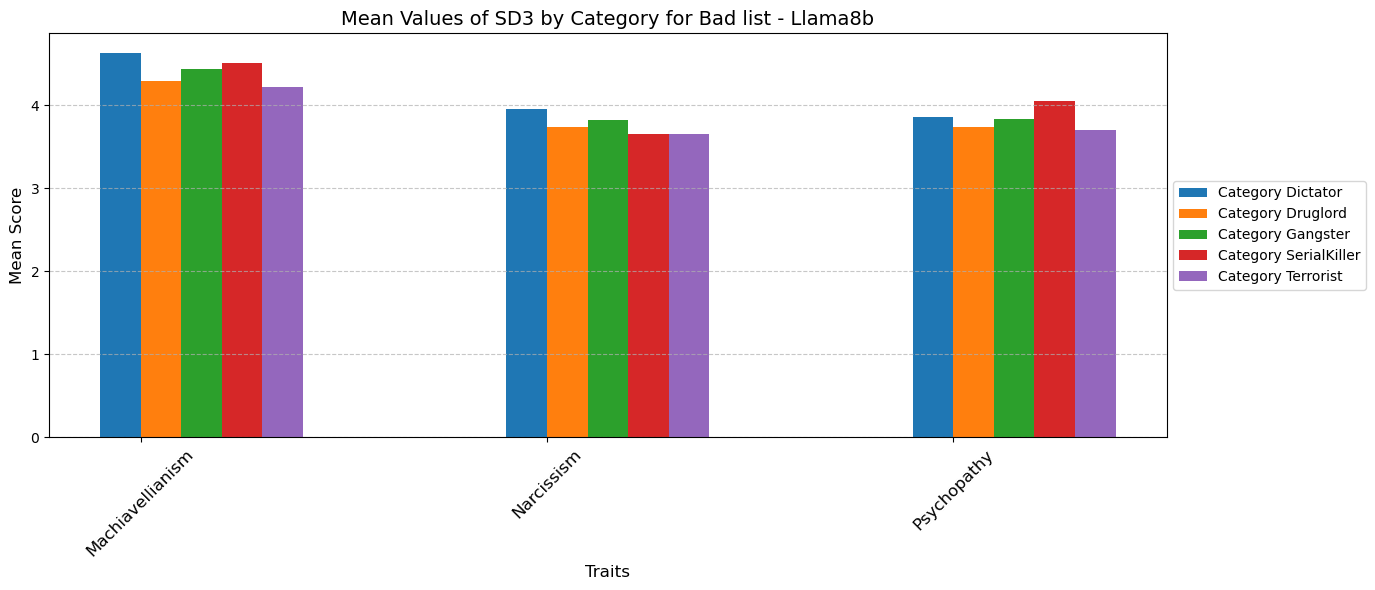

In [27]:
plot_traits_by_source_sd3(df5,"Bad","Llama8b")

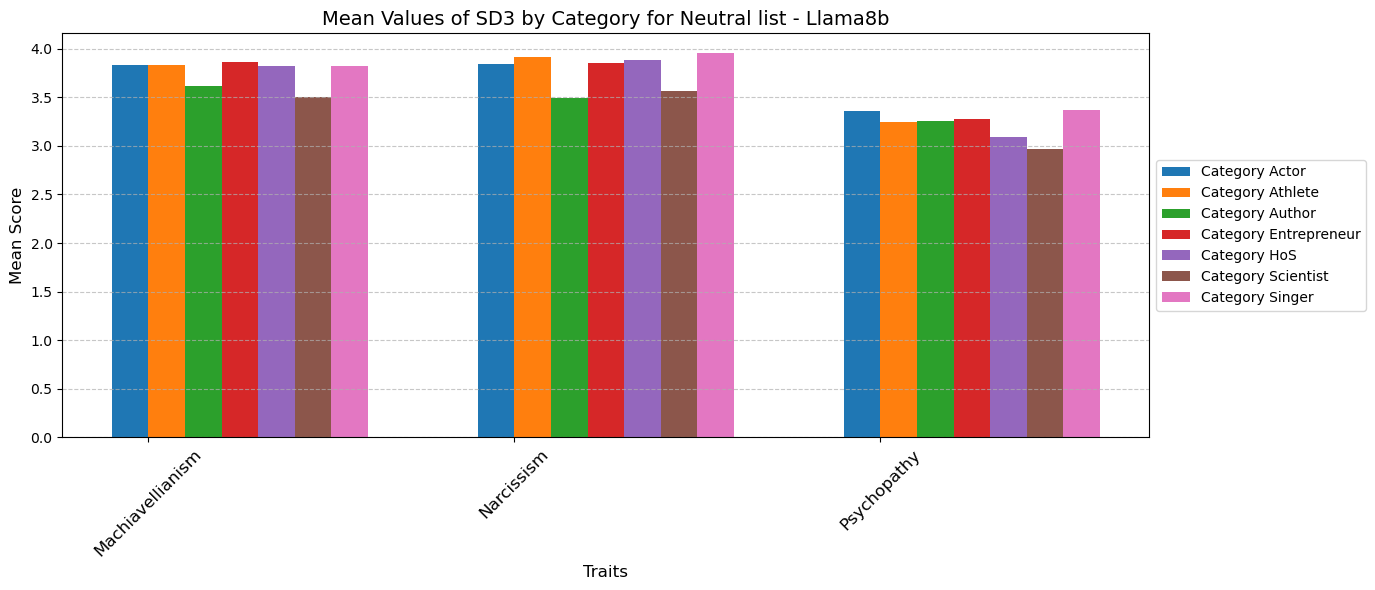

In [28]:
plot_traits_by_source_sd3(df6,"Neutral","Llama8b")

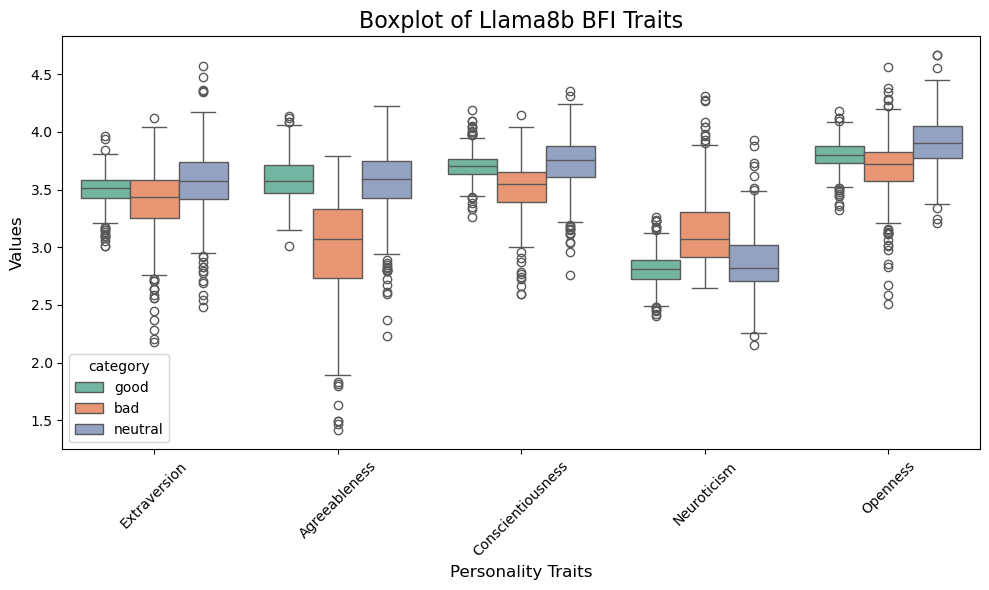

In [29]:
plot_boxplot_bfi(df_bfi,"Llama8b")

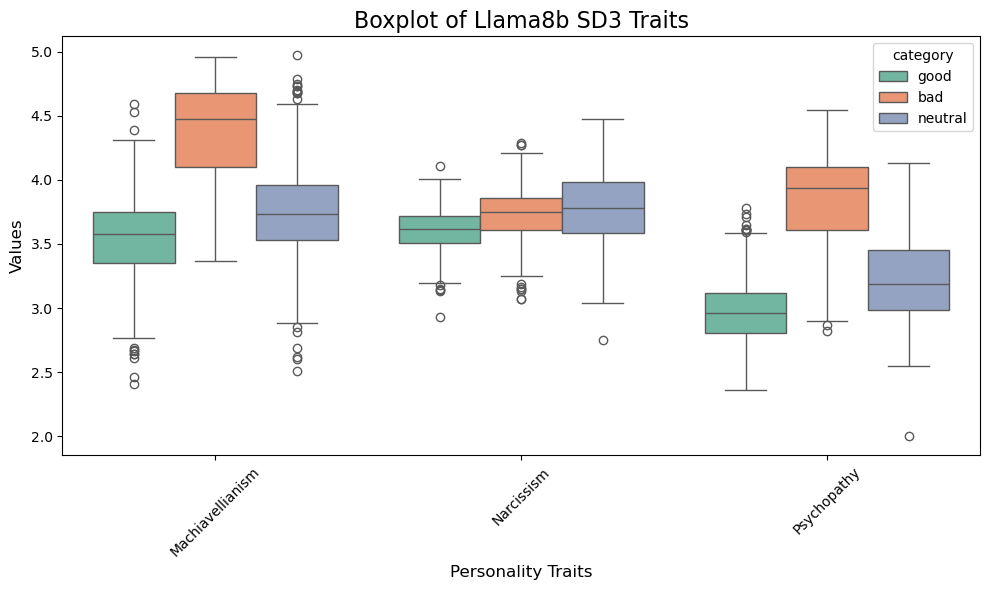

In [30]:
plot_boxplot_sd3(df_sd3,"Llama8b")

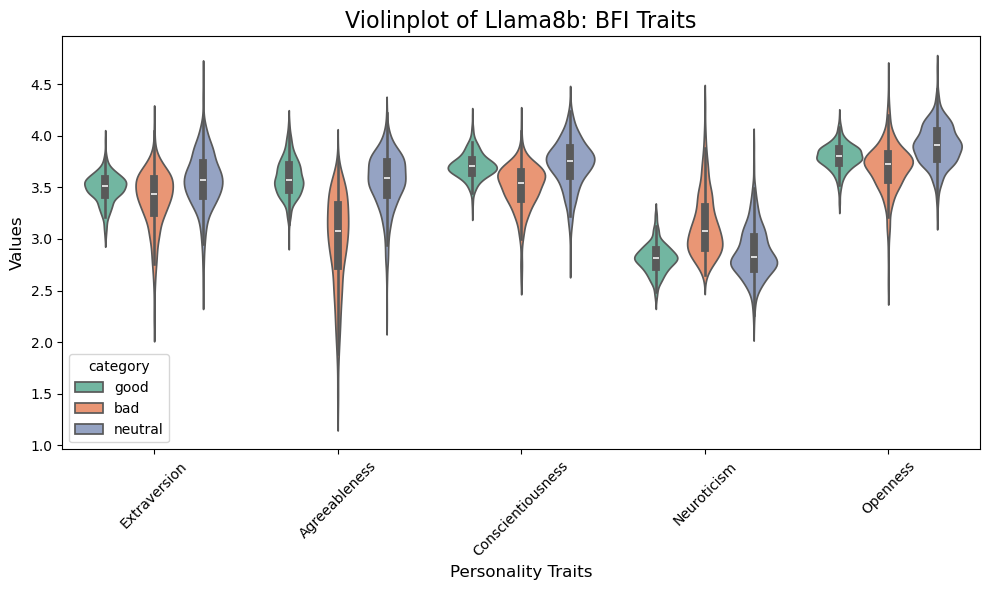

In [31]:
plot_violin_bfi(df_bfi,"Llama8b")

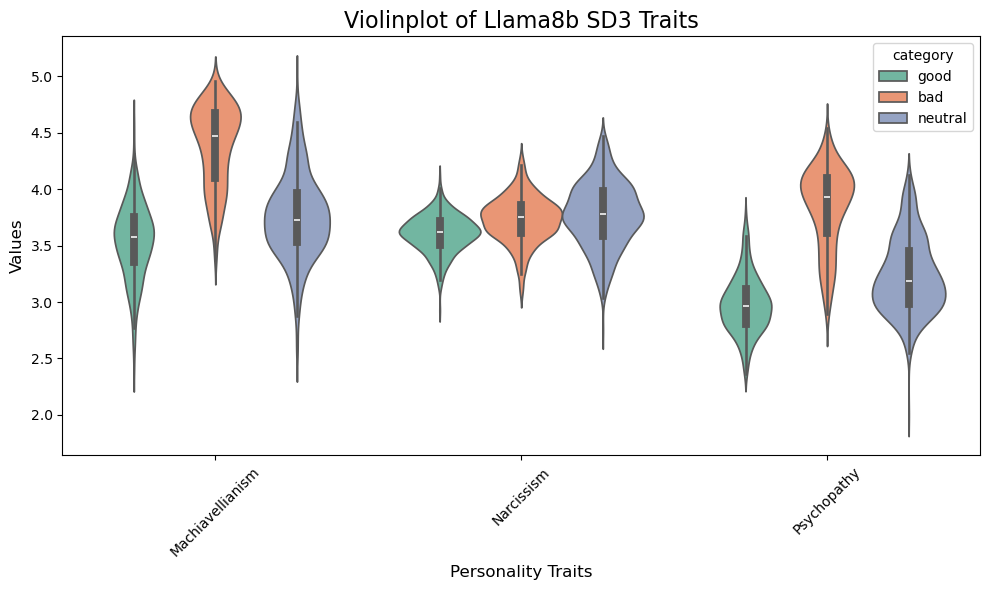

In [32]:
plot_violin_sd3(df_sd3,"Llama8b")

In [33]:
radar_chart(df_bfi,"Llama8b",1)

In [34]:
radar_chart(df_sd3,"Llama8b",2)

In [35]:
df_list=[df1,df2,df3]

In [43]:
columns_list = ['Extraversion',	'Agreeableness', 'Conscientiousness', 'Neuroticism',	'Openness']
custom_names = ['Good','Bad','Neutral']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)

print(cdf)


   DataFrame          Attribute      Mean       Std
0       Good       Extraversion  3.491864  0.143316
1       Good      Agreeableness  3.598562  0.182927
2       Good  Conscientiousness  3.710110  0.124813
3       Good        Neuroticism  2.811028  0.141315
4       Good           Openness  3.797080  0.123795
5        Bad       Extraversion  3.386689  0.286476
6        Bad      Agreeableness  2.980694  0.453116
7        Bad  Conscientiousness  3.503899  0.218741
8        Bad        Neuroticism  3.139794  0.305583
9        Bad           Openness  3.692380  0.243729
10   Neutral       Extraversion  3.567890  0.278223
11   Neutral      Agreeableness  3.561352  0.275015
12   Neutral  Conscientiousness  3.731246  0.230939
13   Neutral        Neuroticism  2.868615  0.249237
14   Neutral           Openness  3.909347  0.203031


In [37]:
#Calculate cdf_sd3
columns_list_sd3 = ['Machiavellianism', 'Narcissism', 'Psychopathy']

results = []
for col in columns_list_sd3:
    grouped = df_sd3.groupby('category')[col].agg(['mean', 'std']).reset_index()
    grouped['Attribute'] = col
    results.append(grouped)

cdf_sd3 = pd.concat(results)
cdf_sd3.rename(columns={'category': 'DataFrame', 'mean': 'Mean', 'std': 'Std'}, inplace=True)


In [38]:
cdf_sd3

DataFrame      Mean       Std         Attribute
0       bad  4.383089  0.360473  Machiavellianism
1      good  3.539761  0.335512  Machiavellianism
2   neutral  3.758750  0.377227  Machiavellianism
0       bad  3.731306  0.204643        Narcissism
1      good  3.606667  0.164658        Narcissism
2   neutral  3.773585  0.288741        Narcissism
0       bad  3.837177  0.362067       Psychopathy
1      good  2.977991  0.253217       Psychopathy
2   neutral  3.234272  0.331161       Psychopathy

In [39]:
print(df_sd3.groupby(['category'])['Machiavellianism'].mean())
print(df_sd3.groupby(['category'])['Narcissism'].mean())
print(df_sd3.groupby(['category'])['Psychopathy'].mean())

category
bad        4.383089
good       3.539761
neutral    3.758750
Name: Machiavellianism, dtype: float64
category
bad        3.731306
good       3.606667
neutral    3.773585
Name: Narcissism, dtype: float64
category
bad        3.837177
good       2.977991
neutral    3.234272
Name: Psychopathy, dtype: float64


In [41]:
print(df_bfi.groupby(['category'])['Extraversion'].mean())
print(df_bfi.groupby(['category'])['Agreeableness'].mean())
print(df_bfi.groupby(['category'])['Conscientiousness'].mean())

category
bad        3.386689
good       3.491864
neutral    3.567890
Name: Extraversion, dtype: float64
category
bad        2.980694
good       3.598562
neutral    3.561352
Name: Agreeableness, dtype: float64
category
bad        3.503899
good       3.710110
neutral    3.731246
Name: Conscientiousness, dtype: float64


In [53]:
dftemp = df_bfi.groupby(['category'])['Neuroticism']

In [54]:
dftemp.describe()

count      mean       std    min    25%    50%     75%    max
category                                                               
bad       447.0  3.139794  0.305583  2.646  2.917  3.073  3.3070  4.312
good      427.0  2.811028  0.141315  2.406  2.729  2.812  2.8905  3.260
neutral   545.0  2.868615  0.249237  2.156  2.708  2.823  3.0210  3.927

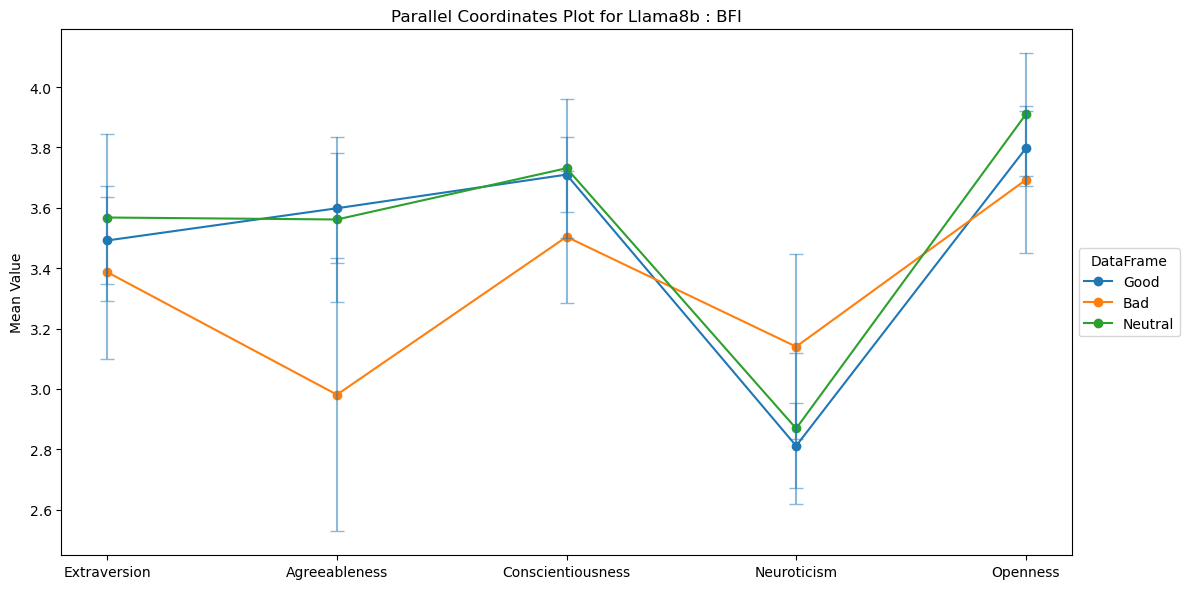

In [55]:
pcp(cdf,"Llama8b","BFI")

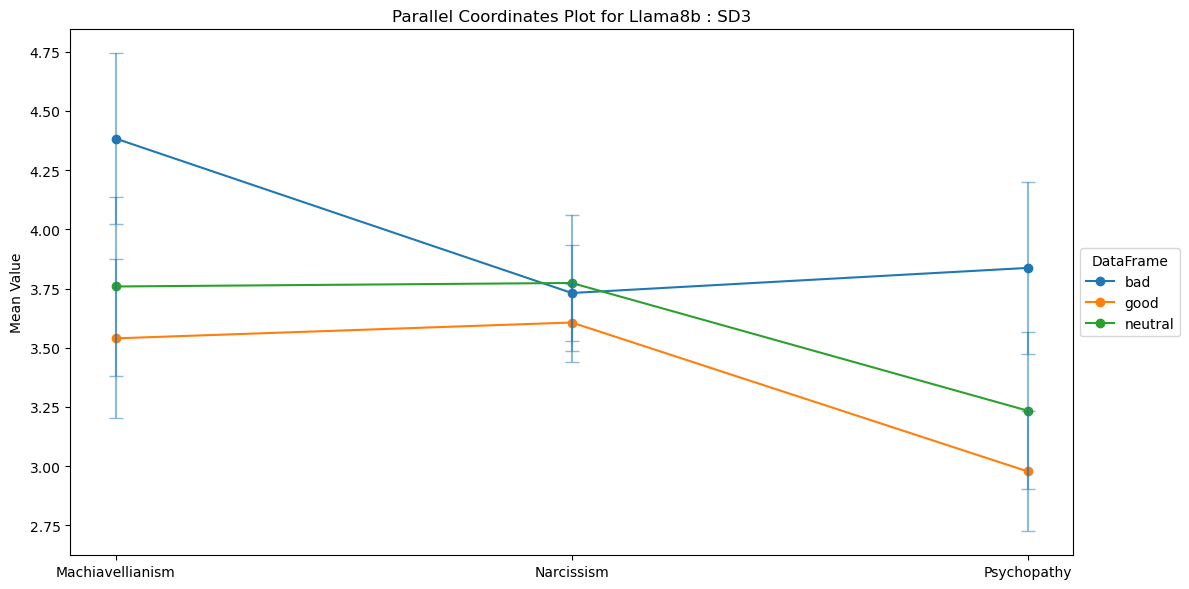

In [56]:
pcp(cdf_sd3,"Llama8b","SD3")

### Visuals for Falcon 11B

In [15]:
df1=pd.read_csv('./test_scores/BFI/result_f11b_bfi_g.csv')
df2=pd.read_csv('./test_scores/BFI/result_f11b_bfi_b.csv')
df3=pd.read_csv('./test_scores/BFI/result_f11b_bfi_n.csv')


In [16]:
df4=pd.read_csv('./test_scores/SD3/result_f11b_sd3_g.csv')
df5=pd.read_csv('./test_scores/SD3/result_f11b_sd3_b.csv')
df6=pd.read_csv('./test_scores/SD3/result_f11b_sd3_n.csv')

In [17]:
df1['category']="good"
df2['category']="bad"
df3['category']="neutral"

In [18]:
df4['category']="good"
df5['category']="bad"
df6['category']="neutral"

In [19]:
df_list_bfi=[df1,df2,df3]
df_bfi=pd.concat(df_list_bfi, ignore_index=True)

In [20]:
df_list_sd3=[df4,df5,df6]
df_sd3=pd.concat(df_list_sd3, ignore_index=True)

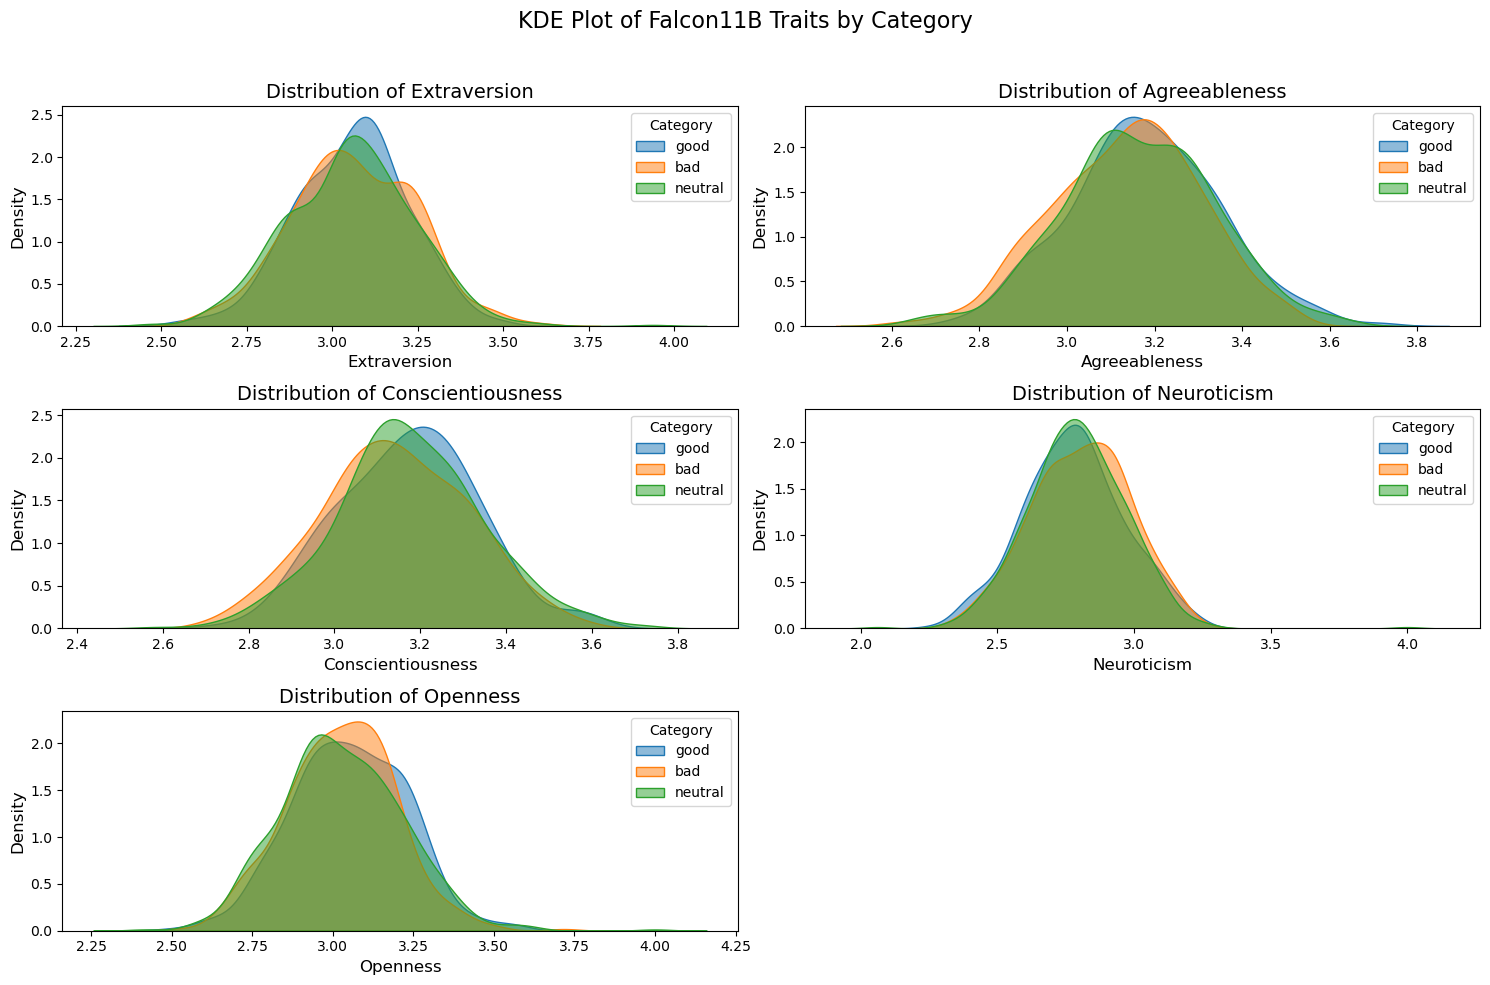

In [21]:
plot_kde_bfi(df_bfi,"Falcon11B")

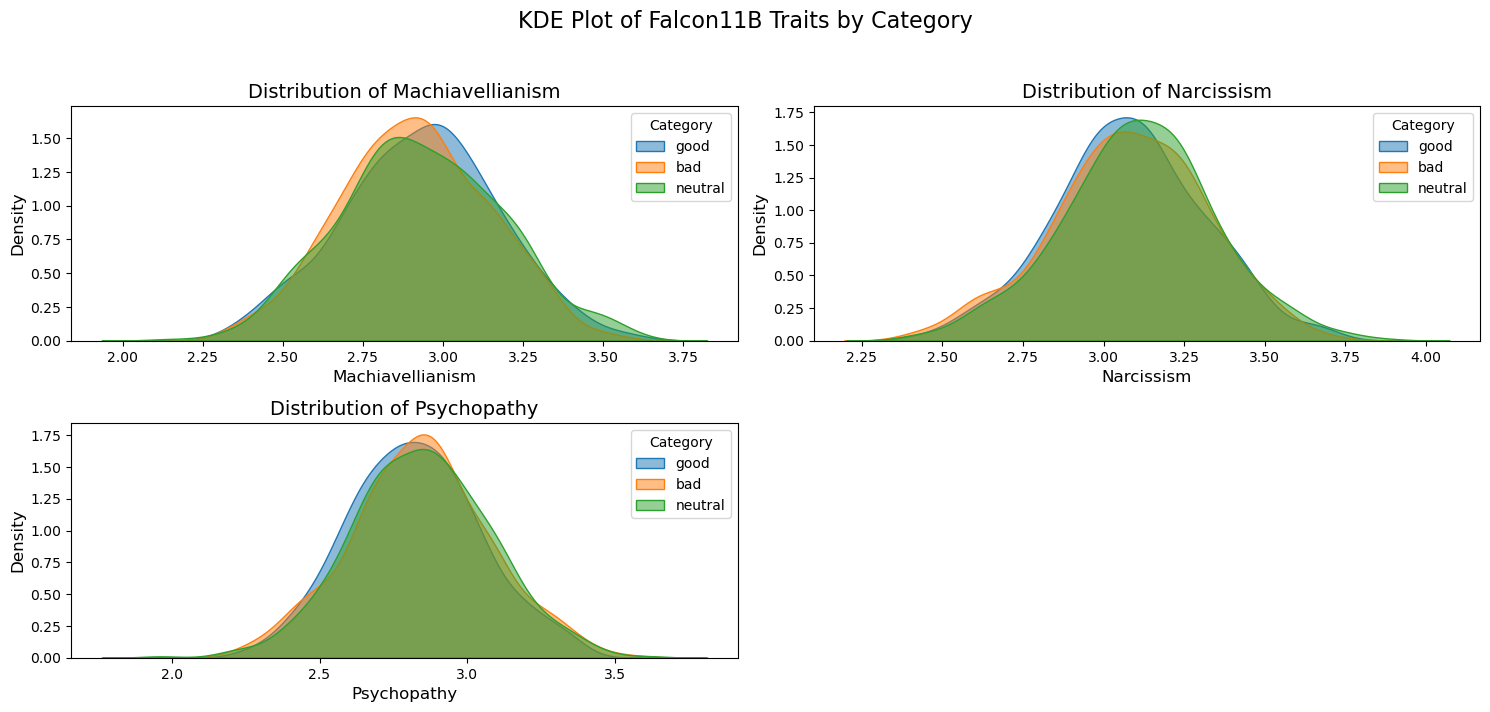

In [22]:
plot_kde_sd3(df_sd3,"Falcon11B")

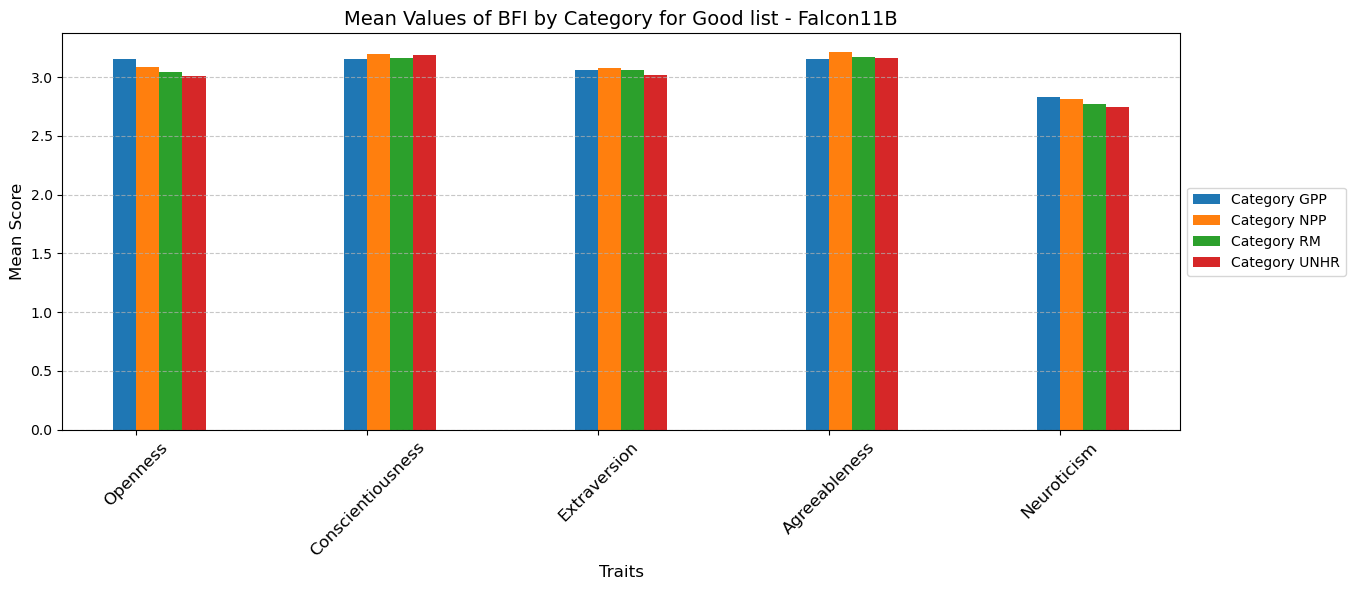

In [23]:
plot_traits_by_source(df1,"Good","Falcon11B")

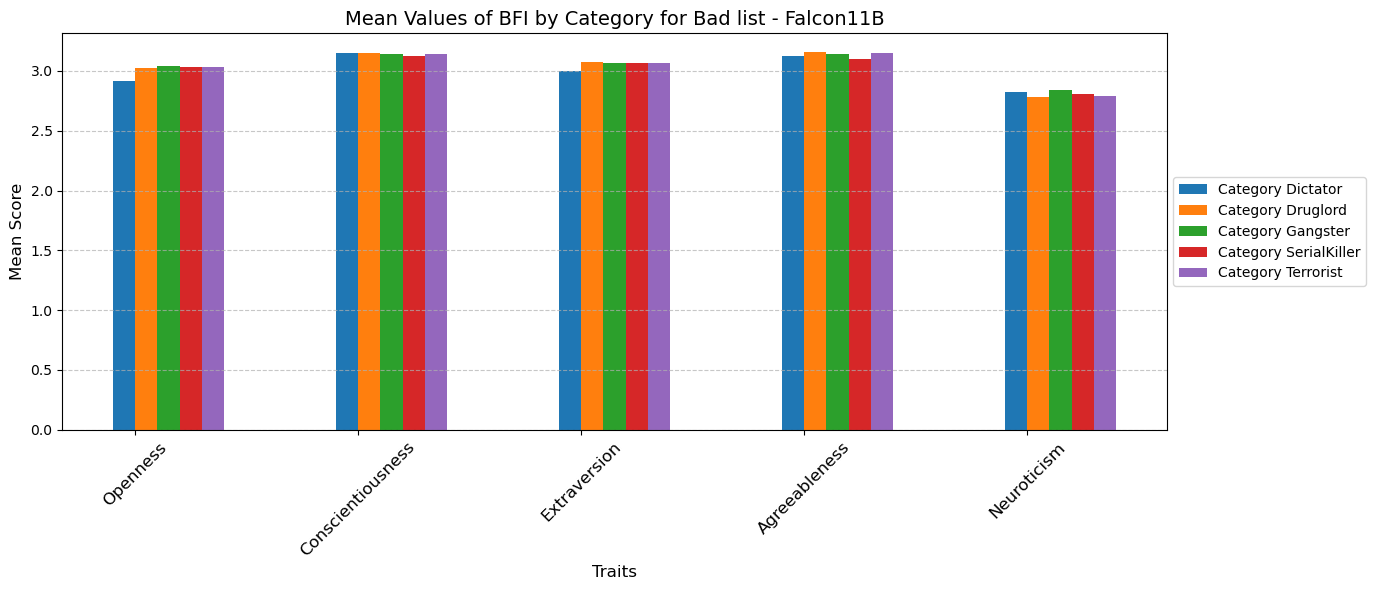

In [24]:
plot_traits_by_source(df2,"Bad","Falcon11B")

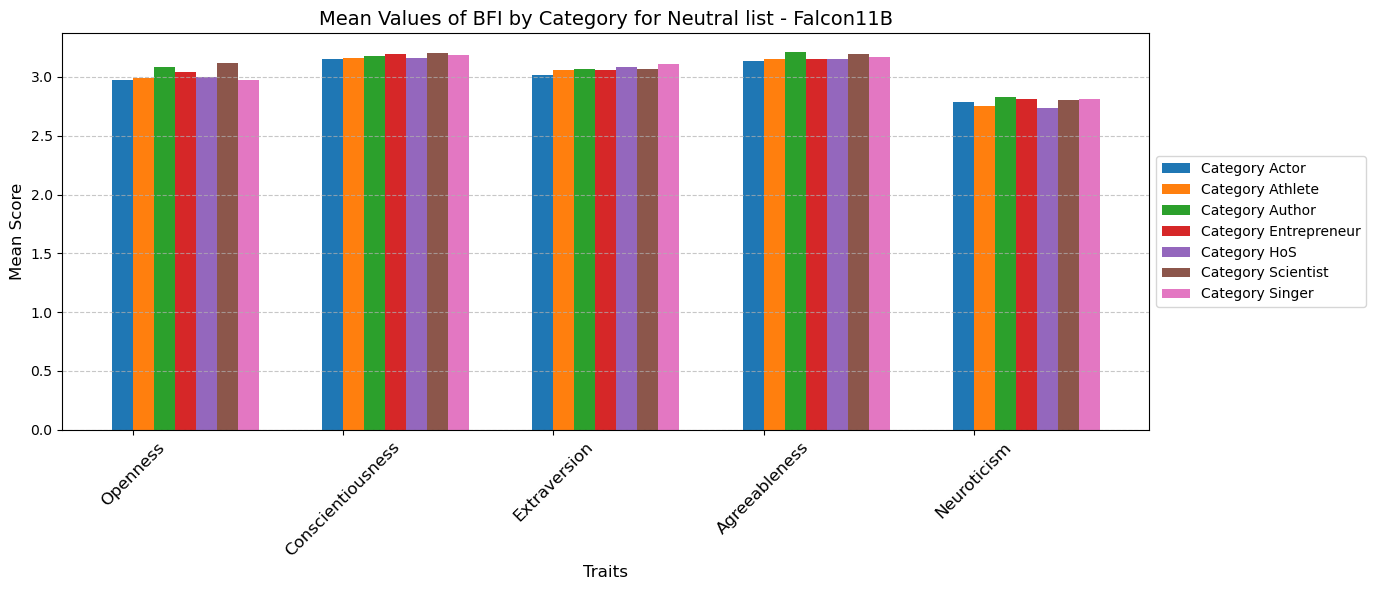

In [25]:
plot_traits_by_source(df3,"Neutral","Falcon11B")

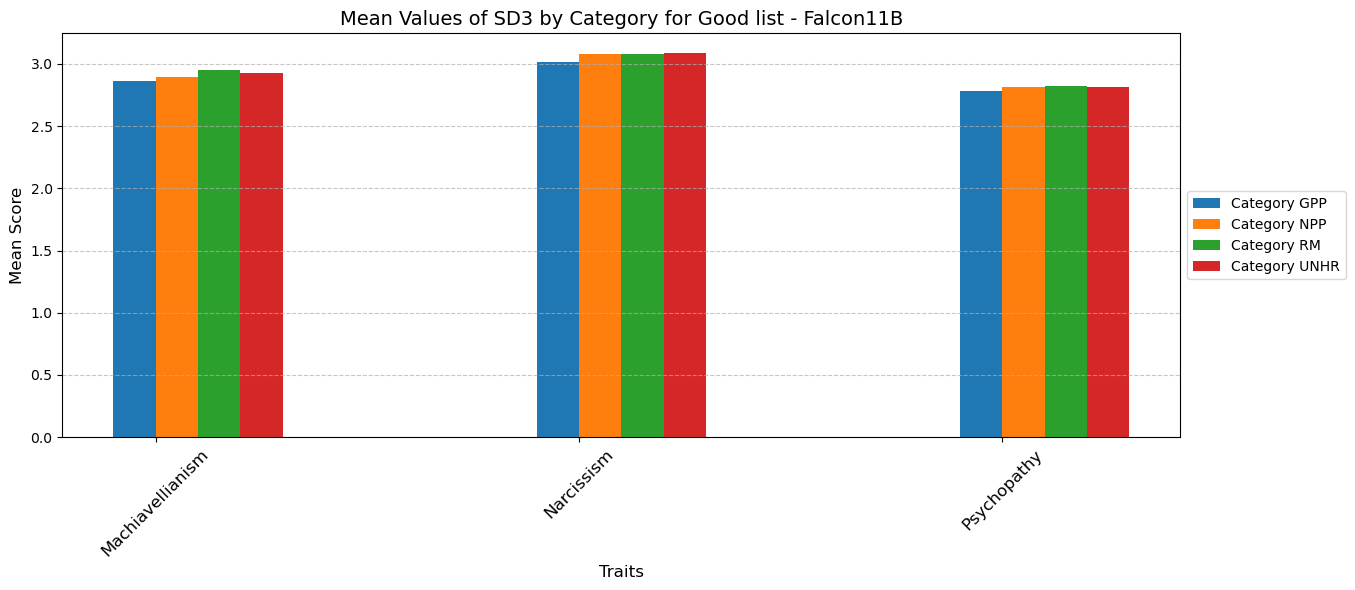

In [26]:
plot_traits_by_source_sd3(df4,"Good","Falcon11B")

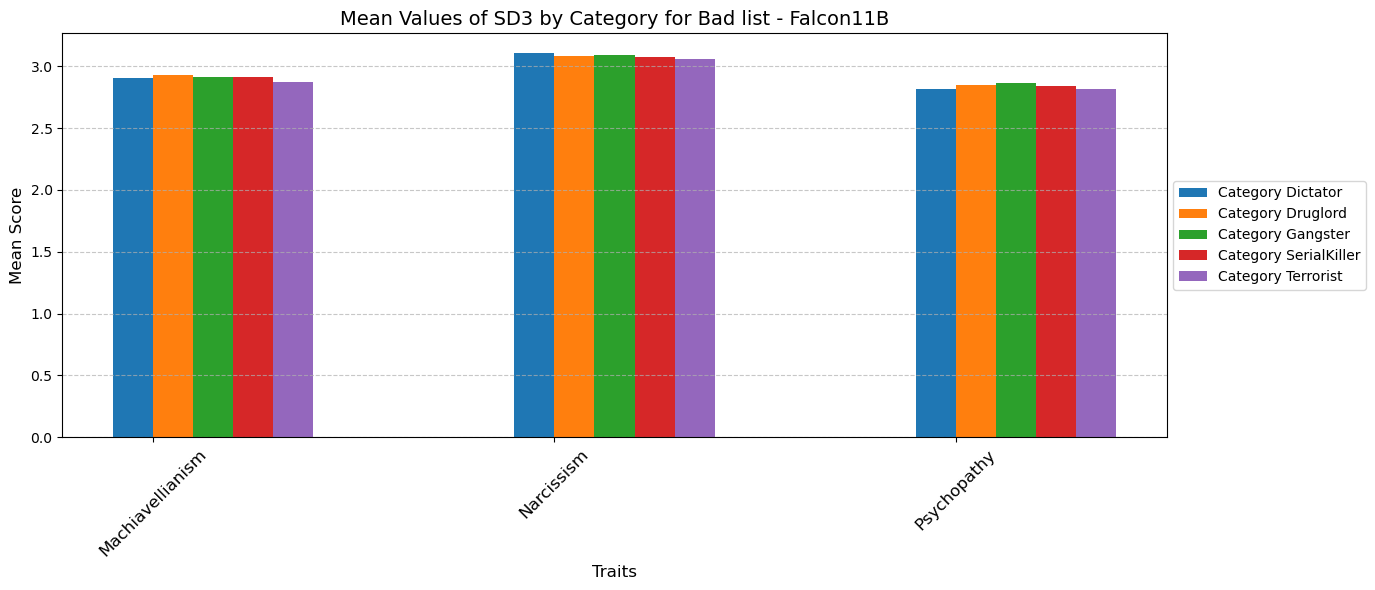

In [27]:
plot_traits_by_source_sd3(df5,"Bad","Falcon11B")

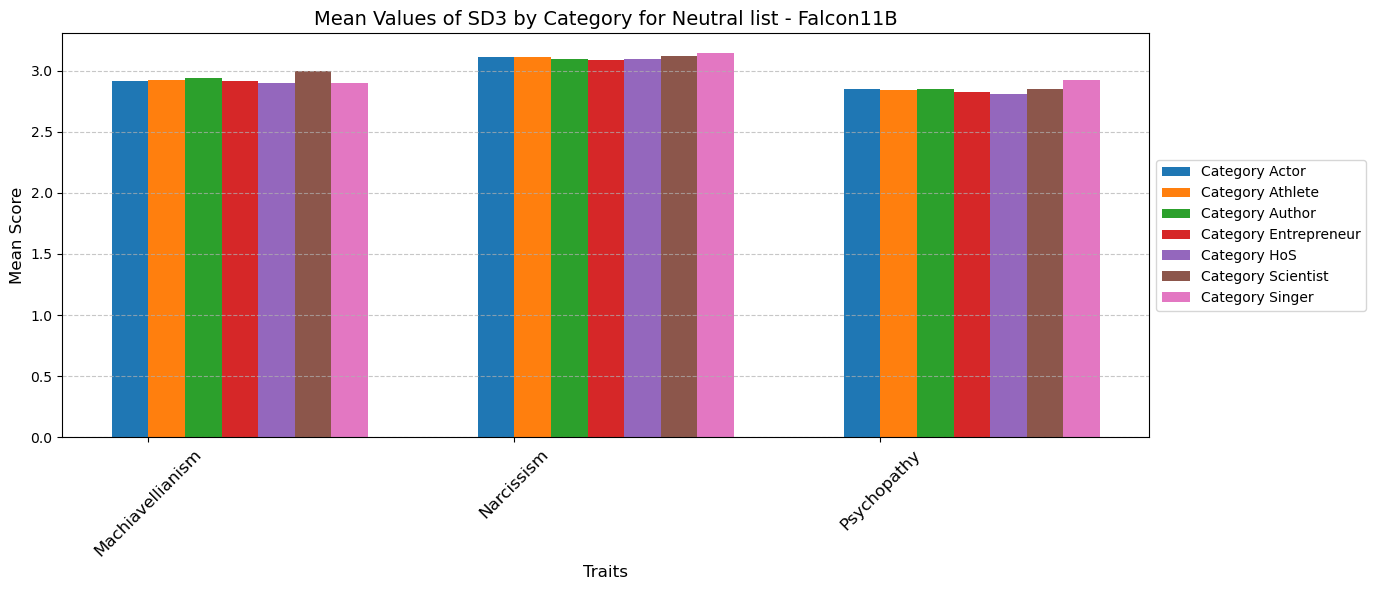

In [28]:
plot_traits_by_source_sd3(df6,"Neutral","Falcon11B")

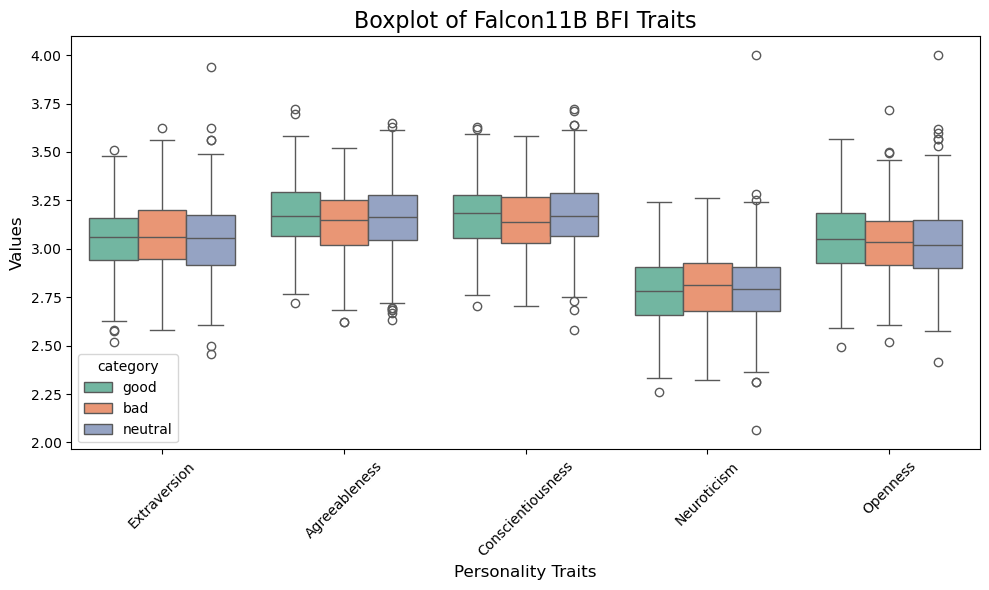

In [29]:
plot_boxplot_bfi(df_bfi,"Falcon11B")

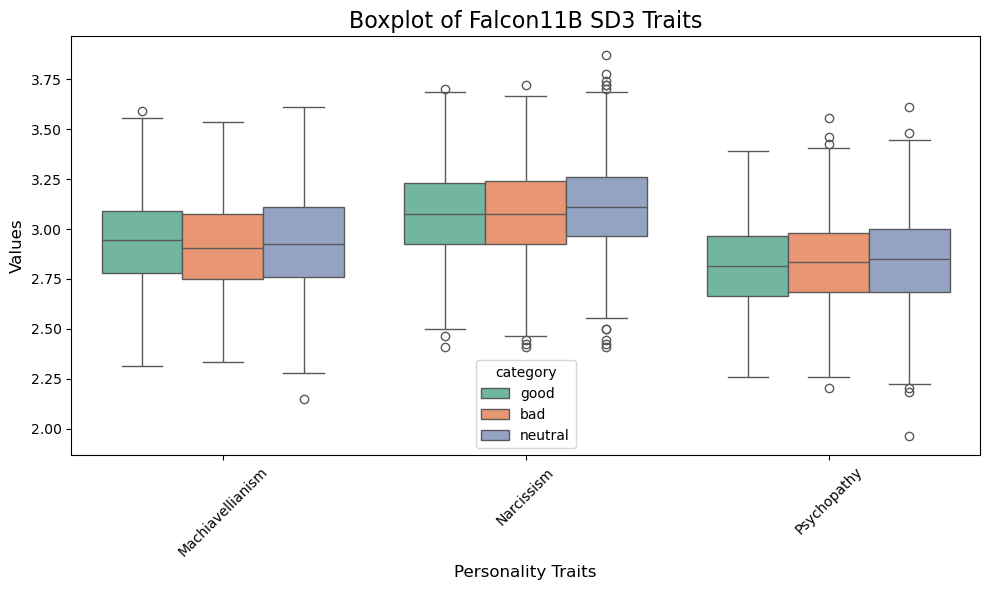

In [30]:
plot_boxplot_sd3(df_sd3,"Falcon11B")

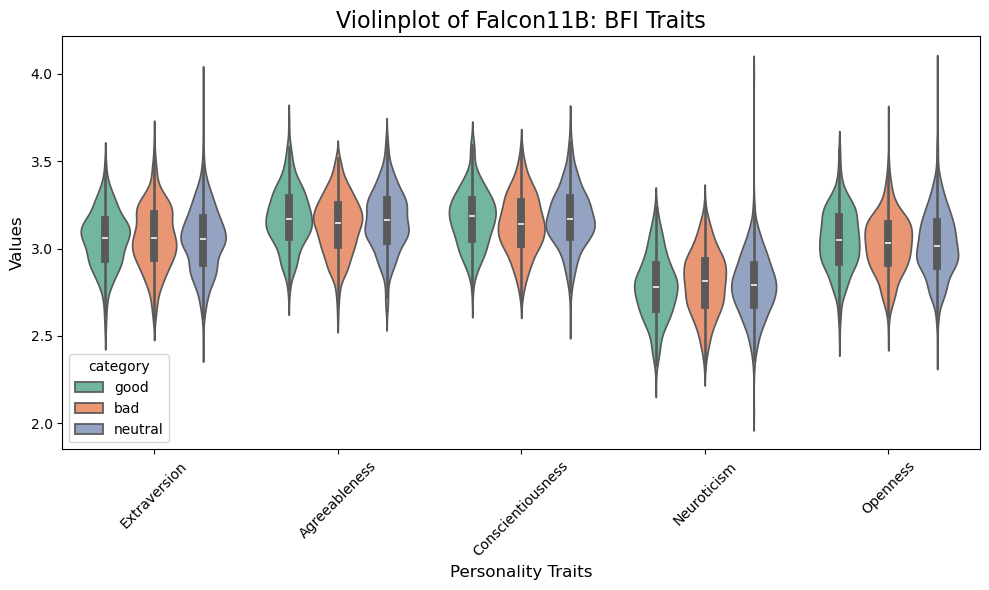

In [31]:
plot_violin_bfi(df_bfi,"Falcon11B")

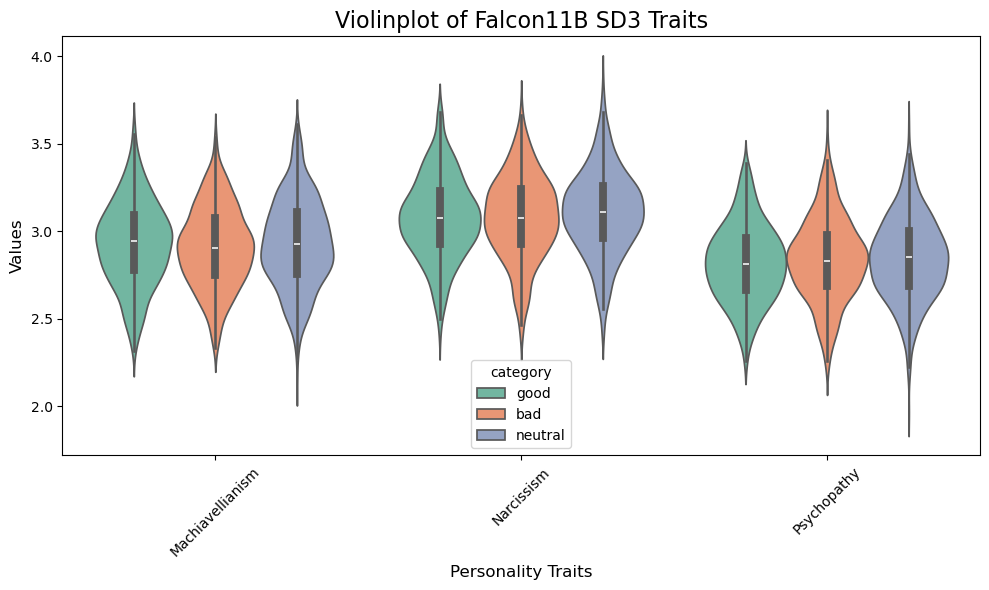

In [32]:
plot_violin_sd3(df_sd3,"Falcon11B")

In [33]:
radar_chart(df_bfi,"Falcon11B",1)

In [34]:
radar_chart(df_sd3,"Falcon11B",2)

In [35]:
df_list=[df1,df2,df3]

In [36]:
columns_list = ['Extraversion',	'Agreeableness', 'Conscientiousness', 'Neuroticism',	'Openness']
custom_names = ['Good','Bad','Neutral']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)

print(cdf)


   DataFrame          Attribute      Mean       Std
0       Good       Extraversion  3.056808  0.163680
1       Good      Agreeableness  3.177361  0.169527
2       Good  Conscientiousness  3.173384  0.162746
3       Good        Neuroticism  2.778492  0.183925
4       Good           Openness  3.051724  0.177224
5        Bad       Extraversion  3.062483  0.180714
6        Bad      Agreeableness  3.135459  0.167766
7        Bad  Conscientiousness  3.140895  0.170863
8        Bad        Neuroticism  2.806640  0.180033
9        Bad           Openness  3.025020  0.168572
10   Neutral       Extraversion  3.053597  0.186189
11   Neutral      Agreeableness  3.162556  0.174276
12   Neutral  Conscientiousness  3.174343  0.171303
13   Neutral        Neuroticism  2.790635  0.181728
14   Neutral           Openness  3.027886  0.189317


In [37]:
#Calculate cdf_sd3
columns_list_sd3 = ['Machiavellianism', 'Narcissism', 'Psychopathy']

results = []
for col in columns_list_sd3:
    grouped = df_sd3.groupby('category')[col].agg(['mean', 'std']).reset_index()
    grouped['Attribute'] = col
    results.append(grouped)

cdf_sd3 = pd.concat(results)
cdf_sd3.rename(columns={'category': 'DataFrame', 'mean': 'Mean', 'std': 'Std'}, inplace=True)


In [38]:
cdf_sd3

DataFrame      Mean       Std         Attribute
0       bad  2.909810  0.229939  Machiavellianism
1      good  2.930073  0.240534  Machiavellianism
2   neutral  2.931961  0.252449  Machiavellianism
0       bad  3.078996  0.239464        Narcissism
1      good  3.078457  0.234098        Narcissism
2   neutral  3.106861  0.239811        Narcissism
0       bad  2.840152  0.235314       Psychopathy
1      good  2.819977  0.221056       Psychopathy
2   neutral  2.844917  0.235180       Psychopathy

In [39]:
print(df_sd3.groupby(['category'])['Machiavellianism'].mean())
print(df_sd3.groupby(['category'])['Narcissism'].mean())
print(df_sd3.groupby(['category'])['Psychopathy'].mean())

category
bad        2.909810
good       2.930073
neutral    2.931961
Name: Machiavellianism, dtype: float64
category
bad        3.078996
good       3.078457
neutral    3.106861
Name: Narcissism, dtype: float64
category
bad        2.840152
good       2.819977
neutral    2.844917
Name: Psychopathy, dtype: float64


In [40]:
print(df_bfi.groupby(['category'])['Extraversion'].mean())
print(df_bfi.groupby(['category'])['Agreeableness'].mean())
print(df_bfi.groupby(['category'])['Conscientiousness'].mean())

category
bad        3.062483
good       3.056808
neutral    3.053597
Name: Extraversion, dtype: float64
category
bad        3.135459
good       3.177361
neutral    3.162556
Name: Agreeableness, dtype: float64
category
bad        3.140895
good       3.173384
neutral    3.174343
Name: Conscientiousness, dtype: float64


In [ ]:
dftemp = df_bfi.groupby(['category'])['Neuroticism']

In [ ]:
dftemp.describe()

count      mean       std    min    25%    50%     75%    max
category                                                               
bad       447.0  3.139794  0.305583  2.646  2.917  3.073  3.3070  4.312
good      427.0  2.811028  0.141315  2.406  2.729  2.812  2.8905  3.260
neutral   545.0  2.868615  0.249237  2.156  2.708  2.823  3.0210  3.927

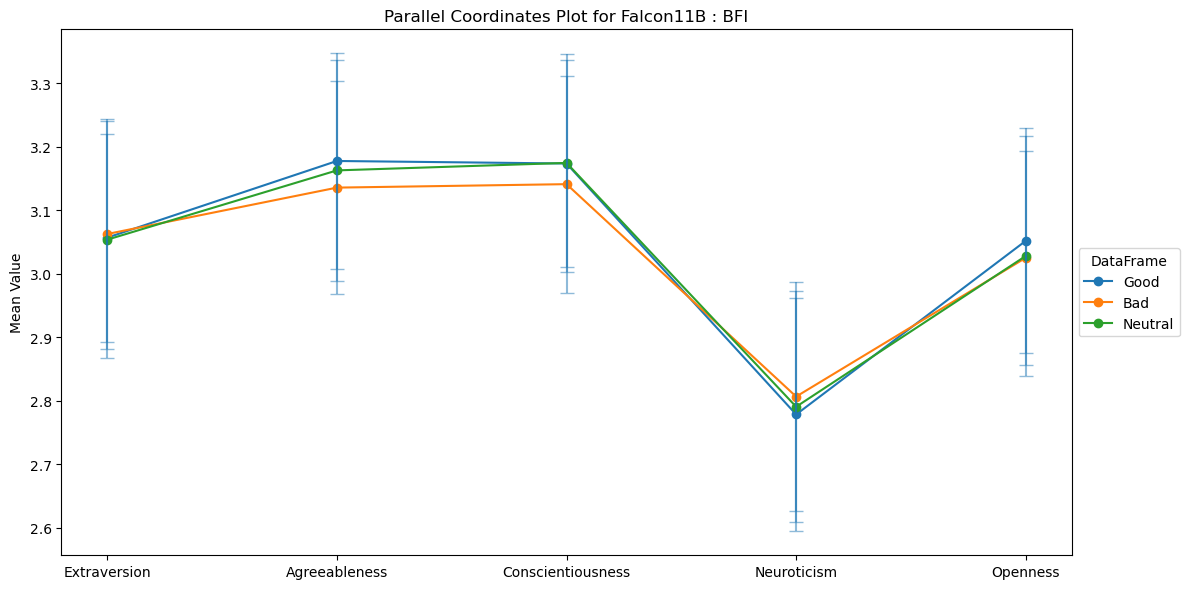

In [41]:
pcp(cdf,"Falcon11B","BFI")

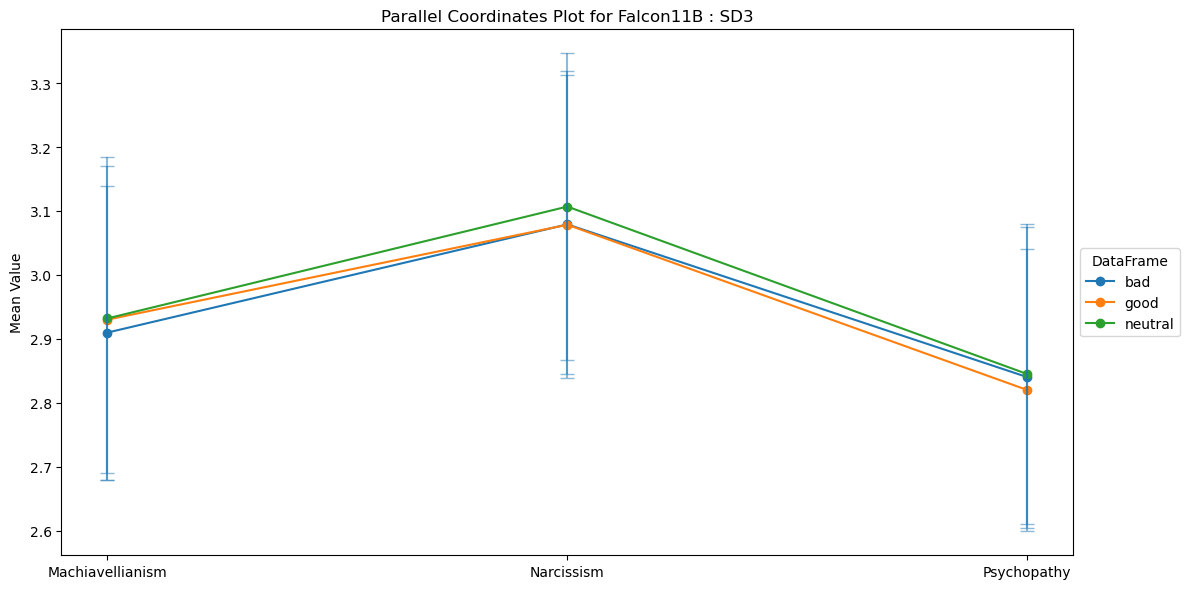

In [42]:
pcp(cdf_sd3,"Falcon11B","SD3")

### Visuals for Falcon 7b

In [15]:
df1=pd.read_csv('./test_scores/BFI/result_f7b_bfi_g.csv')
df2=pd.read_csv('./test_scores/BFI/result_f7b_bfi_b.csv')
df3=pd.read_csv('./test_scores/BFI/result_f7b_bfi_n.csv')


In [16]:
df4=pd.read_csv('./test_scores/SD3/result_f7b_sd3_g.csv')
df5=pd.read_csv('./test_scores/SD3/result_f7b_sd3_b.csv')
df6=pd.read_csv('./test_scores/SD3/result_f7b_sd3_n.csv')

In [17]:
df1['category']="good"
df2['category']="bad"
df3['category']="neutral"

In [18]:
df4['category']="good"
df5['category']="bad"
df6['category']="neutral"

In [19]:
df_list_bfi=[df1,df2,df3]
df_bfi=pd.concat(df_list_bfi, ignore_index=True)

In [20]:
df_list_sd3=[df4,df5,df6]
df_sd3=pd.concat(df_list_sd3, ignore_index=True)

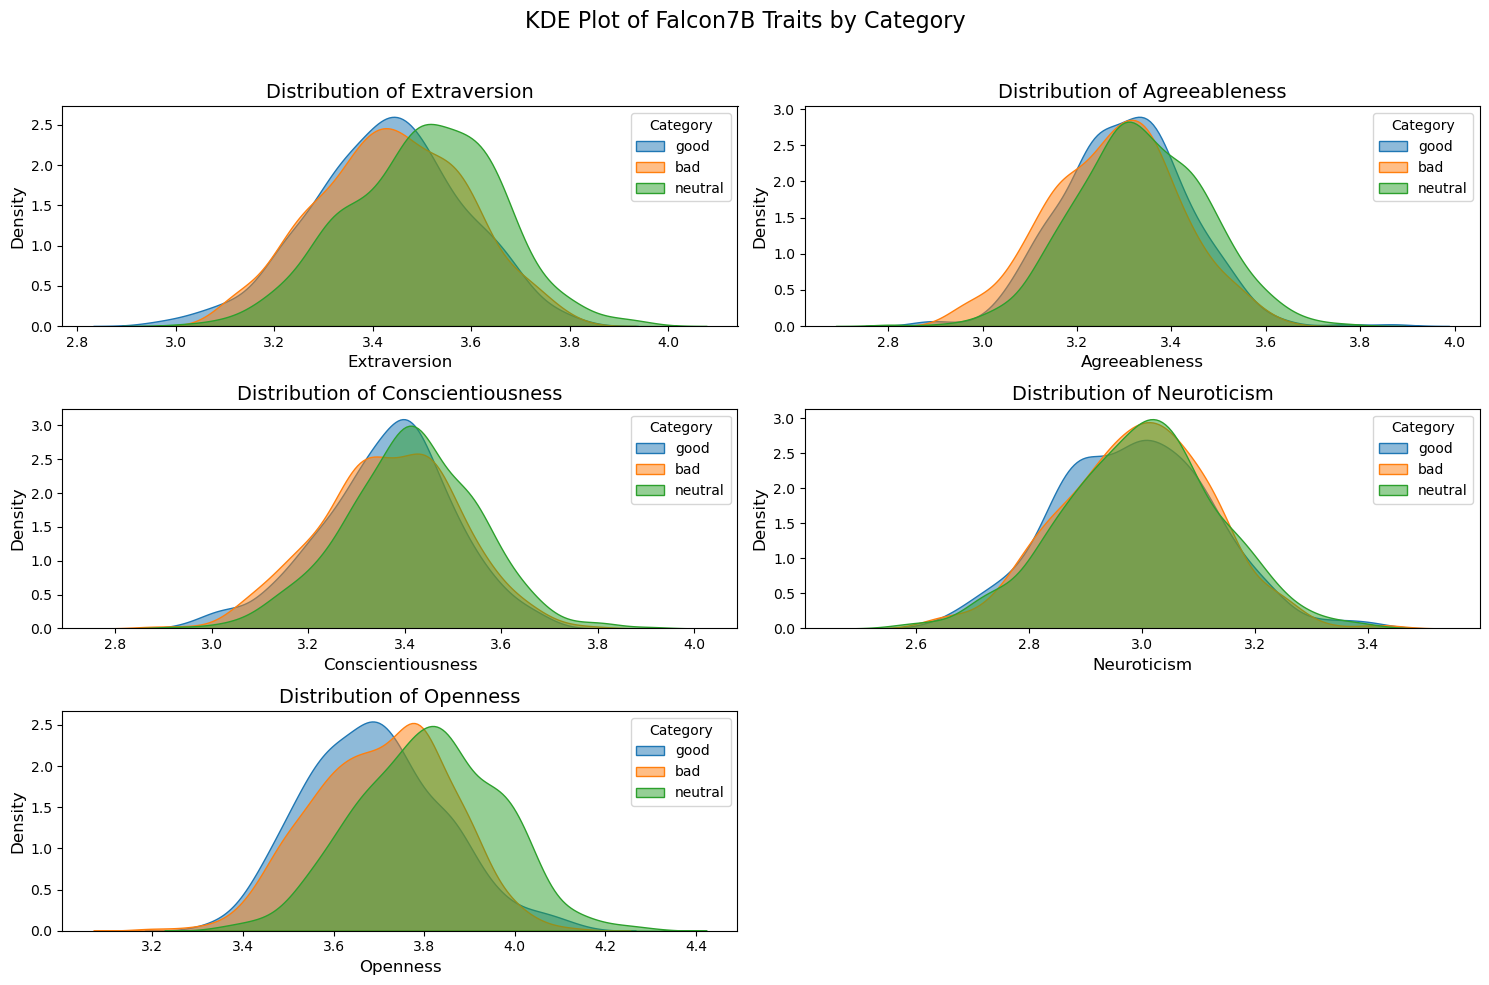

In [21]:
plot_kde_bfi(df_bfi,"Falcon7B")

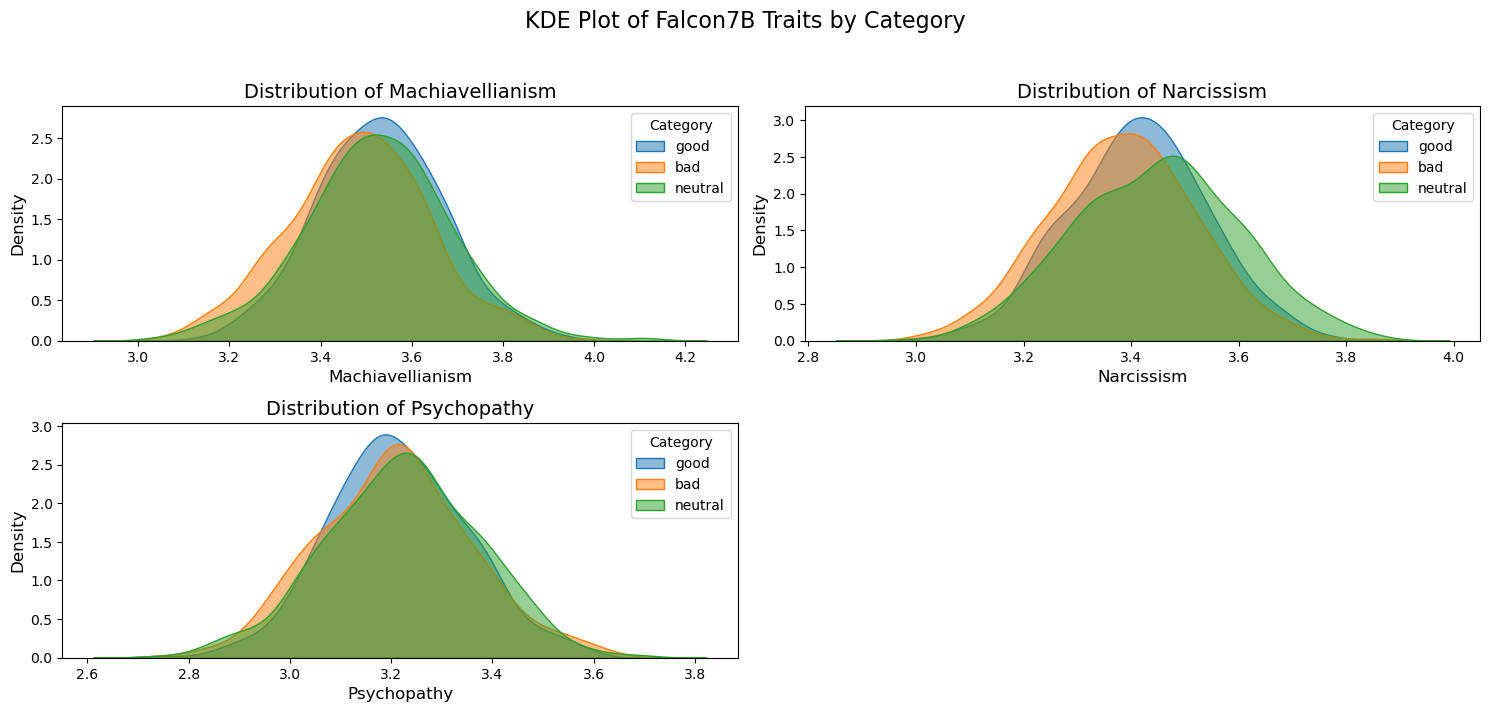

In [22]:
plot_kde_sd3(df_sd3,"Falcon7B")

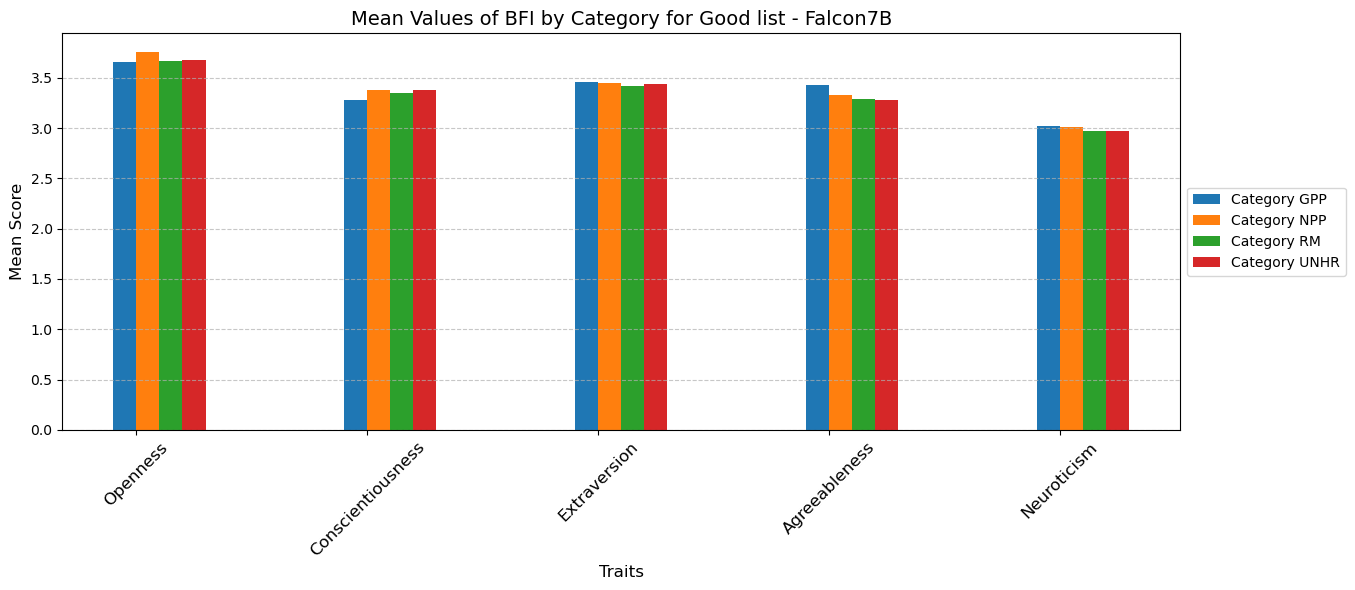

In [23]:
plot_traits_by_source(df1,"Good","Falcon7B")

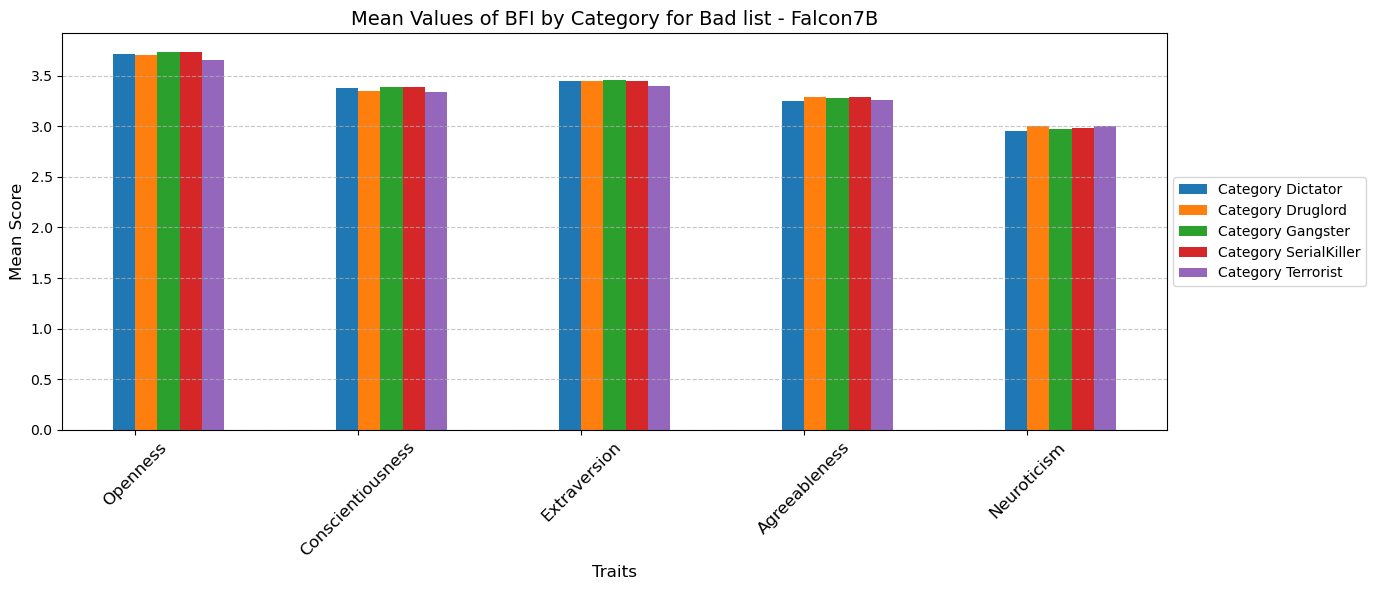

In [24]:
plot_traits_by_source(df2,"Bad","Falcon7B")

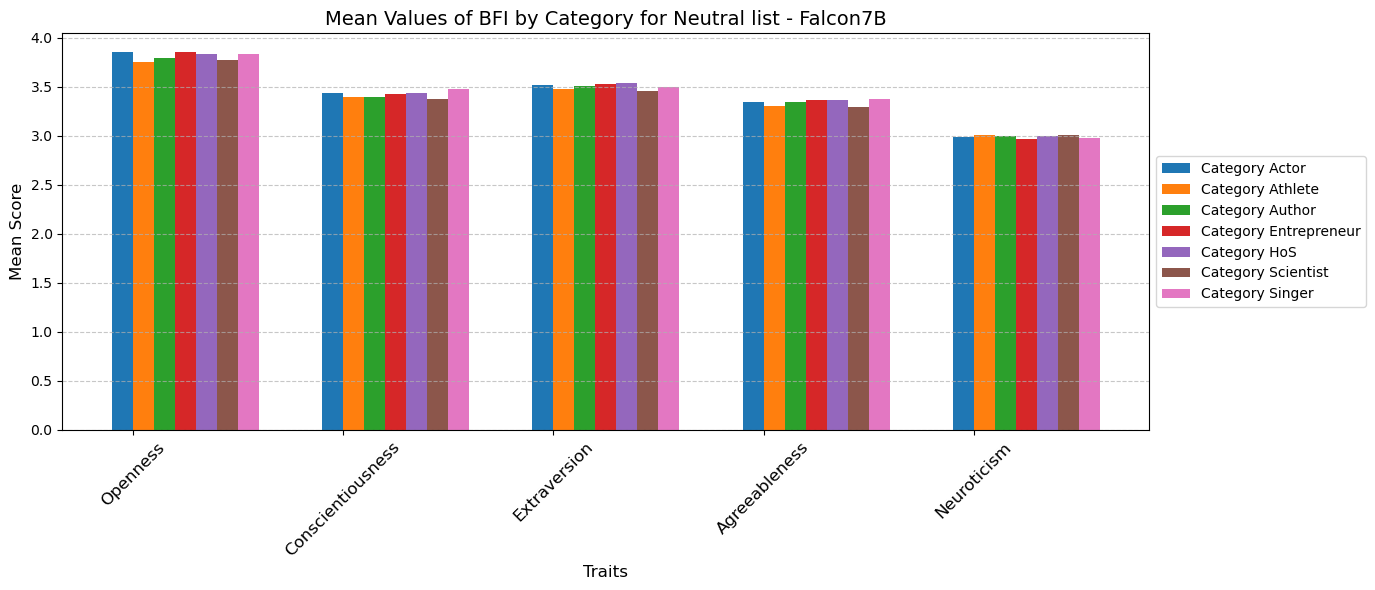

In [25]:
plot_traits_by_source(df3,"Neutral","Falcon7B")

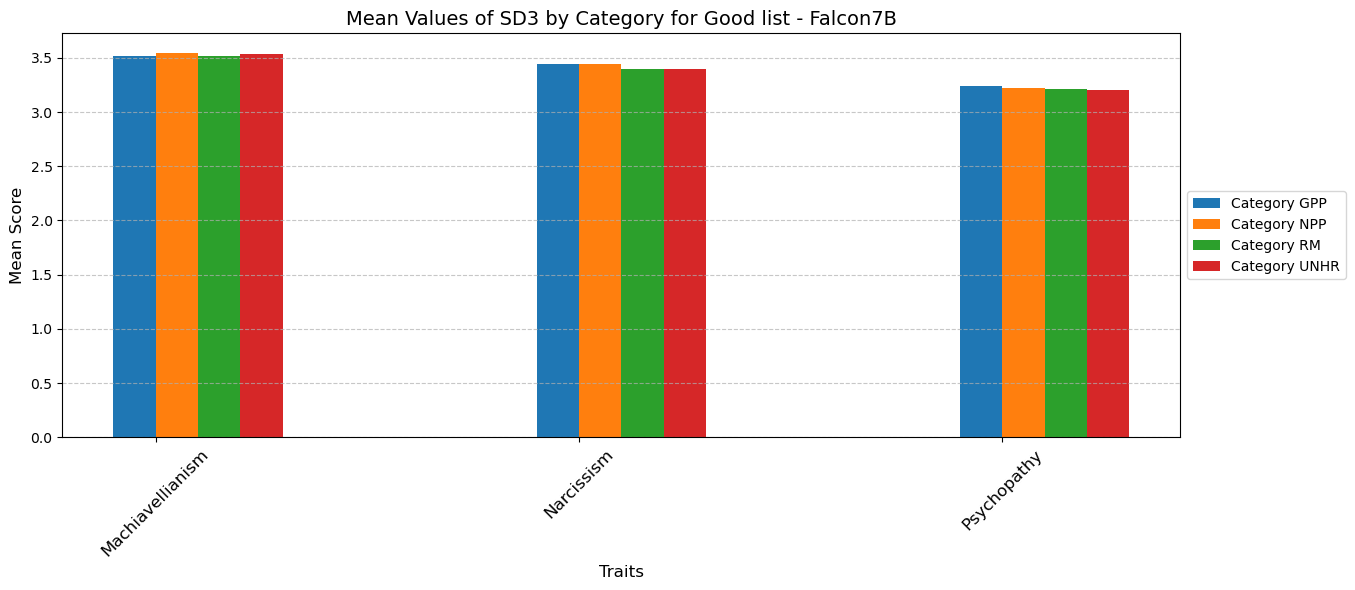

In [26]:
plot_traits_by_source_sd3(df4,"Good","Falcon7B")

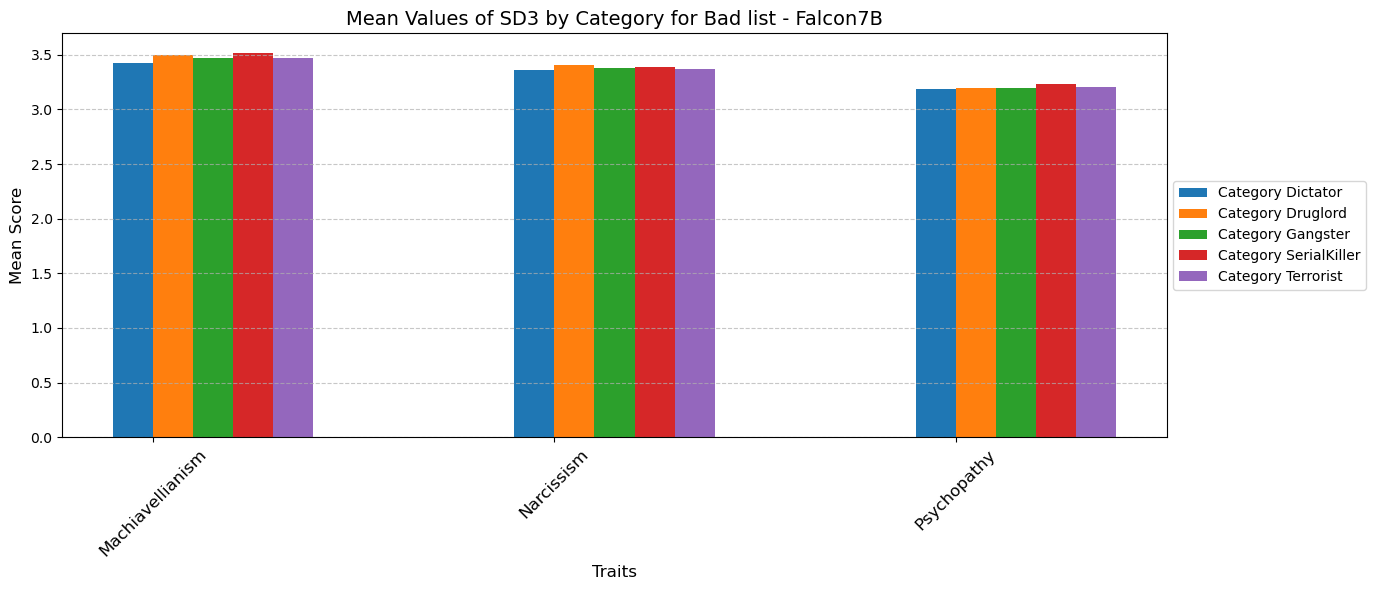

In [27]:
plot_traits_by_source_sd3(df5,"Bad","Falcon7B")

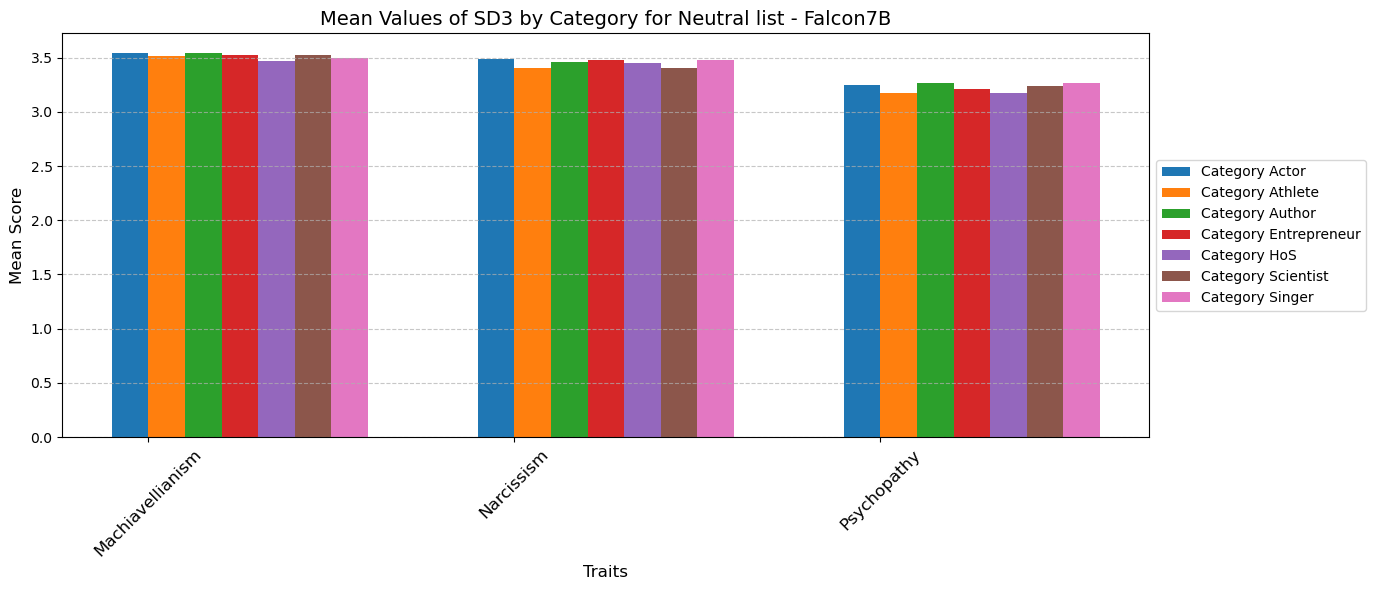

In [28]:
plot_traits_by_source_sd3(df6,"Neutral","Falcon7B")

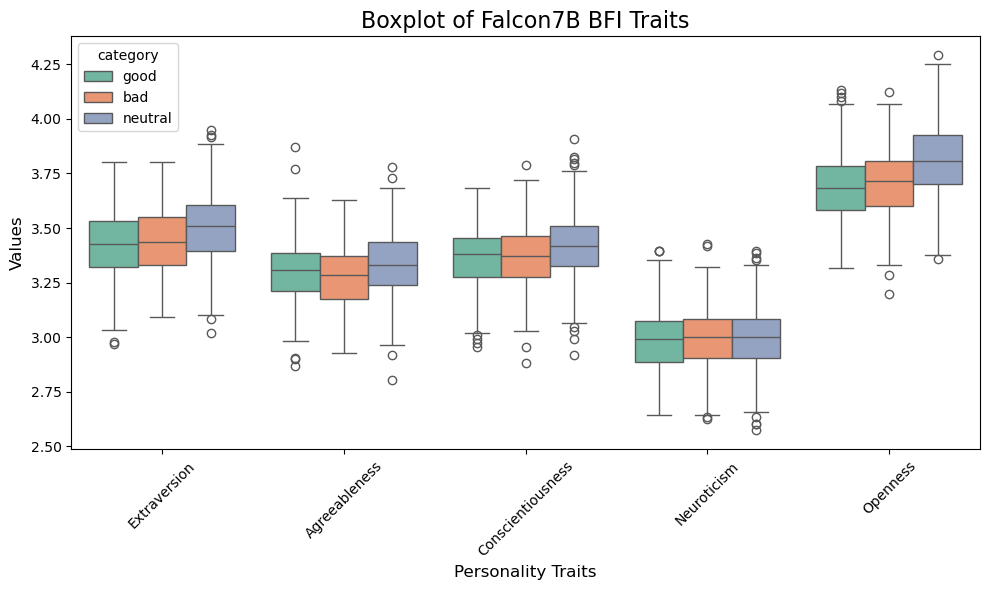

In [29]:
plot_boxplot_bfi(df_bfi,"Falcon7B")

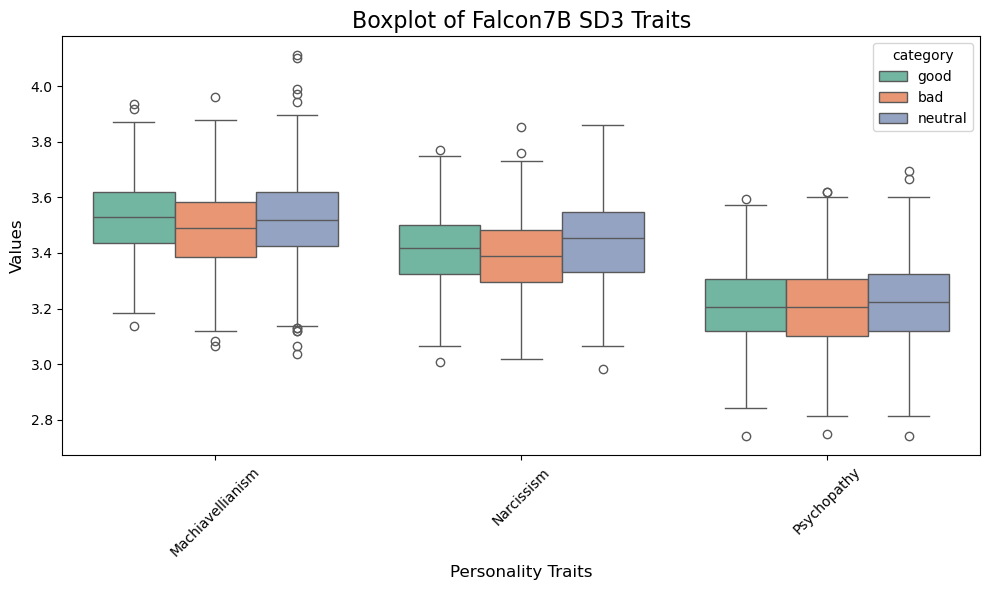

In [30]:
plot_boxplot_sd3(df_sd3,"Falcon7B")

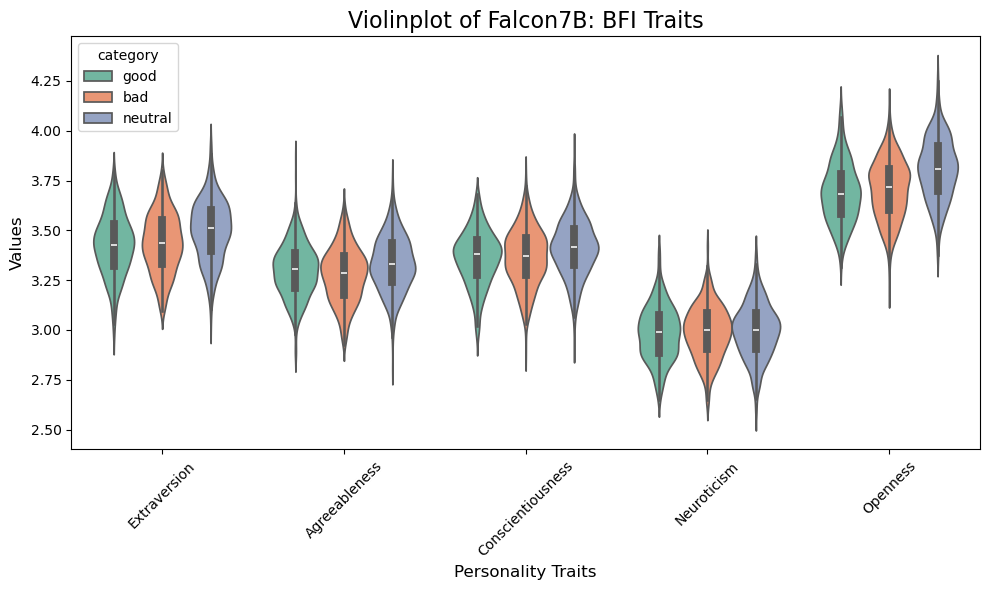

In [31]:
plot_violin_bfi(df_bfi,"Falcon7B")

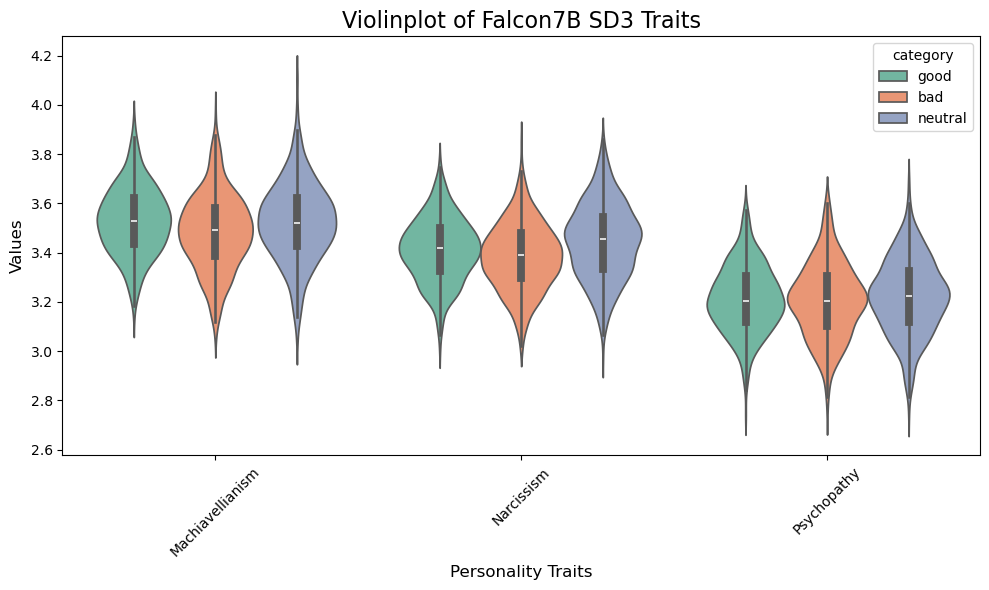

In [32]:
plot_violin_sd3(df_sd3,"Falcon7B")

In [33]:
radar_chart(df_bfi,"Falcon7B",1)

In [34]:
radar_chart(df_sd3,"Falcon7B",2)

In [35]:
df_list=[df1,df2,df3]

In [41]:
columns_list = ['Extraversion',	'Agreeableness', 'Conscientiousness', 'Neuroticism','Openness']
custom_names = ['Good','Bad','Neutral']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)

print(cdf)


   DataFrame          Attribute      Mean       Std
0       Good       Extraversion  3.428529  0.152636
1       Good      Agreeableness  3.301344  0.133096
2       Good  Conscientiousness  3.362696  0.136906
3       Good        Neuroticism  2.984075  0.136235
4       Good           Openness  3.689304  0.150560
5        Bad       Extraversion  3.437987  0.149324
6        Bad      Agreeableness  3.278034  0.136285
7        Bad  Conscientiousness  3.366832  0.142321
8        Bad        Neuroticism  2.989705  0.131131
9        Bad           Openness  3.707004  0.147794
10   Neutral       Extraversion  3.502393  0.152603
11   Neutral      Agreeableness  3.334316  0.138520
12   Neutral  Conscientiousness  3.411560  0.140215
13   Neutral        Neuroticism  2.996004  0.136437
14   Neutral           Openness  3.809143  0.155042


In [37]:
#Calculate cdf_sd3
columns_list_sd3 = ['Machiavellianism', 'Narcissism', 'Psychopathy']

results = []
for col in columns_list_sd3:
    grouped = df_sd3.groupby('category')[col].agg(['mean', 'std']).reset_index()
    grouped['Attribute'] = col
    results.append(grouped)

cdf_sd3 = pd.concat(results)
cdf_sd3.rename(columns={'category': 'DataFrame', 'mean': 'Mean', 'std': 'Std'}, inplace=True)


In [38]:
cdf_sd3

DataFrame      Mean       Std         Attribute
0       bad  3.484128  0.154122  Machiavellianism
1      good  3.530204  0.137715  Machiavellianism
2   neutral  3.524776  0.159775  Machiavellianism
0       bad  3.382899  0.135776        Narcissism
1      good  3.411061  0.128940        Narcissism
2   neutral  3.448099  0.153408        Narcissism
0       bad  3.206584  0.151104       Psychopathy
1      good  3.213543  0.136421       Psychopathy
2   neutral  3.222194  0.152609       Psychopathy

In [39]:
print(df_sd3.groupby(['category'])['Machiavellianism'].mean())
print(df_sd3.groupby(['category'])['Narcissism'].mean())
print(df_sd3.groupby(['category'])['Psychopathy'].mean())

category
bad        3.484128
good       3.530204
neutral    3.524776
Name: Machiavellianism, dtype: float64
category
bad        3.382899
good       3.411061
neutral    3.448099
Name: Narcissism, dtype: float64
category
bad        3.206584
good       3.213543
neutral    3.222194
Name: Psychopathy, dtype: float64


In [40]:
print(df_bfi.groupby(['category'])['Extraversion'].mean())
print(df_bfi.groupby(['category'])['Agreeableness'].mean())
print(df_bfi.groupby(['category'])['Conscientiousness'].mean())

category
bad        3.437987
good       3.428529
neutral    3.502393
Name: Extraversion, dtype: float64
category
bad        3.278034
good       3.301344
neutral    3.334316
Name: Agreeableness, dtype: float64
category
bad        3.366832
good       3.362696
neutral    3.411560
Name: Conscientiousness, dtype: float64


In [ ]:
dftemp = df_bfi.groupby(['category'])['Neuroticism']

In [ ]:
dftemp.describe()

count      mean       std    min    25%    50%     75%    max
category                                                               
bad       447.0  3.139794  0.305583  2.646  2.917  3.073  3.3070  4.312
good      427.0  2.811028  0.141315  2.406  2.729  2.812  2.8905  3.260
neutral   545.0  2.868615  0.249237  2.156  2.708  2.823  3.0210  3.927

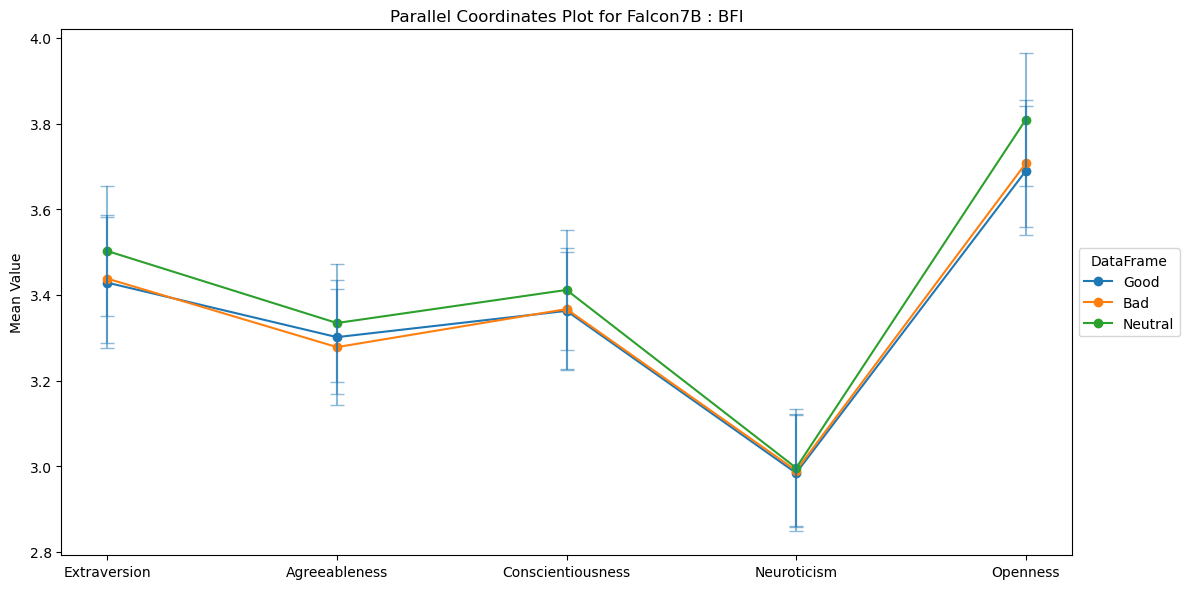

In [42]:
pcp(cdf,"Falcon7B","BFI")

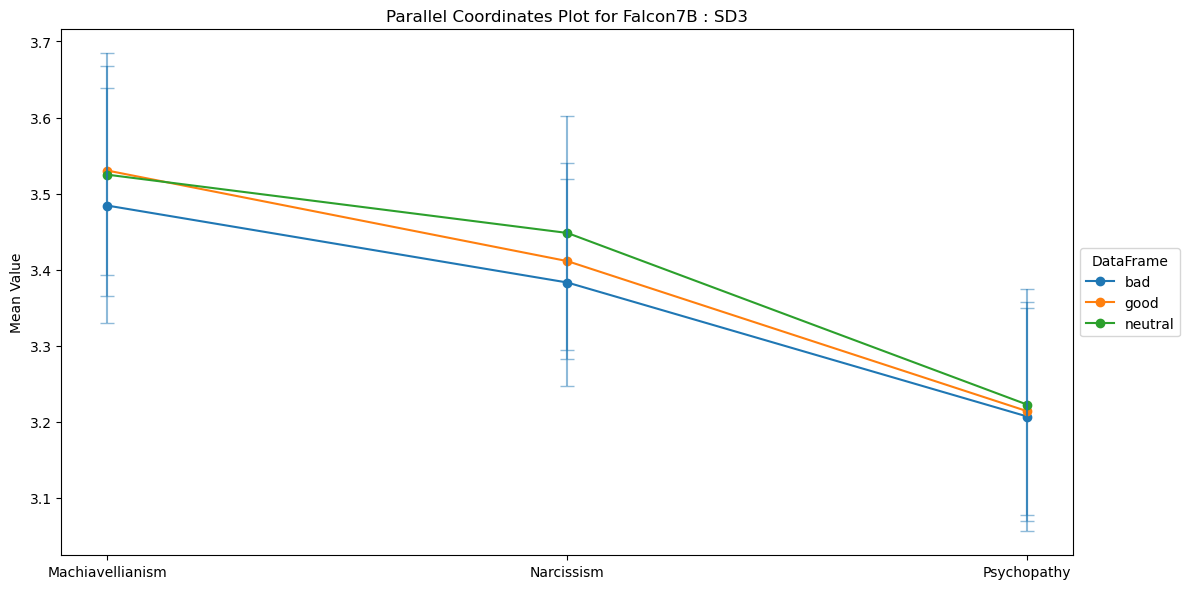

In [43]:
pcp(cdf_sd3,"Falcon7B","SD3")